![Housing Image](https://www.ctenickyhaj.cz/themes/haj/assets/images/muj-dum/typy-domu.png)

<a name="1-Importing"></a>
## 1. Importing all required libraries 

In [216]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

<a name="1.1-Loading"></a>
### 1.1. Loading Housing data by using Pandas library and Data dictionary 

In [217]:
Housing_data  = pd.read_csv(r"d:\Users\Admin\Downloads\housing_data.csv")

## Data dictionary of Housing data link, to access Click on "here"

**Data dictionary** can be found [here](https://docs.google.com/document/d/1fNy7aaHKFoqeuRUrnreZ5LnRN7TyL2rnSIRFxDFv2XE/edit?tab=t.0#heading=h.6o5cj28f1dm).

<a name="1.2-Checking"></a>
### 1.2. Checking the data using different commands(Head, Tail and Shape )

In [218]:
print(Housing_data.head()),print(Housing_data.tail())
Housing_data.shape

   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCo

(1460, 81)

<a name="1.3-Describe"></a>
### 1.3.For numerical columns in a DataFrame .describe() function in pandas provides statistics summary.

In [219]:
Housing_data.describe().T 

count           mean           std      min        25%  \
Unnamed: 0     1460.0     729.500000    421.610009      0.0     364.75   
LotFrontage    1460.0      57.623288     34.664304      0.0      42.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Unnamed: 0        729.5    1094.25    1459.0  
LotFrontage        63.0      79.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     164.25    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2002.00    2010.0  
GarageCars          2.0       2.00       4.0  
GarageAr

# Insights of describe command
## General Dataset Overview:
The dataset has 1,460 entries (except GarageYrBlt, which has 1,379 non-null values, indicating missing data).

## Lot and Living Area:
Lot Area varies from 1,300 to 215,245 sq. ft., indicating diverse property sizes.
Above Ground Living Area (GrLivArea) ranges from 334 to 5,642 sq. ft., with a mean of 1,515 sq. ft.. Outliers (very large homes) may exist.

## Quality & Condition:
Overall Quality (OverallQual) has a mean of 6.1 (on a scale of 1–10), with most homes rated 5–7.
Overall Condition (OverallCond) is centered around 5.6, meaning most houses are in average condition.

## Year Built & Renovation Trends:
Houses were built between 1872 and 2010, with a median build year of 1973.
Many homes were remodeled, with the median YearRemodAdd being 1994, showing updates over time.

## Basement & Garage:

Basement Sizes (TotalBsmtSF) vary widely (0 to 6,110 sq. ft.), with some homes having no basement.
Garage Size (GarageCars) ranges from 0 to 4 cars, with a median of 2-car garages.


<a name="1.4-information"></a>
### 1.4.info() function gives detail of dataset

In [220]:
Housing_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Insights of info() command:
##### 1.The dataset consists of 1460 entries (houses) with 81 columns (features).
##### 2. Data Types Distribution:
Numerical Features: 36 columns (35 int64, 1 float64)
Categorical Features: 45 columns (object type)

Missing Values: Some columns have missing values:
Alley (91 non-null) – a significant number of missing values.
MasVnrType (588 non-null) – missing values might need imputation.
GarageYrBlt (1379 non-null) – missing values likely indicate houses without a garage.

Electrical (1459 non-null) – 1 missing value.
Columns with many missing values (Alley, MasVnrType) may need special handling, such as capping  or dropping the columns

<a name="1.5.-saleprice"></a>
### 1.5.  Checking for missing values  and handling them:


In [221]:
print(Housing_data.isnull().sum().to_string())

Unnamed: 0          0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [222]:
# Check missing values in percentage
missing_values = Housing_data.isnull().sum()
missing_percent = (missing_values / len(Housing_data)) * 100

# Create a DataFrame to display missing values
missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values, 'Percentage': missing_percent.values})
missing_df = missing_df[missing_df['Missing Values'] > 0]  # Filter only columns with missing values

# Display the missing values sorted by percentage
print(missing_df.sort_values(by="Percentage", ascending=False))

         Column  Missing Values  Percentage
6         Alley            1369   93.767123
25   MasVnrType             872   59.726027
59  GarageYrBlt              81    5.547945
42   Electrical               1    0.068493


#### Missing Values
Alley: 91 missing values (93.77% of data).

MasVnrType: 588 missing values (59.73% of data).

GarageYrBlt: 81 missing values (5.55% of data).

Electrical: 1 missing value (0.07% of data).

## checking for skewness of GarageYrBlt numerical column before handling missing

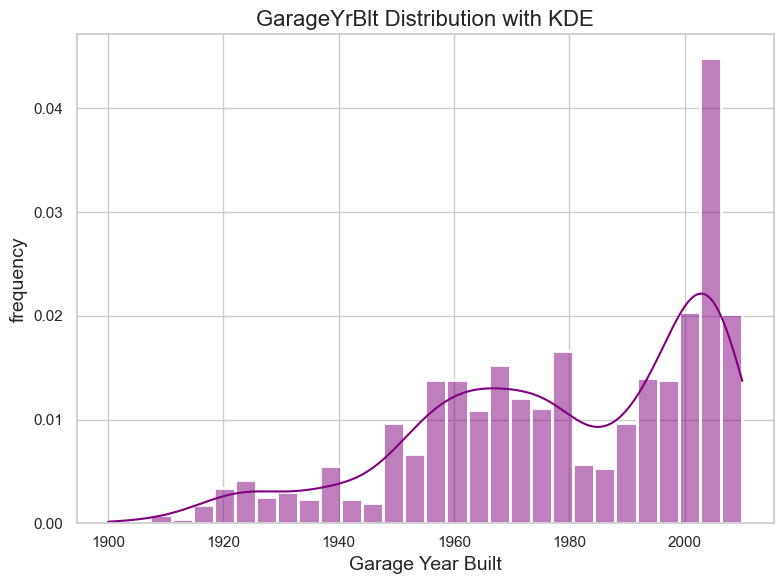

In [223]:
plt.figure(figsize=(8, 6))

# Create histogram with KDE for 'GarageYrBlt'
sns.histplot(Housing_data['GarageYrBlt'], kde=True, bins=30, color='purple', stat='density', linewidth=2)

# Set the title and axis labels
plt.title("GarageYrBlt Distribution with KDE", fontsize=16)
plt.xlabel("Garage Year Built", fontsize=14)
plt.ylabel("frequency", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


# GarageYrBlt (Garage Year Built)
 1. Negative skewness is observed in the GarageYrBlt hisplot.
 2.  In 2000's the  Garages frequency is high than past years.
 3.  As the year the years increases the building of garages are also propotional increased(its directly propotional)
 4.  median is preferred over the mean for skewed data because it is less affected by outliers and extreme values,provides a better measure of the "central" value 

## Handling missing values

In [224]:
# Drop columns with >80% missing data (e.g., Alley)
Housing_data = Housing_data.drop(columns=['Alley'], axis=1)

# Fill categorical missing values with the mode
Housing_data['MasVnrType'].fillna(Housing_data['MasVnrType'].mode()[0], inplace=True)

# Fill numerical missing values with the median (e.g., GarageYrBlt)
Housing_data['GarageYrBlt'].fillna(Housing_data['GarageYrBlt'].median(), inplace=True)

# Drop rows where critical columns (like Electrical) have missing values
Housing_data['Electrical'].fillna(Housing_data['Electrical'].mode()[0], inplace=True)


In [225]:
print(Housing_data.isnull().sum().to_string())

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# checking for missing values:

In [226]:
Housing_data.dropna(inplace=True)  
print(Housing_data.isnull().sum().sum()) 

0


## Insights of handled missing values:
Based on the missing data percentage, the following strategies are applied:
1. Dropped Alley Column with Too Many Missing Values (>80%) which is 93.77% missing data by using the drop command.
2. MasVnrType with 59.73% missing values which a categorical column so i filled the missing values with mode.
3. GarageYrBlt is numerical column and skewed data so i used median to fill the missing values.
4. Electrical column represents very small proportion of missing value and it will be replaced with most repeated value(mode).

<a name="1.6.-Duplicates"></a>
### 1.6.  Checking for Duplicates:

In [227]:
print("Total Duplicate Rows:", Housing_data.duplicated().sum())
print("Total Duplicate Columns:", Housing_data.T.duplicated().sum())

Total Duplicate Rows: 0
Total Duplicate Columns: 0


<a name="2.1.-outliers"></a>
#  2. Checking and handling  outliers 

<a name="2.1.-outliers"></a>
# 2.1 checking for all outliers in housing data by boxplot:

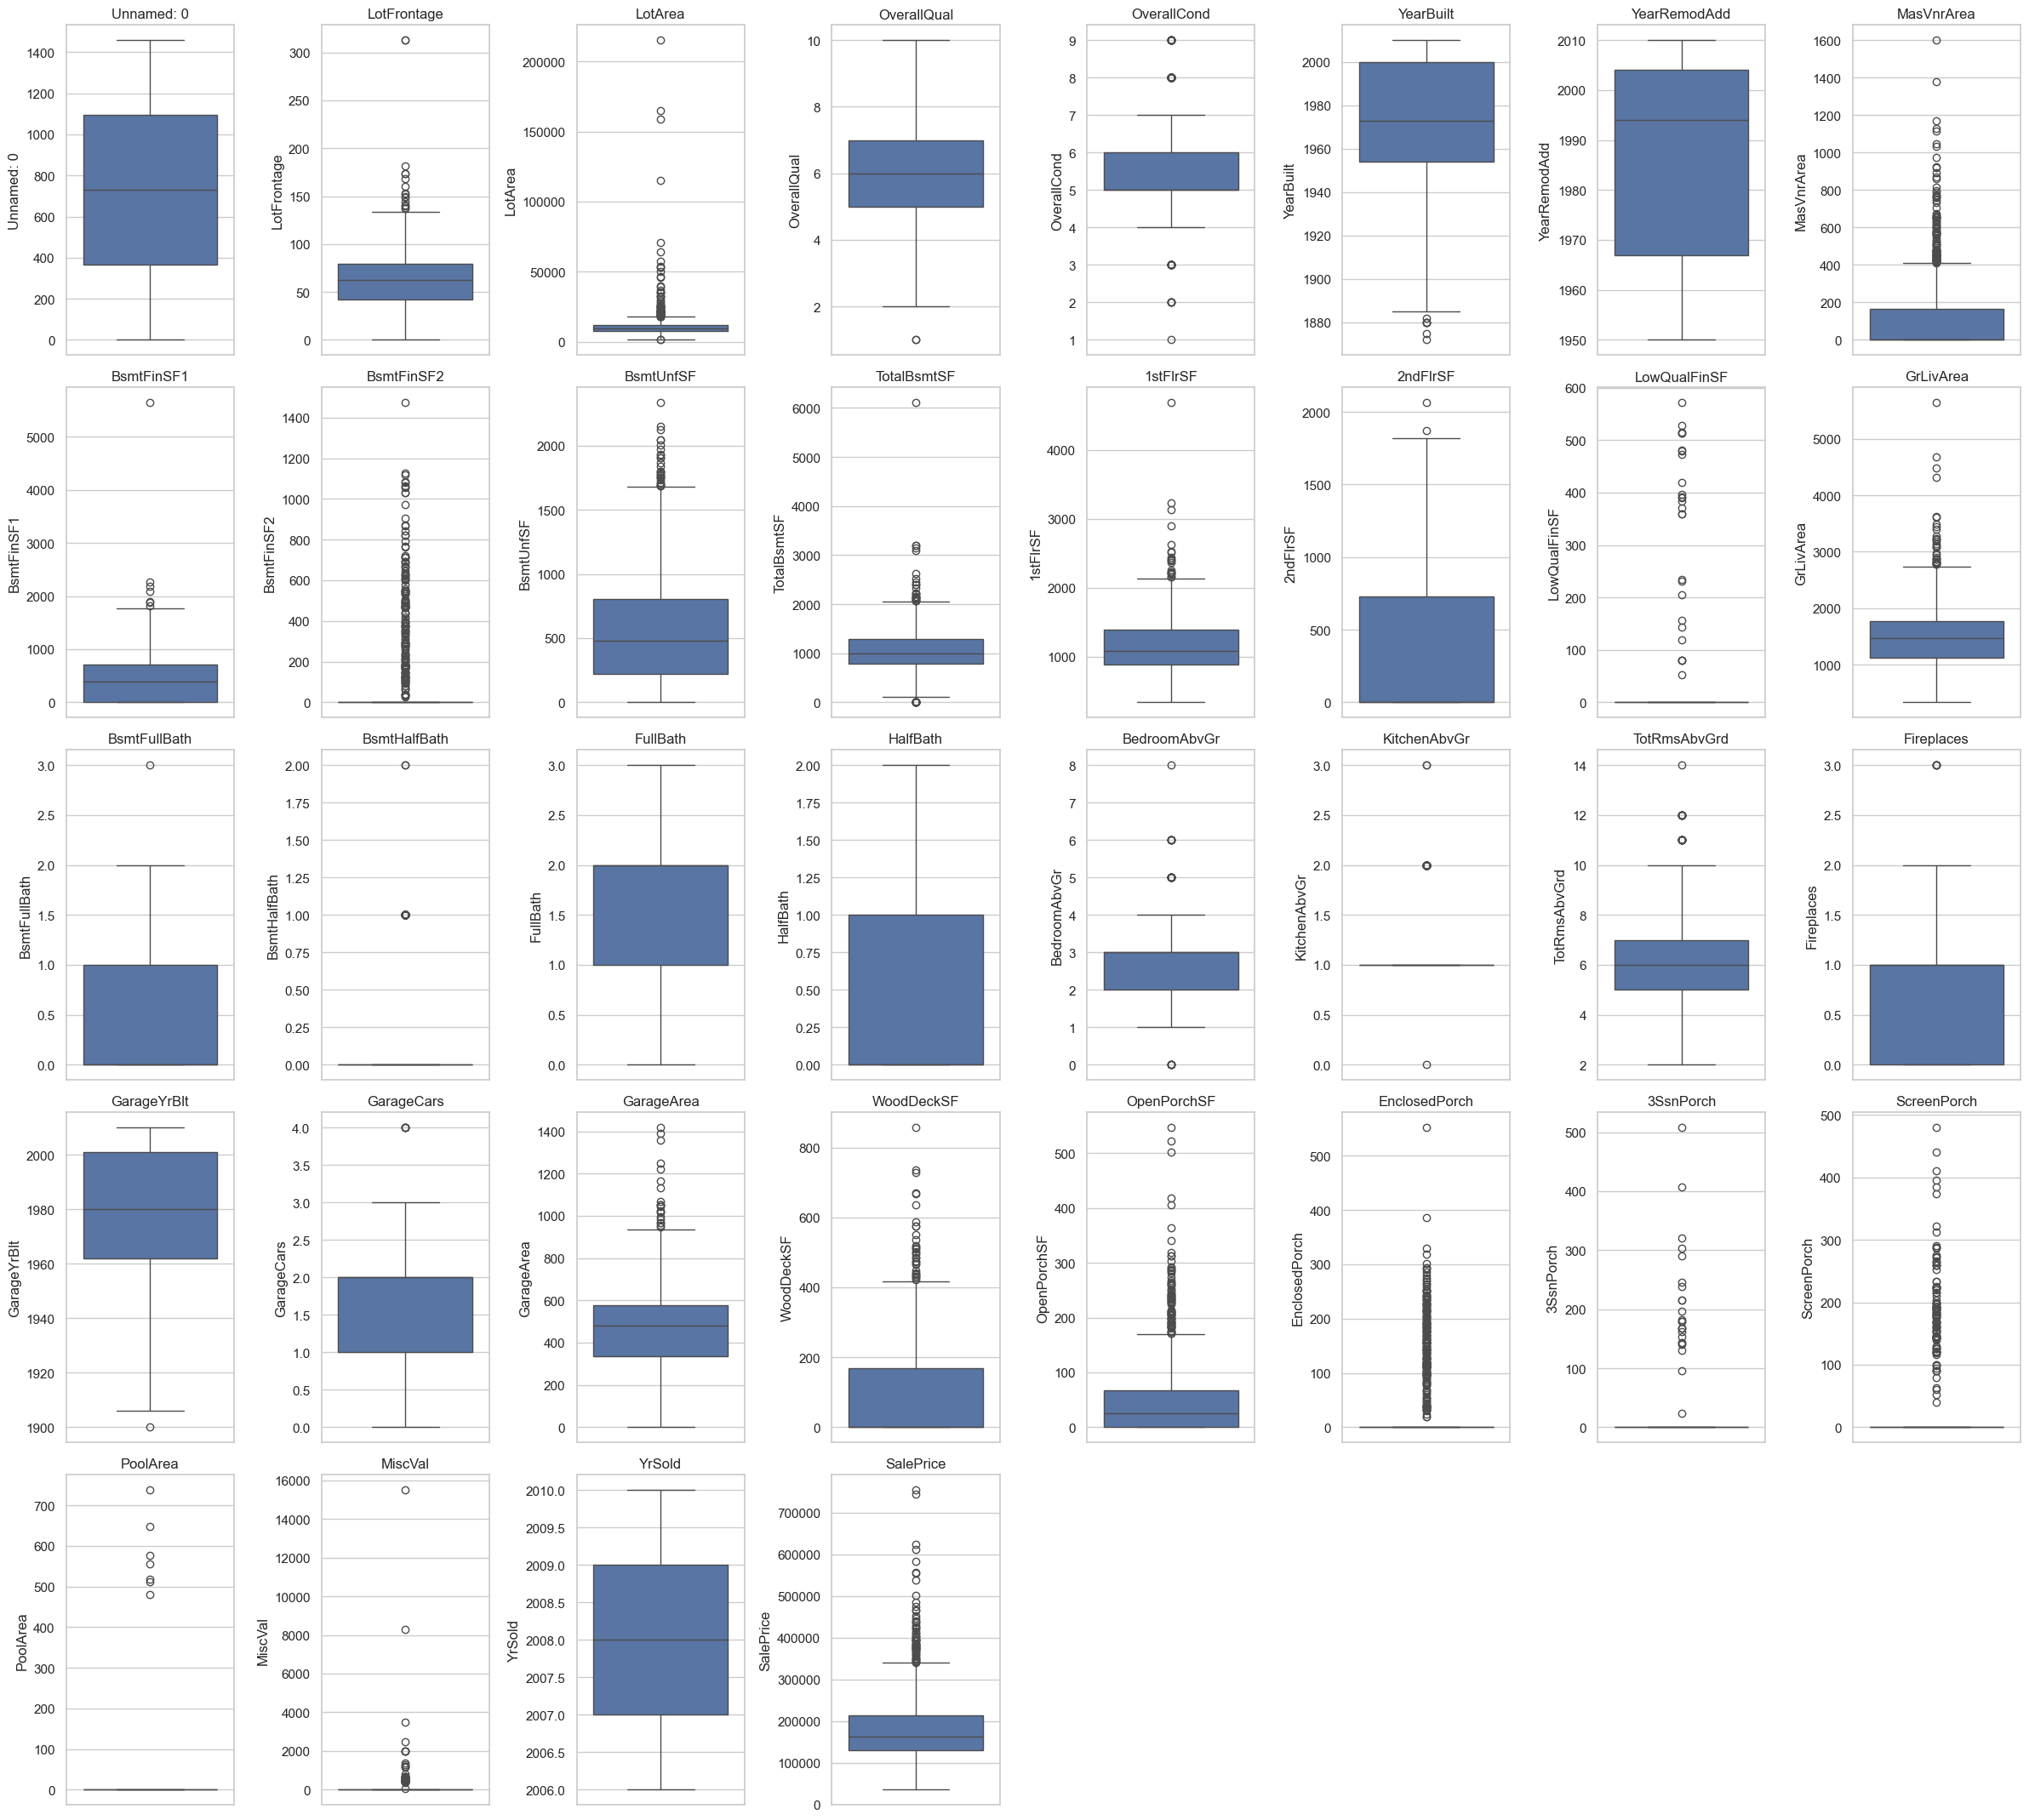

In [228]:
num_cols = Housing_data.select_dtypes(include=["float64","int64"]).columns
plt.figure(figsize=(24,30))
for i,col in enumerate(num_cols,1):
    plt.subplot(7,8,i)
    sns.boxplot(y=Housing_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Insights for boxplots before handling outliers:

1. **Presence of Outliers**: Many features, such as `LotFrontage`, `LotArea`, `BsmtFinSF1`, `TotalBsmtSF`, `GarageArea`, and `SalePrice`, contain outliers, indicating some extreme values in these variables.

2. **Skewness in Distribution**: Several features exhibit right-skewed distributions (e.g., `LotArea`, `BsmtFinSF1`, `TotalBsmtSF`, `GarageArea`, and `SalePrice`), suggesting that most data points are concentrated towards the lower end, with a few significantly high values.

3. **Categorical Features Representation**: Features like `OverallQual`, `OverallCond`, `YearBuilt`, `YearRemodAdd`, `Fireplaces`, and `GarageCars` show a more discrete nature, meaning they likely contain categorical or ordinal values.

4. **Variation in Spread**: Some features, such as `1stFlrSF`, `2ndFlrSF`, and `GrLivArea`, show a large spread in their distributions, meaning they vary significantly among houses.

5. **Normal vs. Non-Normal Distributions**: Some features, like `SalePrice`, `GrLivArea`, and `TotalBsmtSF`, appear to have a long-tailed distribution, which may require log transformations  for better statistical analysis.

6. **Potential Correlations**: Features like `GarageArea`, `GrLivArea`, `TotalBsmtSF`, and `SalePrice` share similar distribution characteristics, indicating they might be correlated with one another.

# Numerical columns:

In [229]:
num_cols = Housing_data.select_dtypes(include=["int64", "float64"]).columns
print(num_cols)

Index(['Unnamed: 0', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')


#  Categorical columns:

In [230]:
# Select categorical columns (dtype 'object')
cat_cols = Housing_data.select_dtypes(include=["object"]).columns

# Display the categorical columns
print("cat_cols:", list(cat_cols))


cat_cols: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


<a name="2.1.-outliers"></a>
#  2.2  Handling the outliers for numerical columns

In [296]:
numerical_columns = Housing_data.select_dtypes(include=["int64", "float64"]).columns

# Iterate through numerical columns
for i in numerical_columns:
    # Calculate quantiles and IQR
    Q1 = Housing_data[i].quantile(0.25)
    Q2 = Housing_data[i].quantile(0.50)
    Q3 = Housing_data[i].quantile(0.75)
    IQR = Q3 - Q1
    median_value = Housing_data[i].median()

    # Print quantiles and IQR
    print(f"The first quantile for the column {i} is {Q1}")
    print(f"The second quantile (median) for the column {i} is {Q2}")
    print(f"The third quantile for the column {i} is {Q3}")
    print(f"The interquartile range for the column {i} is {IQR}")

    # Calculate lower and upper limits
    Lower_limit = Q1 - 1.5 * IQR
    Upper_limit = Q3 + 1.5 * IQR
    print(f"The lower_limit for the column {i} is {Lower_limit}")
    print(f"The upper_limit for the column {i} is {Upper_limit}")

    # Identify and count outliers
    n_outliers_before = ((Housing_data[i] < Lower_limit) | (Housing_data[i] > Upper_limit)).sum()
    print(f"The number of outliers for column {i} is {n_outliers_before}")

    # Impute outliers with the column mean
    Housing_data[i] = np.where(Housing_data[i] > Upper_limit,Housing_data[i].median(),Housing_data[i])
    Housing_data[i] = np.where(Housing_data[i] < Lower_limit,Housing_data[i].median(),Housing_data[i])
    
    # Count outliers after imputation
    n_outliers_after = ((Housing_data[i] < Lower_limit) | (Housing_data[i] > Upper_limit)).sum()
    print(f"The number of outliers after imputation for column {i} is {n_outliers_after}")
    print("   ")


The first quantile for the column Unnamed: 0 is 364.75
The second quantile (median) for the column Unnamed: 0 is 729.5
The third quantile for the column Unnamed: 0 is 1094.25
The interquartile range for the column Unnamed: 0 is 729.5
The lower_limit for the column Unnamed: 0 is -729.5
The upper_limit for the column Unnamed: 0 is 2188.5
The number of outliers for column Unnamed: 0 is 0
The number of outliers after imputation for column Unnamed: 0 is 0
   
The first quantile for the column LotFrontage is 42.0
The second quantile (median) for the column LotFrontage is 63.0
The third quantile for the column LotFrontage is 78.0
The interquartile range for the column LotFrontage is 36.0
The lower_limit for the column LotFrontage is -12.0
The upper_limit for the column LotFrontage is 132.0
The number of outliers for column LotFrontage is 0
The number of outliers after imputation for column LotFrontage is 0
   
The first quantile for the column LotArea is 9000.0
The second quantile (median) fo

### Interquartile Range (IQR) is the range between the first quartile (Q1 - 25th percentile) and the third quartile (Q3 - 75th percentile).
### Any value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.
### Outliers are replaced with the median of the column to maintain data integrity.
#### This is a robust technique for outlier handling because the median is not affected by extreme values, unlike the mean.

In [297]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.DataFrame(Housing_data)  # Ensure Housing_data is a DataFrame

# List of columns with outliers
outlier_columns = ["LotFrontage","BsmtFinSF1",
    "LotArea", "MasVnrArea", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "1stFlrSF", "LowQualFinSF", "GrLivArea", "BsmtHalfBath", "KitchenAbvGr",
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch",
    "PoolArea", "MiscVal", "SalePrice"
]

# Function to replace outliers with median
def replace_outliers_with_median(df, column):
    Q1 = Housing_data[column].quantile(0.25)
    Q3 = Housing_data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = Housing_data[column].median()
    Housing_data[column] = np.where((Housing_data[column] < lower_bound) | (Housing_data[column] > upper_bound), median_value, Housing_data[column])

# Apply the function to each column
for col in outlier_columns:
    if col in Housing_data.columns:  # Ensure the column exists
        replace_outliers_with_median(Housing_data, col)

## Outlier Treatment on 'Different columns':

In [298]:
Housing_data['LotArea'] = np.where(Housing_data['LotArea'] > 17673.5,Housing_data['LotArea'].median(),Housing_data['LotArea'])
Housing_data['LotArea'] = np.where(Housing_data['LotArea'] < 1481.5,Housing_data['LotArea'].median(),Housing_data['LotArea'])

In [299]:
Housing_data['MasVnrArea'] = np.where(Housing_data['MasVnrArea'] > 410.625,Housing_data['MasVnrArea'].median(),Housing_data['MasVnrArea'])
Housing_data['MasVnrArea'] = np.where(Housing_data['MasVnrArea'] < -246.375,Housing_data['MasVnrArea'].median(),Housing_data['MasVnrArea'])

In [300]:
Housing_data['BsmtUnfSF'] = np.where(Housing_data['BsmtUnfSF'] >1685.5,Housing_data['BsmtUnfSF'].median(),Housing_data['BsmtUnfSF'])
Housing_data['BsmtUnfSF'] = np.where(Housing_data['BsmtUnfSF'] <-654.5,Housing_data['BsmtUnfSF'].median(),Housing_data['BsmtUnfSF'])

In [301]:
Housing_data['WoodDeckSF'] = np.where(Housing_data['WoodDeckSF'] > 420.0,Housing_data['WoodDeckSF'].median(),Housing_data['WoodDeckSF'])
Housing_data['WoodDeckSF'] = np.where(Housing_data['WoodDeckSF'] < -252.0,Housing_data['WoodDeckSF'].median(),Housing_data['WoodDeckSF'])

In [302]:
Housing_data['1stFlrSF'] = np.where(Housing_data['1stFlrSF'] > 2155.125,Housing_data['1stFlrSF'].median(),Housing_data['1stFlrSF'])
Housing_data['1stFlrSF'] = np.where(Housing_data['1stFlrSF'] < 118.125,Housing_data['1stFlrSF'].median(),Housing_data['1stFlrSF'])

In [303]:
Housing_data['TotalBsmtSF'] = np.where(Housing_data['TotalBsmtSF'] >2052.0,Housing_data['TotalBsmtSF'].median(),Housing_data['TotalBsmtSF'])
Housing_data['TotalBsmtSF'] = np.where(Housing_data['TotalBsmtSF'] <42.0,Housing_data['TotalBsmtSF'].median(),Housing_data['TotalBsmtSF'])

In [304]:
Housing_data['GrLivArea'] = np.where(Housing_data['GrLivArea'] >2643.25,Housing_data['GrLivArea'].median(),Housing_data['GrLivArea'])
Housing_data['GrLivArea'] = np.where(Housing_data['GrLivArea'] < 221.25,Housing_data['GrLivArea'].median(),Housing_data['GrLivArea'])

In [305]:
Housing_data['OpenPorchSF'] = np.where(Housing_data['OpenPorchSF'] >170.0,Housing_data['OpenPorchSF'].median(),Housing_data['OpenPorchSF'])
Housing_data['OpenPorchSF'] = np.where(Housing_data['OpenPorchSF'] <-84.0,Housing_data['OpenPorchSF'].median(),Housing_data['OpenPorchSF'])

In [306]:
Housing_data['SalePrice'] = np.where(Housing_data['SalePrice'] > 305313.125,Housing_data['SalePrice'].median(),Housing_data['SalePrice'])
Housing_data['SalePrice'] = np.where(Housing_data['SalePrice'] < 24772.125,Housing_data['SalePrice'].median(),Housing_data['SalePrice'])

## Insights of individual HAndling outliers:
### used Upper_limit, Lower_limit are added accordingly.so,they will assume whatever updated output and nullify the outliers. 

Boxplot after handling outliers:


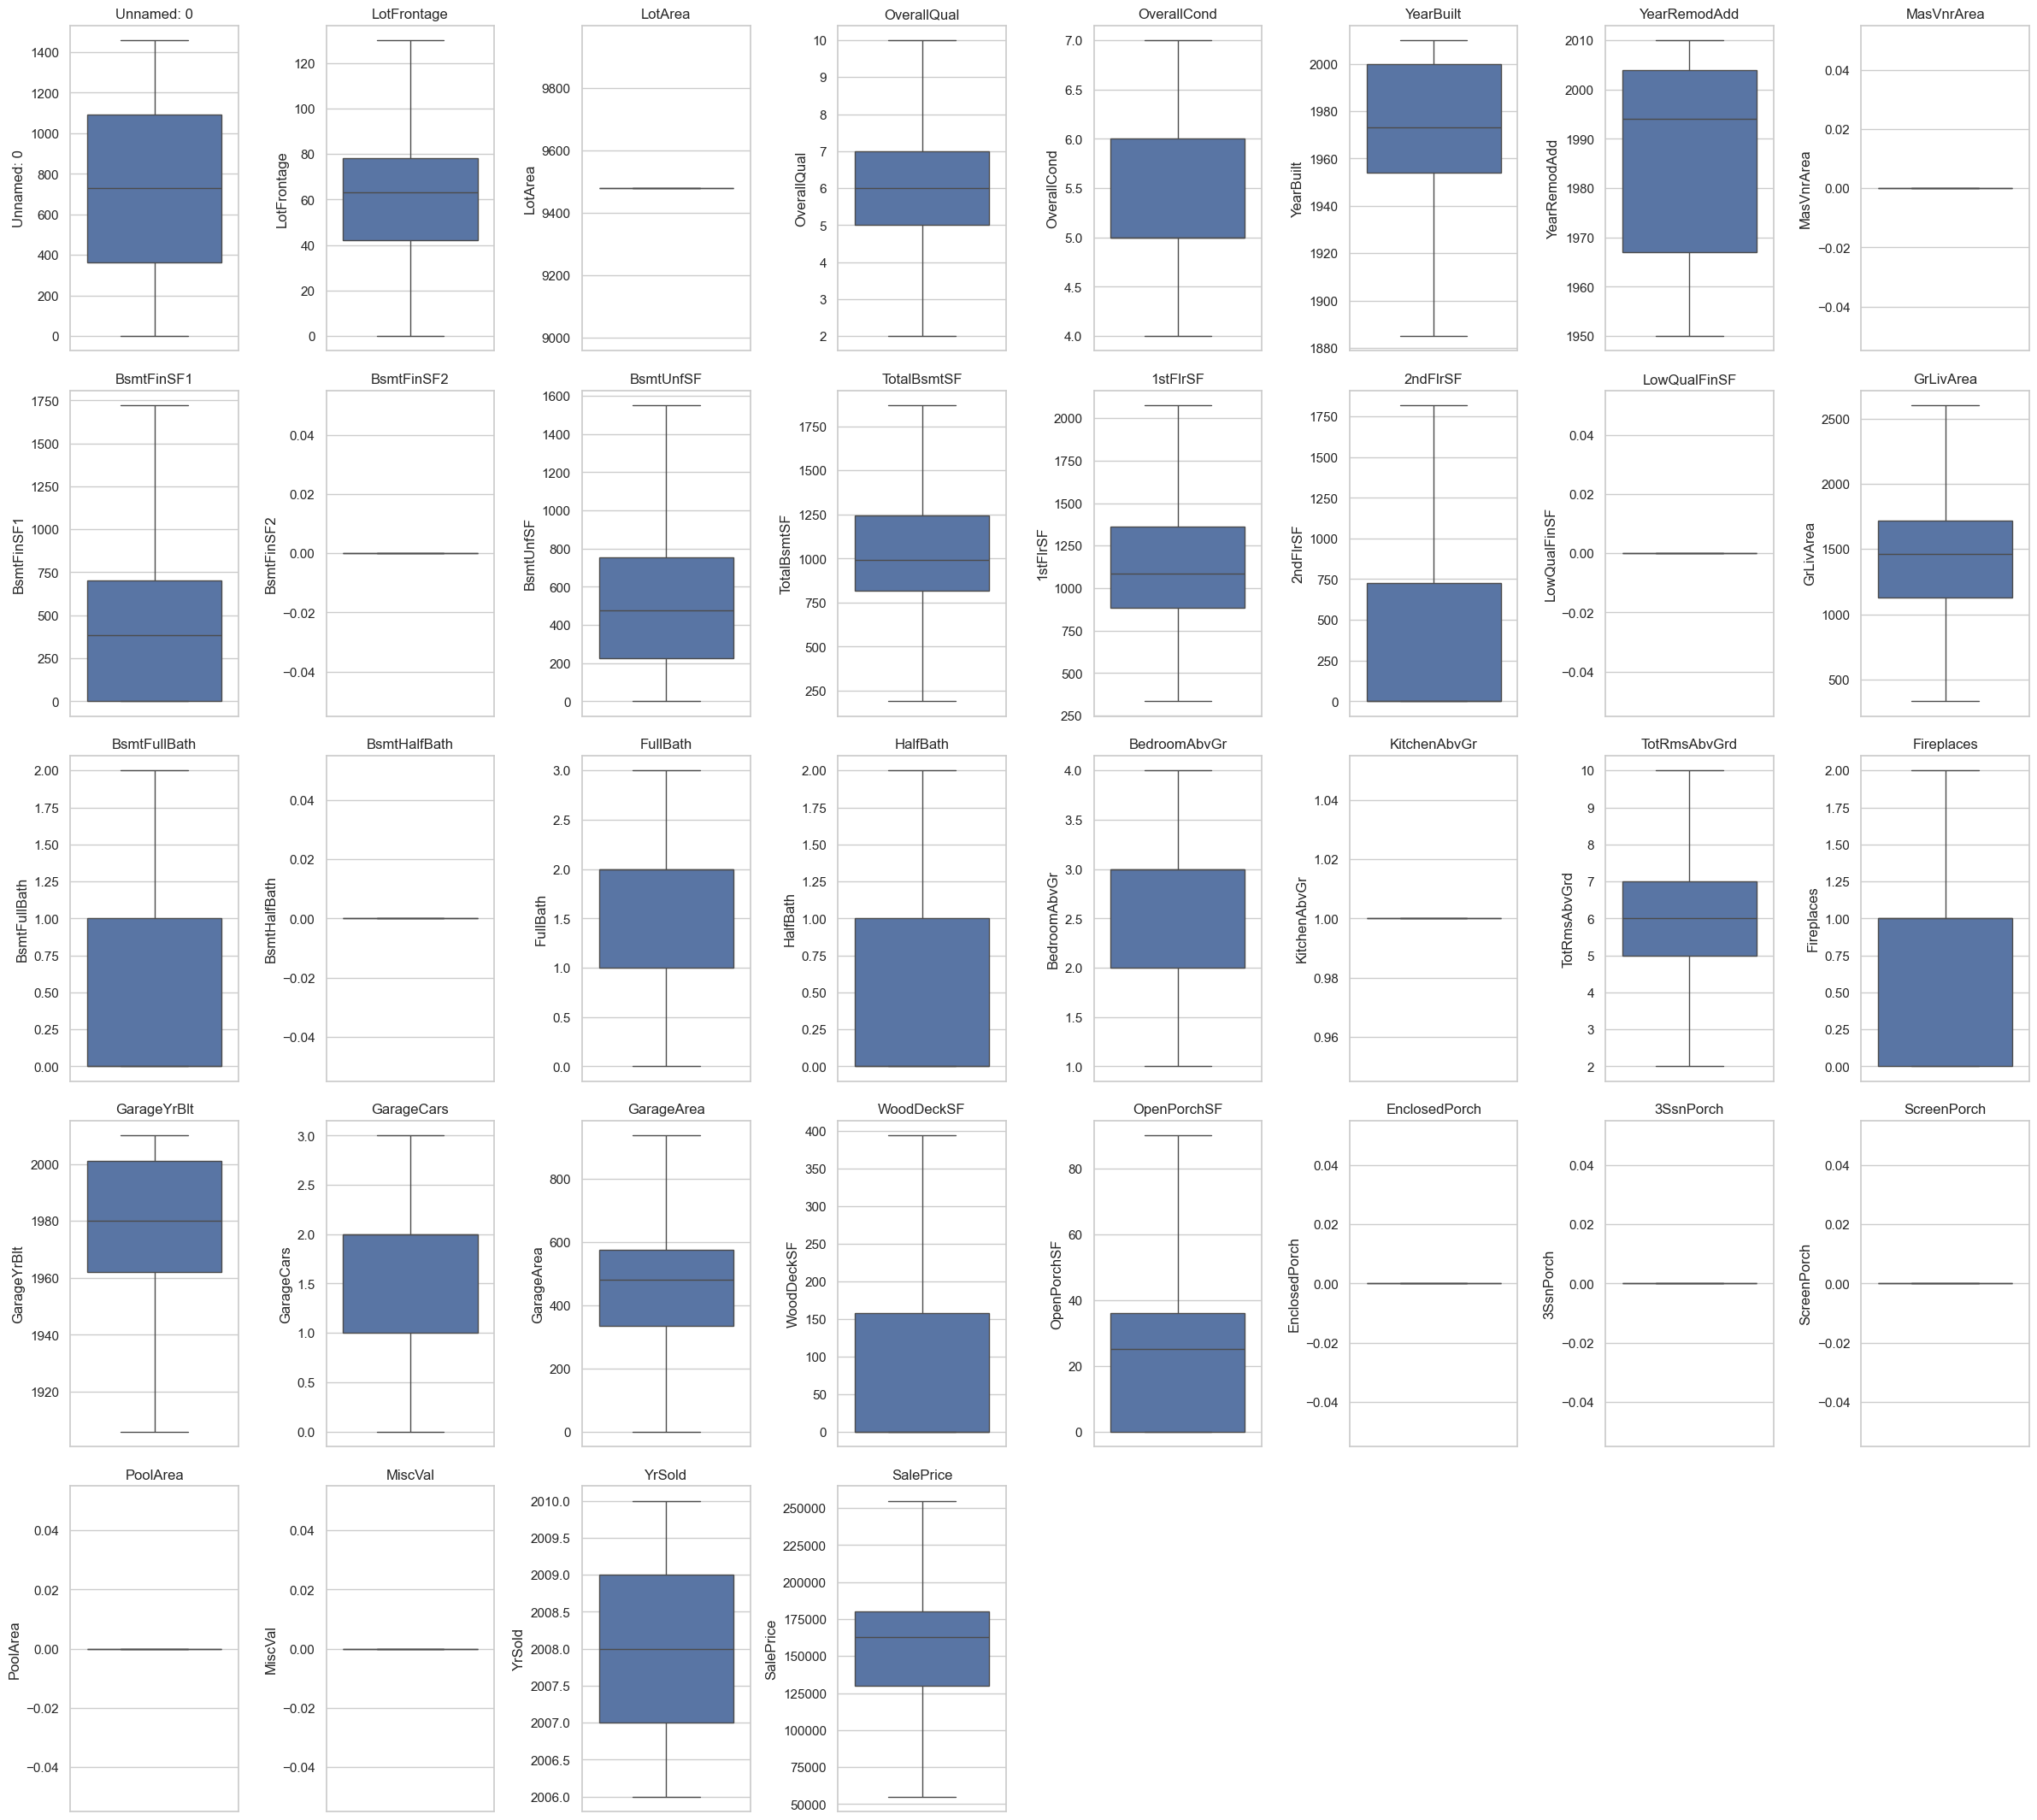

In [307]:
print("Boxplot after handling outliers:")
num_cols = Housing_data.select_dtypes(include=["float64","int64"]).columns
plt.figure(figsize=(24,30))
for i,col in enumerate(num_cols,1):
    plt.subplot(7,8,i)
    sns.boxplot(y=Housing_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Insights  after handling outliers:

1. **Outliers Removed**: The boxplots indicate that extreme values have been handled, leading to more compact distributions with fewer extreme points.

2. **Symmetry and Skewness**:
   - Some variables exhibit symmetric distributions (e.g., `GarageCars`, `FullBath`), indicating a balanced dataset.
   - Some variables still show skewness (e.g., `LotArea`, `SalePrice`), which may need transformation for better modeling.

3. **Spread of Data**:
   - Variables like `TotalBsmtSF`, `1stFlrSF`, and `GrLivArea` have a wide range, meaning houses vary significantly in these aspects.
   - Other variables such as `Fireplaces` and `KitchenAbvGr` have a limited range, suggesting little variation among properties.

4. **Categorical vs. Continuous**:
   - Discrete numerical features (`Fireplaces`, `GarageCars`, `KitchenAbvGr`) display clear levels.
   - Continuous variables (`LotArea`, `SalePrice`) have a broader range.

5. **Impact on Sale Price**:
   - `SalePrice` still appears skewed, indicating potential need for log transformation.
   - Features like `GrLivArea` and `TotalBsmtSF` show a significant spread, suggesting they might be  specific variables?

### By using whisker function determining Outlier Count per Column:

In [308]:
# Define the whisker function
def whisker(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return lower_whisker, upper_whisker

# Iterate through numerical columns and count outliers
outlier_summary = {}

for i in numerical_columns:
    lw, uw = whisker(Housing_data[i])
    outlier_count = ((Housing_data[i] < lw) | (Housing_data[i] > uw)).sum()
    outlier_summary[i] = outlier_count

# Display outlier counts
print("Outlier Count per Column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


Outlier Count per Column:
Unnamed: 0: 0 outliers
LotFrontage: 0 outliers
LotArea: 0 outliers
OverallQual: 0 outliers
OverallCond: 0 outliers
YearBuilt: 0 outliers
YearRemodAdd: 0 outliers
MasVnrArea: 0 outliers
BsmtFinSF1: 0 outliers
BsmtFinSF2: 0 outliers
BsmtUnfSF: 0 outliers
TotalBsmtSF: 0 outliers
1stFlrSF: 0 outliers
2ndFlrSF: 0 outliers
LowQualFinSF: 0 outliers
GrLivArea: 0 outliers
BsmtFullBath: 0 outliers
BsmtHalfBath: 0 outliers
FullBath: 0 outliers
HalfBath: 0 outliers
BedroomAbvGr: 0 outliers
KitchenAbvGr: 0 outliers
TotRmsAbvGrd: 0 outliers
Fireplaces: 0 outliers
GarageYrBlt: 0 outliers
GarageCars: 0 outliers
GarageArea: 0 outliers
WoodDeckSF: 0 outliers
OpenPorchSF: 0 outliers
EnclosedPorch: 0 outliers
3SsnPorch: 0 outliers
ScreenPorch: 0 outliers
PoolArea: 0 outliers
MiscVal: 0 outliers
YrSold: 0 outliers
SalePrice: 0 outliers


### **Insights on Outliers Removal:**

1. **No Outliers Remaining:**
    Previously, several columns had outliers, including **LotArea, MasVnrArea,       GrLivArea, and SalePrice**.
   - After applying outlier treatment, **all columns now have 0 outliers**.
   - This suggests that extreme values were successfully handled, likely by replacing them with **median values** or another imputation method.

3. **Impact on Data Quality:**  
   Removing outliers helps improve model **stability** and reduces the effect of extreme values on statistical analysis.  
   - If outliers were due to data entry errors, this step ensures a **cleaner dataset** for modeling.

# 3.0 checking 15 Numerical features correlated with saleprice:

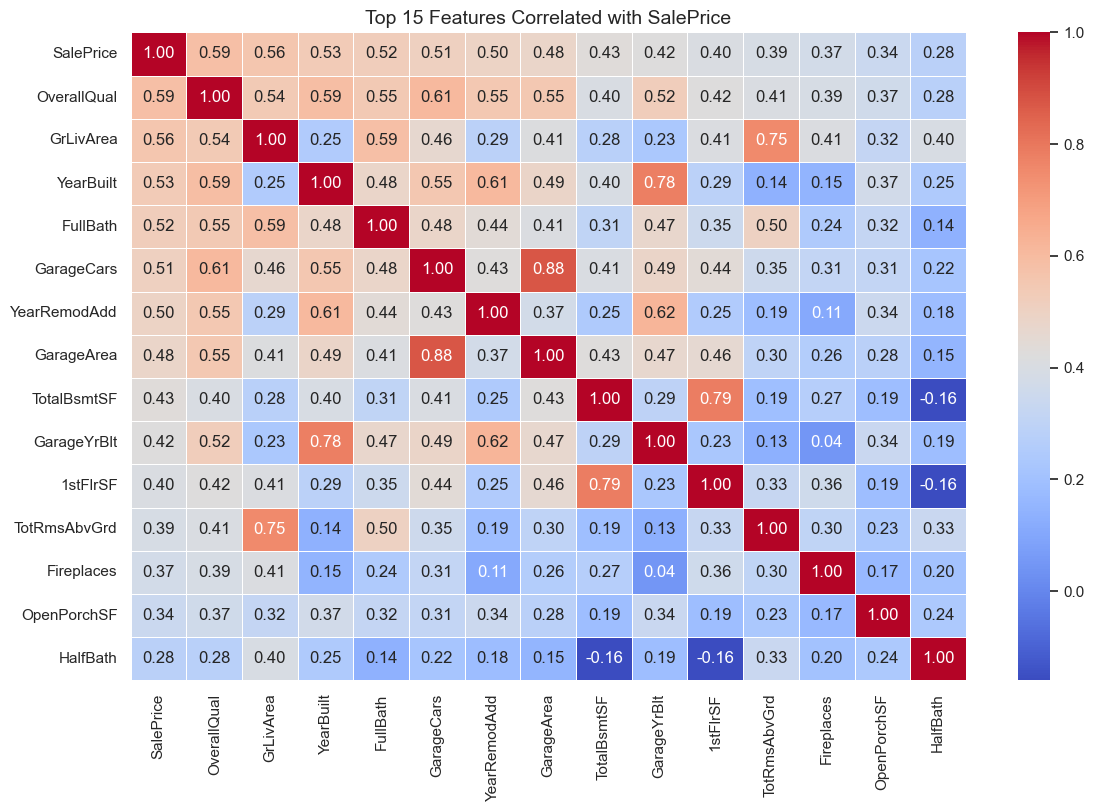

In [190]:
# Select only numeric columns before correlation analysis to avoid errors
Housing_data_numeric = Housing_data.select_dtypes(include=['number'])  # Extract only numeric columns

# Heatmap of top correlated features with SalePrice
plt.figure(figsize=(12, 8))  # Set figure size for better readability
saleprice_correlation = Housing_data_numeric.corr()['SalePrice'].abs().sort_values(ascending=False)  # Compute absolute correlations with SalePrice
top_corr_features = saleprice_correlation.index[:15]  # Select top 15 correlated features

sns.heatmap(Housing_data_numeric[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Generate heatmap
plt.title("Top 15 Features Correlated with SalePrice", fontsize=14)  # Set title
plt.show()  # Display the heatmap


### **Key Observations:**
1. **Strongest Correlations with SalePrice:**
   - `OverallQual` (0.62): The overall quality of the house has the highest positive correlation with sale price, meaning better-quality homes tend to be more expensive.
   - `GrLivArea` (0.58): The above-ground living area is a strong predictor of house prices, indicating that larger homes generally cost more.
   - `YearBuilt` (0.55): Newer homes tend to be more expensive than older ones.
   - `FullBath` (0.54): The number of full bathrooms is moderately correlated with house prices.

2. **Garage-Related Features:**
   - `GarageCars` (0.54) and `GarageArea` (0.51) both show a significant correlation with SalePrice, suggesting that having a larger garage or more car spaces adds value to a home.
   - `GarageYrBlt` (0.48): The year the garage was built also influences sale price, likely due to its association with newer homes.

3. **Basement and Floor Space:**
   - `TotalBsmtSF` (0.44) and `1stFlrSF` (0.43) indicate that larger basement and first-floor areas contribute to higher property values.
   - `TotRmsAbvGrd` (0.41): The total number of rooms above ground is moderately correlated, reinforcing the idea that bigger homes tend to be worth more.

4. **Additional Features:**
   - `Fireplaces` (0.39) shows a weak correlation, meaning that while fireplaces may add appeal, they are not a major price determinant.
   - `OpenPorchSF` (0.38) suggests that larger open porch areas slightly contribute to property value.
   - `LotArea` (0.30) has the weakest correlation, implying that lot size alone does not significantly impact price compared to internal home features.

# 4. Preprocessing the DATA:

In [309]:
df = Housing_data.copy()
Housing_data['Price_per_sqft'] = Housing_data['SalePrice'] / Housing_data['GrLivArea'] #Price per Square Foot
Housing_data['House_Age'] = Housing_data['YrSold'] - Housing_data['YearBuilt'] #House Age
Housing_data['Total_Bathrooms'] = (Housing_data['FullBath'] + (0.5 * Housing_data['HalfBath']) + Housing_data['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])) #Total Bathrooms
Housing_data['Total_Porch_Area'] = (Housing_data['OpenPorchSF'] + Housing_data['EnclosedPorch'] + Housing_data['3SsnPorch'] + df['ScreenPorch']) #Total Porch Area
Housing_data['Total_SF'] = Housing_data['GrLivArea'] + Housing_data['TotalBsmtSF'] #Total Square Footage (Above ground + Basement)
Housing_data['Quality_Index'] = Housing_data['OverallQual'] * Housing_data['OverallCond'] #Quality Index (Overall Quality * Condition)
Housing_data['Price_per_Bedroom'] = Housing_data['SalePrice'] / Housing_data['BedroomAbvGr'] #Bedroom Impact (Price per Bedroom)
Housing_data['Lot_Price_per_Sqft'] = Housing_data['SalePrice'] / Housing_data['LotArea'] #Lot Price per Square Foot
Housing_data['Bsmt_Price_per_Sqft'] = np.where(Housing_data['TotalBsmtSF'] > 0, Housing_data['SalePrice'] / Housing_data['TotalBsmtSF'], 0)#Basement Impact (Basement Price per Sqft)
Housing_data['Garage_Age'] = Housing_data['YrSold'] - Housing_data['GarageYrBlt']
Housing_data['TotalBsmtSF'] = Housing_data['BsmtFinSF1'] + Housing_data['BsmtFinSF2'] + Housing_data['BsmtUnfSF']

# Insights based on the newly engineered features in your dataset:

1. **Price per Square Foot (`Price_per_sqft`)**  
   - This feature helps normalize sale prices by living area, making it easier to compare houses of different sizes.  
   - High values may indicate prime locations or high-quality properties, while lower values could suggest less desirable areas or properties needing renovation.

2. **House Age (`House_Age`)**  
   - Older homes might require more maintenance and renovations, potentially affecting their market value.  
   - Comparing this with `OverallQual` and `OverallCond` could reveal whether older homes maintain their value due to good upkeep.

3. **Total Bathrooms (`Total_Bathrooms`)**  
   - A higher number of bathrooms typically increases a home's value, as it improves functionality and convenience for residents.  
   - It may be useful to analyze its correlation with `SalePrice` to confirm its impact on house pricing.

4. **Total Porch Area (`Total_Porch_Area`)**  
   - This feature provides insights into the outdoor space available in a house.
   - Larger porch areas may appeal to buyers looking for outdoor amenities, potentially driving up the property value.

5. **Total Square Footage (`Total_SF`)**  
   - By combining above-ground (`GrLivArea`) and basement (`TotalBsmtSF`) space, this gives a more comprehensive view of the home's total livable area.  
   - Larger homes generally command higher prices, but the impact should be analyzed in combination with other factors like `Price_per_sqft`.

6. **Quality Index (`Quality_Index`)**  
   - This metric captures the combined effect of a home's overall quality and condition.  
   - Higher values likely indicate well-built and well-maintained houses, which should correlate positively with `SalePrice`.

7. **Price per Bedroom (`Price_per_Bedroom`)**  
   - Helps assess how bedroom count contributes to home value.  
   - If this value varies significantly across houses, it might suggest that bedroom count alone isn't a strong determinant of price.

8. **Lot Price per Square Foot (`Lot_Price_per_Sqft`)**  
   - Evaluates how much buyers are willing to pay for land area.  
   - Higher values may be observed in high-demand areas, while lower values could indicate larger lots in less expensive neighborhoods.

9. **Basement Price per Square Foot (`Bsmt_Price_per_Sqft`)**  
   - Measures how much value the basement contributes to a home’s price.  
   - Setting basement price to zero for homes with no basement prevents misleading calculations.  
   - If basements significantly impact home values, it may indicate strong buyer preferences for finished basements.

10. **Garage Age (`Garage_Age`)**  
   - Older garages might require repairs or renovations, affecting overall home value.  
   - Negative values indicate new or recently built garages, which could be an attractive selling point.

11. **Total Basement Area (`TotalBsmtSF`)**  
   - Summing up all basement areas provides a clearer measure of total basement space. Useful for analyzing how finished and unfinished basement spaces contribute to home value.


In [310]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
0         0.0       SC60       RL         65.0  9478.125   Pave      Reg   
1         1.0       SC20       RL         80.0  9478.125   Pave      Reg   
2         2.0       SC60       RL         68.0  9478.125   Pave      IR1   
3         3.0       SC70       RL         60.0  9478.125   Pave      IR1   
4         4.0       SC60       RL         84.0  9478.125   Pave      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...      0.0     No    No          No   
1         Lvl    AllPub       FR2  ...      0.0     No    No          No   
2         Lvl    AllPub    Inside  ...      0.0     No    No          No   
3         Lvl    AllPub    Corner  ...      0.0     No    No          No   
4         Lvl    AllPub       FR2  ...      0.0     No    No          No   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0     0.0    Feb  2008.0        WD         Normal   208500.0  
1     0.0    May  2007.0        WD         Normal   181500.0  
2     0.0    Sep  2008.0        WD         Normal   223500.0  
3     0.0    Feb  2006.0        WD        Abnorml   140000.0  
4     0.0    Dec  2008.0        WD         Normal   250000.0  

[5 rows x 80 columns]

In [311]:
df.drop(['GarageYrBlt','TotalBsmtSF','LotArea',
         'OverallQual','OverallCond','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','FullBath','BedroomAbvGr',
         'HalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)


In [312]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage Street LotShape LandContour  \
0         0.0       SC60       RL         65.0   Pave      Reg         Lvl   
1         1.0       SC20       RL         80.0   Pave      Reg         Lvl   
2         2.0       SC60       RL         68.0   Pave      IR1         Lvl   
3         3.0       SC70       RL         60.0   Pave      IR1         Lvl   
4         4.0       SC60       RL         84.0   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature  \
0    AllPub    Inside       Gtl  ...      0.0     No    No          No   
1    AllPub       FR2       Gtl  ...      0.0     No    No          No   
2    AllPub    Inside       Gtl  ...      0.0     No    No          No   
3    AllPub    Corner       Gtl  ...      0.0     No    No          No   
4    AllPub       FR2       Gtl  ...      0.0     No    No          No   

  MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
0     0.0     Feb  2008.0       WD        Normal  208500.0  
1     0.0     May  2007.0       WD        Normal  181500.0  
2     0.0     Sep  2008.0       WD        Normal  223500.0  
3     0.0     Feb  2006.0       WD       Abnorml  140000.0  
4     0.0     Dec  2008.0       WD        Normal  250000.0  

[5 rows x 64 columns]

### 5. Renaming the top columns and modifying according to data dictionary provided

## 5.1 Preforming Univariant analysis:

#### Renaming Unique values in MSSubClass Column

In [313]:
Housing_data['MSSubClass']=Housing_data["MSSubClass"].replace({'SC60':"2-STORY 1946 & NEWER",'SC20':"1-STORY 1946 & NEWER ALL STYLES",
                                           'SC70':"2-STORY 1945 & OLDER",'SC50':"1-1/2 STORY FINISHED ALL AGES",
                                           'SC190':"2 FAMILY CONVERSION - ALL STYLES AND AGES",
                                           'SC45':"1-1/2 STORY - UNFINISHED ALL AGES",
                                           'SC90':"DUPLEX - ALL STYLES AND AGES",
                                           'SC120':"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
                                           'SC30':"1-STORY 1945 & OLDER",'SC85':"SPLIT FOYER",
                                           'SC80':"SPLIT OR MULTI-LEVEL",
                                           'SC160':"2-STORY PUD - 1946 & NEWER",
                                           'SC75':"2-1/2 STORY ALL AGES",
                                           'SC180':"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                                           'SC40':"1-STORY W/FINISHED ATTIC ALL AGES"})

In [314]:
Housing_data['MSSubClass'].unique()


array(['2-STORY 1946 & NEWER', '1-STORY 1946 & NEWER ALL STYLES',
       '2-STORY 1945 & OLDER', '1-1/2 STORY FINISHED ALL AGES',
       '2 FAMILY CONVERSION - ALL STYLES AND AGES',
       '1-1/2 STORY - UNFINISHED ALL AGES',
       'DUPLEX - ALL STYLES AND AGES',
       '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '1-STORY 1945 & OLDER', 'SPLIT FOYER', 'SPLIT OR MULTI-LEVEL',
       '2-STORY PUD - 1946 & NEWER', '2-1/2 STORY ALL AGES',
       'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       '1-STORY W/FINISHED ATTIC ALL AGES'], dtype=object)

In [315]:
# Changing Column name from MSSubclass to Type of Dwelling
Housing_data.rename(columns={"MSSubClass":"Type of Dwelling"},inplace=True)
Housing_data.head()

Unnamed: 0                 Type of Dwelling MSZoning  LotFrontage  \
0         0.0             2-STORY 1946 & NEWER       RL         65.0   
1         1.0  1-STORY 1946 & NEWER ALL STYLES       RL         80.0   
2         2.0             2-STORY 1946 & NEWER       RL         68.0   
3         3.0             2-STORY 1945 & OLDER       RL         60.0   
4         4.0             2-STORY 1946 & NEWER       RL         84.0   

    LotArea Street LotShape LandContour Utilities LotConfig  ...  \
0  9478.125   Pave      Reg         Lvl    AllPub    Inside  ...   
1  9478.125   Pave      Reg         Lvl    AllPub       FR2  ...   
2  9478.125   Pave      IR1         Lvl    AllPub    Inside  ...   
3  9478.125   Pave      IR1         Lvl    AllPub    Corner  ...   
4  9478.125   Pave      IR1         Lvl    AllPub       FR2  ...   

  Price_per_sqft House_Age Total_Bathrooms Total_Porch_Area Total_SF  \
0     121.929825       5.0             3.5             61.0   2566.0   
1     143.819334      31.0             2.0              0.0   2524.0   
2     125.139978       7.0             3.5             42.0   2706.0   
3      81.537566      91.0             2.0             35.0   2473.0   
4     113.739763       8.0             3.5             84.0   3343.0   

  Quality_Index  Price_per_Bedroom  Lot_Price_per_Sqft  Bsmt_Price_per_Sqft  \
0          35.0       69500.000000           21.998022           243.574766   
1          30.0       60500.000000           19.149357           143.819334   
2          35.0       74500.000000           23.580613           242.934783   
3          35.0       46666.666667           14.770854           185.185185   
4          40.0       62500.000000           26.376525           218.340611   

   Garage_Age  
0         5.0  
1        31.0  
2         7.0  
3         8.0  
4         8.0  

[5 rows x 90 columns]

In [316]:
Housing_data["Type of Dwelling"].value_counts()

Type of Dwelling
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

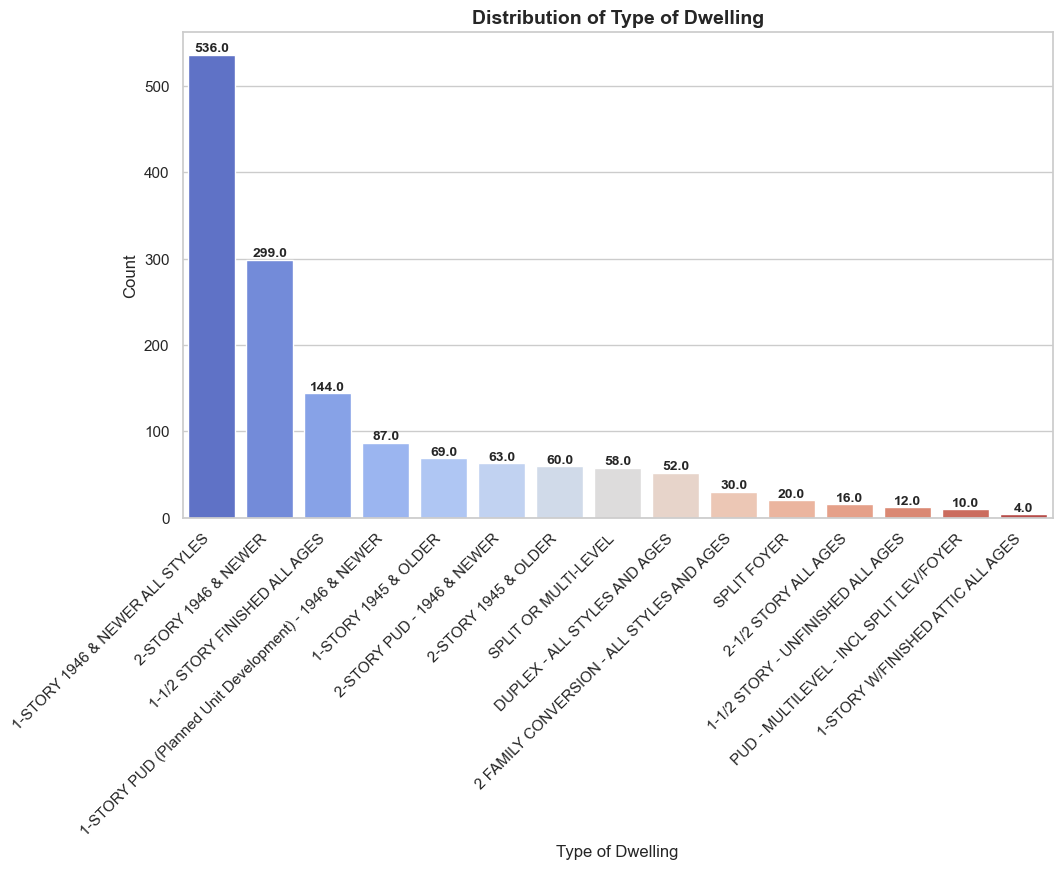

In [317]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create bar plot with color mapping
ax = sns.barplot(
    x=Housing_data["Type of Dwelling"].value_counts().index, 
    y=Housing_data["Type of Dwelling"].value_counts().values, 
    palette="coolwarm"
)

# Add labels and title
plt.xlabel("Type of Dwelling", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Type of Dwelling", fontsize=14, fontweight="bold")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.show()


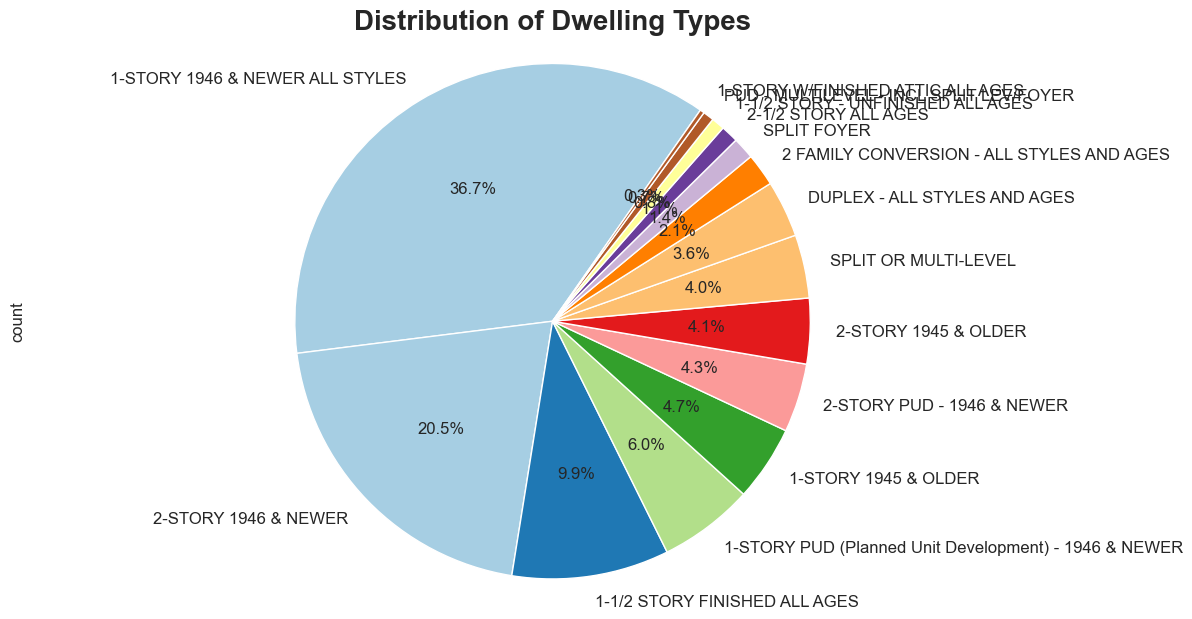

In [318]:
# Plot Pie Chart
plt.figure(figsize=(12, 7))
Housing_data["Type of Dwelling"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', startangle=55, colormap="Paired", fontsize=12,
)
pctdistance=0.85
wedgeprops={'edgecolor': 'black', 'linewidth': 1}
plt.title("Distribution of Dwelling Types", fontsize=20, fontweight="bold")
plt.axis("equal")  # Ensures the pie chart is circular

# Show the chart
plt.show()


### Insights from the Pie Chart and Bar Chart:

1. **Dominance of 1-Story 1946 & Newer Homes:**  
   - The largest portion (36.7%) of the housing data consists of **1-story homes built in 1946 & newer**. This suggests that these homes are the most common dwelling type in the dataset.  

2. **2-Story Homes Are the Second Most Common:**  
   - **2-story homes (1946 & newer)** make up **20.5%**, indicating a significant preference for multi-story houses in more recent constructions.  

3. **1.5-Story Homes Hold a Considerable Share:**  
   - **1.5-story finished homes** account for **9.9%**, making them another notable category of housing style.  

4. **Planned Unit Developments (PUDs) Are Present but Less Frequent:**  
   - **1-story PUDs (6.0%)** and **2-story PUDs (4.3%)** exist in the dataset but are far less common than traditional single-family dwellings.  

5. **Older Homes Are Less Frequent:**  
   - **1-story homes built before 1945 (4.7%)** and **2-story homes before 1945 (4.1%)** are a smaller fraction of the dataset, suggesting that older homes are either less prevalent or have been replaced over time.  

6. **Niche Housing Styles Are Minimal:**  
   - Dwelling types like **split foyers (2.1%)**, **duplexes (4.0%)**, and **2-family conversions (3.6%)** are much less common in comparison.  
   - **1-story homes with finished attics (0.3%)** are the rarest type in the dataset.  

In [319]:
# Checking MSZoning unique values
Housing_data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

### Renaming MSZoning column name and entries

In [320]:
Housing_data['MSZoning']=Housing_data["MSZoning"].replace({'RL':"Residential Low-Density",
                                       'RM':"Residential Medium Density",
                                       "FV":"Floating Village Residential",
                                       "RH":"Residential High-Density"})
Housing_data.rename(columns={"MSZoning":"Zone classification"},inplace=True)
Housing_data.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0         0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1         1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2         2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3         3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4         4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   LotFrontage   LotArea Street LotShape LandContour Utilities LotConfig  ...  \
0         65.0  9478.125   Pave      Reg         Lvl    AllPub    Inside  ...   
1         80.0  9478.125   Pave      Reg         Lvl    AllPub       FR2  ...   
2         68.0  9478.125   Pave      IR1         Lvl    AllPub    Inside  ...   
3         60.0  9478.125   Pave      IR1         Lvl    AllPub    Corner  ...   
4         84.0  9478.125   Pave      IR1         Lvl    AllPub       FR2  ...   

  Price_per_sqft House_Age Total_Bathrooms Total_Porch_Area Total_SF  \
0     121.929825       5.0             3.5             61.0   2566.0   
1     143.819334      31.0             2.0              0.0   2524.0   
2     125.139978       7.0             3.5             42.0   2706.0   
3      81.537566      91.0             2.0             35.0   2473.0   
4     113.739763       8.0             3.5             84.0   3343.0   

  Quality_Index  Price_per_Bedroom  Lot_Price_per_Sqft  Bsmt_Price_per_Sqft  \
0          35.0       69500.000000           21.998022           243.574766   
1          30.0       60500.000000           19.149357           143.819334   
2          35.0       74500.000000           23.580613           242.934783   
3          35.0       46666.666667           14.770854           185.185185   
4          40.0       62500.000000           26.376525           218.340611   

   Garage_Age  
0         5.0  
1        31.0  
2         7.0  
3         8.0  
4         8.0  

[5 rows x 90 columns]

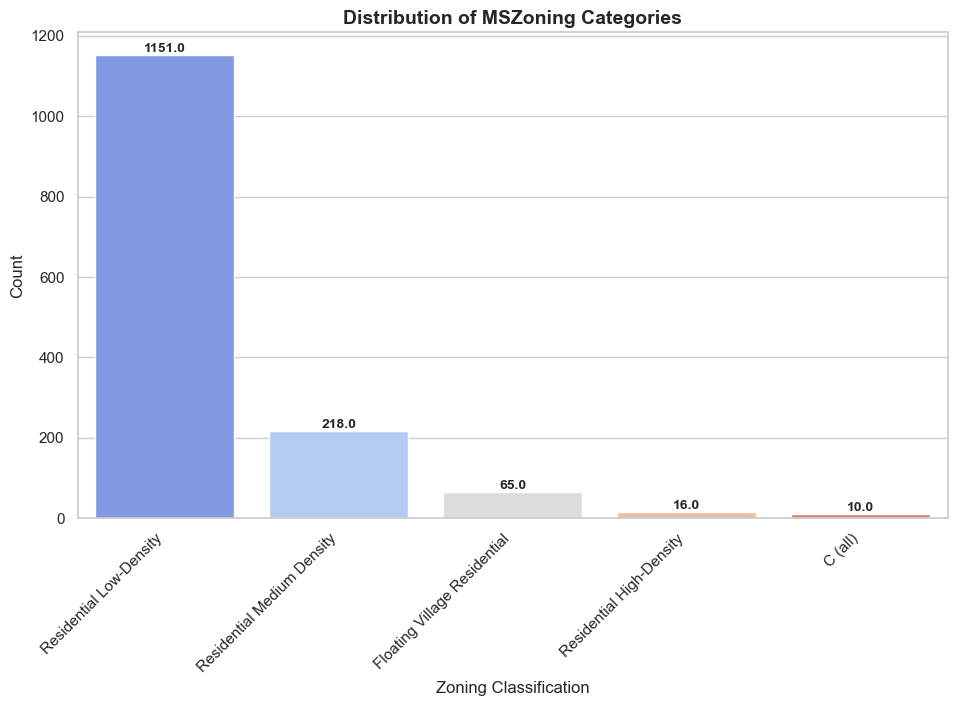

In [321]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create bar plot with color mapping
ax = sns.barplot(
    x=Housing_data["Zone classification"].value_counts().index, 
    y=Housing_data["Zone classification"].value_counts().values, 
    palette="coolwarm"
)

# Add labels and title
plt.xlabel("Zoning Classification", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of MSZoning Categories", fontsize=14, fontweight="bold")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.show()


### Insights from MSZoning Distribution Chart
#### 1. Dominance of Low-Density Residential (RL) Zoning:
The Residential Low-Density (RL) category has the highest count (1,151), making up the majority of properties.
#### 2. Medium-Density Residential (RM) is the Second Largest
The Residential Medium-Density (RM) category has 218 properties includes a mix of housing types, such as townhouses, duplexes, and smaller single-family homes.
#### 3. Limited Floating Village Residential (FV) & High-Density Residential (RH) Zones
Floating Village Residential (FV) has 65 properties, which is a niche category, likely representing specialized housing such as waterfront or houseboat communities.
#### 4. Minimal Commercial (C) Zoning
Commercial (C) zoning has the lowest count (10), confirming that the dataset is largely focused on residential properties rather than commercial developments.

In [322]:
# Checking LotFrontage unique values
Housing_data.rename(columns={"LotFrontage":"Linear feet of street"},inplace=True)
Housing_data.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0         0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1         1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2         2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3         3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4         4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street   LotArea Street LotShape LandContour Utilities  \
0                   65.0  9478.125   Pave      Reg         Lvl    AllPub   
1                   80.0  9478.125   Pave      Reg         Lvl    AllPub   
2                   68.0  9478.125   Pave      IR1         Lvl    AllPub   
3                   60.0  9478.125   Pave      IR1         Lvl    AllPub   
4                   84.0  9478.125   Pave      IR1         Lvl    AllPub   

  LotConfig  ... Price_per_sqft House_Age Total_Bathrooms Total_Porch_Area  \
0    Inside  ...     121.929825       5.0             3.5             61.0   
1       FR2  ...     143.819334      31.0             2.0              0.0   
2    Inside  ...     125.139978       7.0             3.5             42.0   
3    Corner  ...      81.537566      91.0             2.0             35.0   
4       FR2  ...     113.739763       8.0             3.5             84.0   

  Total_SF Quality_Index  Price_per_Bedroom  Lot_Price_per_Sqft  \
0   2566.0          35.0       69500.000000           21.998022   
1   2524.0          30.0       60500.000000           19.149357   
2   2706.0          35.0       74500.000000           23.580613   
3   2473.0          35.0       46666.666667           14.770854   
4   3343.0          40.0       62500.000000           26.376525   

   Bsmt_Price_per_Sqft  Garage_Age  
0           243.574766         5.0  
1           143.819334        31.0  
2           242.934783         7.0  
3           185.185185         8.0  
4           218.340611         8.0  

[5 rows x 90 columns]

<Axes: xlabel='Linear feet of street', ylabel='Count'>

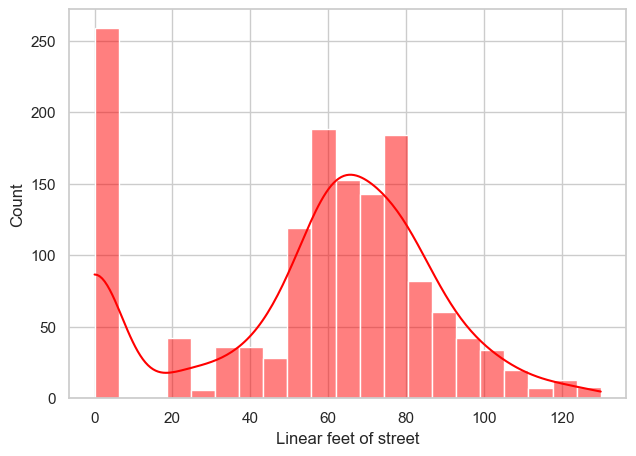

In [323]:
sns.histplot(Housing_data["Linear feet of street"], kde=True,color="red")

### Insights of Linear feet of street histplot 

1. **Bimodal Distribution**  
   The data appears to have **two peaks**, suggesting a **bimodal distribution** two different groups in the data.  

2. **High Frequency at Lower Values**  
    A significant concentration of values is near **zero**, implying that a large number of properties have very small street frontage.  

3. **Right-Skewed Distribution**  
    The distribution has a longer tail towards the right, indicating **some properties have significantly higher street frontage** than the rest.

# Renaming LotArea Column name

In [324]:
Housing_data.rename(columns={"LotArea":"Plot Size(sq.ft)"},inplace=True)
Housing_data.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0         0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1         1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2         2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3         3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4         4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Street LotShape LandContour  \
0                   65.0          9478.125   Pave      Reg         Lvl   
1                   80.0          9478.125   Pave      Reg         Lvl   
2                   68.0          9478.125   Pave      IR1         Lvl   
3                   60.0          9478.125   Pave      IR1         Lvl   
4                   84.0          9478.125   Pave      IR1         Lvl   

  Utilities LotConfig  ... Price_per_sqft House_Age Total_Bathrooms  \
0    AllPub    Inside  ...     121.929825       5.0             3.5   
1    AllPub       FR2  ...     143.819334      31.0             2.0   
2    AllPub    Inside  ...     125.139978       7.0             3.5   
3    AllPub    Corner  ...      81.537566      91.0             2.0   
4    AllPub       FR2  ...     113.739763       8.0             3.5   

  Total_Porch_Area Total_SF Quality_Index  Price_per_Bedroom  \
0             61.0   2566.0          35.0       69500.000000   
1              0.0   2524.0          30.0       60500.000000   
2             42.0   2706.0          35.0       74500.000000   
3             35.0   2473.0          35.0       46666.666667   
4             84.0   3343.0          40.0       62500.000000   

   Lot_Price_per_Sqft  Bsmt_Price_per_Sqft  Garage_Age  
0           21.998022           243.574766         5.0  
1           19.149357           143.819334        31.0  
2           23.580613           242.934783         7.0  
3           14.770854           185.185185         8.0  
4           26.376525           218.340611         8.0  

[5 rows x 90 columns]

# Renaming Street column name and its entries:

In [325]:
Housing_data.rename(columns={"Street":"Type of Road"},inplace=True)
Housing_data["Type of Road"]=Housing_data["Type of Road"].replace({"Pave":"Paved Road","Grvl":"Gravel Road"})

array(['Paved Road', 'Gravel Road'], dtype=object)

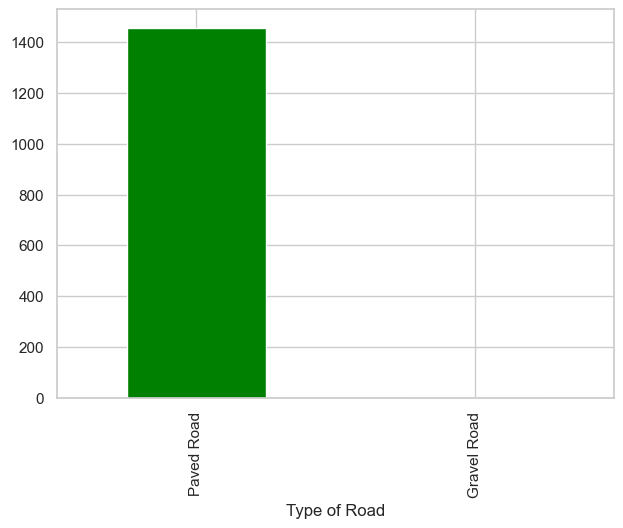

In [326]:
# Checking Street unique values
Housing_data["Type of Road"].value_counts().plot(kind="bar",color="green")
Housing_data["Type of Road"].unique()

# Renaming LotShape column entries

In [327]:
Housing_data.rename(columns={"LotShape":"General Shape of propoerty"},inplace=True)
Housing_data["General Shape of propoerty"]=Housing_data["General Shape of propoerty"].replace({"Reg":"Regular","IR1":"Slightly irregular",
                                                                          "IR2":"Moderately irregular","IR3":"Irregular"})
Housing_data.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0         0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1         1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2         2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3         3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4         4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road  \
0                   65.0          9478.125   Paved Road   
1                   80.0          9478.125   Paved Road   
2                   68.0          9478.125   Paved Road   
3                   60.0          9478.125   Paved Road   
4                   84.0          9478.125   Paved Road   

  General Shape of propoerty LandContour Utilities LotConfig  ...  \
0                    Regular         Lvl    AllPub    Inside  ...   
1                    Regular         Lvl    AllPub       FR2  ...   
2         Slightly irregular         Lvl    AllPub    Inside  ...   
3         Slightly irregular         Lvl    AllPub    Corner  ...   
4         Slightly irregular         Lvl    AllPub       FR2  ...   

  Price_per_sqft House_Age Total_Bathrooms Total_Porch_Area Total_SF  \
0     121.929825       5.0             3.5             61.0   2566.0   
1     143.819334      31.0             2.0              0.0   2524.0   
2     125.139978       7.0             3.5             42.0   2706.0   
3      81.537566      91.0             2.0             35.0   2473.0   
4     113.739763       8.0             3.5             84.0   3343.0   

  Quality_Index  Price_per_Bedroom  Lot_Price_per_Sqft  Bsmt_Price_per_Sqft  \
0          35.0       69500.000000           21.998022           243.574766   
1          30.0       60500.000000           19.149357           143.819334   
2          35.0       74500.000000           23.580613           242.934783   
3          35.0       46666.666667           14.770854           185.185185   
4          40.0       62500.000000           26.376525           218.340611   

   Garage_Age  
0         5.0  
1        31.0  
2         7.0  
3         8.0  
4         8.0  

[5 rows x 90 columns]

array(['Regular', 'Slightly irregular', 'Moderately irregular',
       'Irregular'], dtype=object)

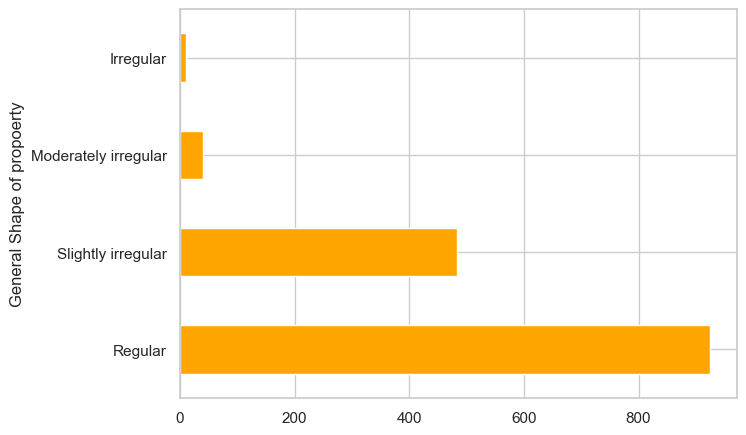

In [328]:
Housing_data['General Shape of propoerty'].value_counts().plot(kind="barh",color="orange")
Housing_data["General Shape of propoerty"].unique()

### Insights of General Shape of Property Distribution barplot 

1. **"Regular" Shape Dominates**  
    The majority of properties have a "Regular" shape, with the highest frequency (close to 900) follows standard design and layout patterns.  

2. **"Slightly Irregular" is the Second Most Common**  
   A significant number of properties are "Slightly Irregular," indicating some variation in layout but not extreme deviations.  

3. **Less Frequent "Moderately Irregular" and "Irregular" Shapes**  
    Properties categorized as "Moderately Irregular" and "Irregular" are very few in this dataset.

# Renaming LandContour column entries

In [329]:
Housing_data.rename(columns={"LandContour":"Flatness of the propoerty"},inplace=True)
Housing_data["Flatness of the propoerty"]=Housing_data["Flatness of the propoerty"].replace({"Lvl":"Near Flat / Level",
                                                                        "Bnk":"Banked","HLS":"Hillside",
                                                                        "Low":"Depression"})
Housing_data.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0         0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1         1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2         2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3         3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4         4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road  \
0                   65.0          9478.125   Paved Road   
1                   80.0          9478.125   Paved Road   
2                   68.0          9478.125   Paved Road   
3                   60.0          9478.125   Paved Road   
4                   84.0          9478.125   Paved Road   

  General Shape of propoerty Flatness of the propoerty Utilities LotConfig  \
0                    Regular         Near Flat / Level    AllPub    Inside   
1                    Regular         Near Flat / Level    AllPub       FR2   
2         Slightly irregular         Near Flat / Level    AllPub    Inside   
3         Slightly irregular         Near Flat / Level    AllPub    Corner   
4         Slightly irregular         Near Flat / Level    AllPub       FR2   

   ... Price_per_sqft House_Age Total_Bathrooms Total_Porch_Area Total_SF  \
0  ...     121.929825       5.0             3.5             61.0   2566.0   
1  ...     143.819334      31.0             2.0              0.0   2524.0   
2  ...     125.139978       7.0             3.5             42.0   2706.0   
3  ...      81.537566      91.0             2.0             35.0   2473.0   
4  ...     113.739763       8.0             3.5             84.0   3343.0   

  Quality_Index  Price_per_Bedroom  Lot_Price_per_Sqft  Bsmt_Price_per_Sqft  \
0          35.0       69500.000000           21.998022           243.574766   
1          30.0       60500.000000           19.149357           143.819334   
2          35.0       74500.000000           23.580613           242.934783   
3          35.0       46666.666667           14.770854           185.185185   
4          40.0       62500.000000           26.376525           218.340611   

   Garage_Age  
0         5.0  
1        31.0  
2         7.0  
3         8.0  
4         8.0  

[5 rows x 90 columns]

array(['Regular', 'Slightly irregular', 'Moderately irregular',
       'Irregular'], dtype=object)

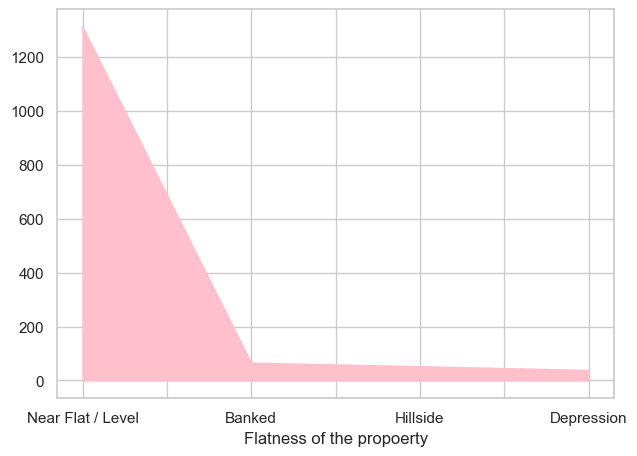

In [330]:
Housing_data["Flatness of the propoerty"].value_counts().plot(kind="area",color="pink")
Housing_data["General Shape of propoerty"].unique()

### Insights of Flatness of the propoerty plot:
1. **Dominance of "Near Flat / Level" Properties:**  
    The majority of properties fall under the "Near Flat / Level" category, with a count exceeding **1,200**.  
  
2. **Significantly Lower Counts for Other Categories:**  
    "Banked" properties have a **sharp drop** in frequency.  
    "Hillside" and "Depression" categories have even fewer occurrences.  

3. **Potential Influence on Property Value:**  
    **Hillside or Depression properties** might be **less desirable** 


# Renaming Utilities column entries

In [331]:
Housing_data["Utilities"]=Housing_data["Utilities"].replace({"AllPub":"All utilities E,G,W,S",
                                        "NoSeWa":"Electricity and Gas only"})
Housing_data.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0         0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1         1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2         2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3         3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4         4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road  \
0                   65.0          9478.125   Paved Road   
1                   80.0          9478.125   Paved Road   
2                   68.0          9478.125   Paved Road   
3                   60.0          9478.125   Paved Road   
4                   84.0          9478.125   Paved Road   

  General Shape of propoerty Flatness of the propoerty              Utilities  \
0                    Regular         Near Flat / Level  All utilities E,G,W,S   
1                    Regular         Near Flat / Level  All utilities E,G,W,S   
2         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
3         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
4         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   

  LotConfig  ... Price_per_sqft House_Age Total_Bathrooms Total_Porch_Area  \
0    Inside  ...     121.929825       5.0             3.5             61.0   
1       FR2  ...     143.819334      31.0             2.0              0.0   
2    Inside  ...     125.139978       7.0             3.5             42.0   
3    Corner  ...      81.537566      91.0             2.0             35.0   
4       FR2  ...     113.739763       8.0             3.5             84.0   

  Total_SF Quality_Index  Price_per_Bedroom  Lot_Price_per_Sqft  \
0   2566.0          35.0       69500.000000           21.998022   
1   2524.0          30.0       60500.000000           19.149357   
2   2706.0          35.0       74500.000000           23.580613   
3   2473.0          35.0       46666.666667           14.770854   
4   3343.0          40.0       62500.000000           26.376525   

   Bsmt_Price_per_Sqft  Garage_Age  
0           243.574766         5.0  
1           143.819334        31.0  
2           242.934783         7.0  
3           185.185185         8.0  
4           218.340611         8.0  

[5 rows x 90 columns]

array(['All utilities E,G,W,S', 'Electricity and Gas only'], dtype=object)

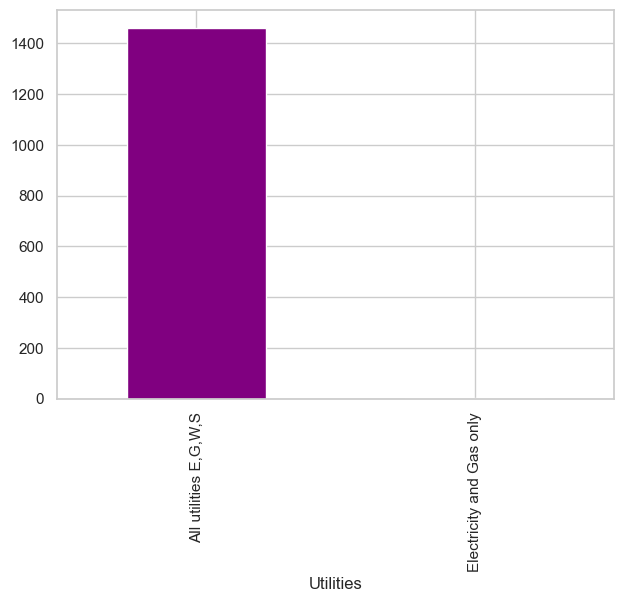

In [332]:
Housing_data["Utilities"].value_counts().plot(kind='bar',color="purple")
Housing_data["Utilities"].unique()

### Insights of utilities:  

1. **Majority of Properties Have Full Public Utilities**  
    all public utilities** (Electricity, Gas, Water, and Sewer)
    This suggests that most homes in the dataset are in well-developed areas with full infrastructure.  

2. **Minimal Properties with Limited Utilities**  
   Very few properties have **only Electricity and Gas**, indicating that homes without full utilities are rare.

# Renaming LotConfig column entries

In [333]:

Housing_data["LotConfig"]=Housing_data["LotConfig"].replace({"Inside":"Inside lot",
                                        "Corner":"Corner Lot",
                                        "CulDSac":"Cul-de-sac",
                                        "FR2":"Frontage on 2 sides of the property",
                                        "FR3":"Frontage on 3 sides of the property"})
Housing_data.rename(columns={"LotConfig":"Lot Configuration"},inplace=True)
Housing_data.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0         0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1         1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2         2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3         3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4         4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road  \
0                   65.0          9478.125   Paved Road   
1                   80.0          9478.125   Paved Road   
2                   68.0          9478.125   Paved Road   
3                   60.0          9478.125   Paved Road   
4                   84.0          9478.125   Paved Road   

  General Shape of propoerty Flatness of the propoerty              Utilities  \
0                    Regular         Near Flat / Level  All utilities E,G,W,S   
1                    Regular         Near Flat / Level  All utilities E,G,W,S   
2         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
3         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
4         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   

                     Lot Configuration  ... Price_per_sqft House_Age  \
0                           Inside lot  ...     121.929825       5.0   
1  Frontage on 2 sides of the property  ...     143.819334      31.0   
2                           Inside lot  ...     125.139978       7.0   
3                           Corner Lot  ...      81.537566      91.0   
4  Frontage on 2 sides of the property  ...     113.739763       8.0   

  Total_Bathrooms Total_Porch_Area Total_SF Quality_Index  Price_per_Bedroom  \
0             3.5             61.0   2566.0          35.0       69500.000000   
1             2.0              0.0   2524.0          30.0       60500.000000   
2             3.5             42.0   2706.0          35.0       74500.000000   
3             2.0             35.0   2473.0          35.0       46666.666667   
4             3.5             84.0   3343.0          40.0       62500.000000   

   Lot_Price_per_Sqft  Bsmt_Price_per_Sqft  Garage_Age  
0           21.998022           243.574766         5.0  
1           19.149357           143.819334        31.0  
2           23.580613           242.934783         7.0  
3           14.770854           185.185185         8.0  
4           26.376525           218.340611         8.0  

[5 rows x 90 columns]

array(['Inside lot', 'Frontage on 2 sides of the property', 'Corner Lot',
       'Cul-de-sac', 'Frontage on 3 sides of the property'], dtype=object)

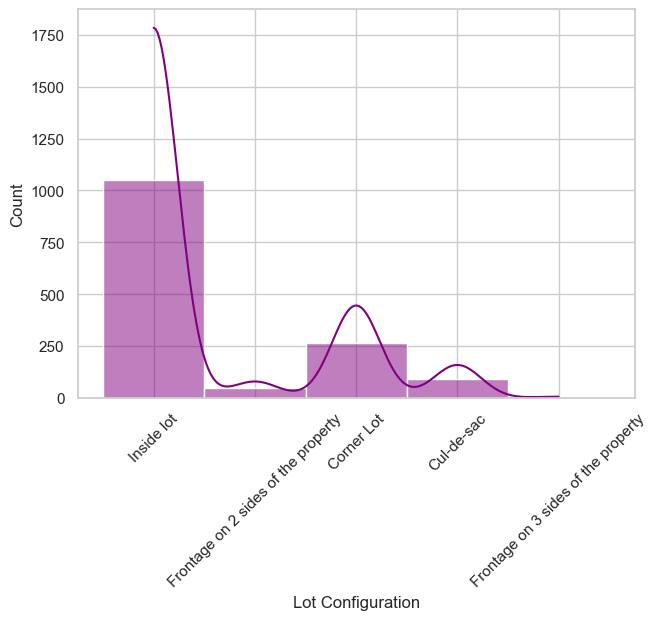

In [334]:
sns.histplot(Housing_data["Lot Configuration"], kde=True,color="purple")
plt.xticks(rotation=45)
Housing_data["Lot Configuration"].unique()

### Insights from the Lot Configuration Distribution Plot:

1. Dominance of "Inside Lot":  
The highest frequency of properties belongs to the "Inside Lot" category, reinforcing that standard rectangular lots are the most common.

2. Corner and Cul-de-sac Lots Show Noticeable Presence:  The second peak in the KDE (Kernel Density Estimation) curve aligns with "Corner Lots," showing they are the next most frequent lot type.
"Cul-de-sac" lots also have a small but visible presence.

3. Rare Occurrence of Premium Lot Configurations:  
 Properties with frontage on **2 or 3 sides** are very rare, as indicated by the low bar heights and minimal density in the KDE plot.

# Renaming LandSlope Column entries

In [335]:
Housing_data["LandSlope"]=Housing_data["LandSlope"].replace({"Gtl":"Gentle slope",
                                        "Mod":"Moderate slope",
                                        "Sev":"Severe Slope"})
Housing_data.rename(columns={"LandSlope":"Slope of property"},inplace=True)
Housing_data.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0         0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1         1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2         2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3         3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4         4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road  \
0                   65.0          9478.125   Paved Road   
1                   80.0          9478.125   Paved Road   
2                   68.0          9478.125   Paved Road   
3                   60.0          9478.125   Paved Road   
4                   84.0          9478.125   Paved Road   

  General Shape of propoerty Flatness of the propoerty              Utilities  \
0                    Regular         Near Flat / Level  All utilities E,G,W,S   
1                    Regular         Near Flat / Level  All utilities E,G,W,S   
2         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
3         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
4         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   

                     Lot Configuration  ... Price_per_sqft House_Age  \
0                           Inside lot  ...     121.929825       5.0   
1  Frontage on 2 sides of the property  ...     143.819334      31.0   
2                           Inside lot  ...     125.139978       7.0   
3                           Corner Lot  ...      81.537566      91.0   
4  Frontage on 2 sides of the property  ...     113.739763       8.0   

  Total_Bathrooms Total_Porch_Area Total_SF Quality_Index  Price_per_Bedroom  \
0             3.5             61.0   2566.0          35.0       69500.000000   
1             2.0              0.0   2524.0          30.0       60500.000000   
2             3.5             42.0   2706.0          35.0       74500.000000   
3             2.0             35.0   2473.0          35.0       46666.666667   
4             3.5             84.0   3343.0          40.0       62500.000000   

   Lot_Price_per_Sqft  Bsmt_Price_per_Sqft  Garage_Age  
0           21.998022           243.574766         5.0  
1           19.149357           143.819334        31.0  
2           23.580613           242.934783         7.0  
3           14.770854           185.185185         8.0  
4           26.376525           218.340611         8.0  

[5 rows x 90 columns]

array(['Gentle slope', 'Moderate slope', 'Severe Slope'], dtype=object)

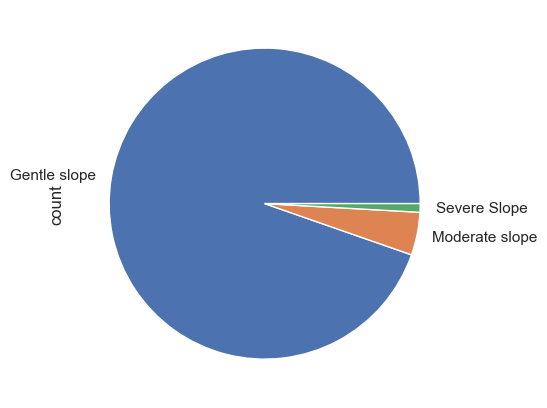

In [336]:
Housing_data["Slope of property"].value_counts().plot(kind="pie")
Housing_data["Slope of property"].unique()

### Insights Slope of property Pie Chart:
1. **Dominance of Gentle Slope:**  
   The majority of properties have a "Gentle slope," as indicated by the large blue section of the pie chart which mostly of land suitable for standard residential or commercial development.
   
2. **Minor Representation of Other Slopes:**  
   "Moderate slope" and "Severe slope" categories occupy very small portions of the chart.
  

## 3.4 Checking Correlation of Categorical data

### Handling categorical data by importing label encoders

In [337]:
categorical1_columns=Housing_data[['Type of Dwelling','BldgType','BsmtCond','BsmtExposure','BsmtFullBath','BsmtHalfBath','BsmtQual','CentralAir','Electrical','ExterCond','ExterQual','Fence','Fireplaces','FullBath','GarageCars','GarageFinish','HalfBath','HeatingQC','KitchenAbvGr','KitchenQual','Flatness of the propoerty','Slope of property','Lot Configuration','General Shape of propoerty','Zone classification','MasVnrType','MiscFeature','PavedDrive','PoolQC','Type of Road','Utilities','SalePrice']]


In [338]:
categorical1_columns

Type of Dwelling BldgType BsmtCond BsmtExposure  \
0                2-STORY 1946 & NEWER     1Fam       TA           No   
1     1-STORY 1946 & NEWER ALL STYLES     1Fam       TA           Gd   
2                2-STORY 1946 & NEWER     1Fam       TA           Mn   
3                2-STORY 1945 & OLDER     1Fam       Gd           No   
4                2-STORY 1946 & NEWER     1Fam       TA           Av   
...                               ...      ...      ...          ...   
1455             2-STORY 1946 & NEWER     1Fam       TA           No   
1456  1-STORY 1946 & NEWER ALL STYLES     1Fam       TA           No   
1457             2-STORY 1945 & OLDER     1Fam       Gd           No   
1458  1-STORY 1946 & NEWER ALL STYLES     1Fam       TA           Mn   
1459  1-STORY 1946 & NEWER ALL STYLES     1Fam       TA           No   

      BsmtFullBath  BsmtHalfBath BsmtQual CentralAir Electrical ExterCond  \
0              1.0           0.0       Gd          Y      SBrkr        TA   
1              0.0           0.0       Gd          Y      SBrkr        TA   
2              1.0           0.0       Gd          Y      SBrkr        TA   
3              1.0           0.0       TA          Y      SBrkr        TA   
4              1.0           0.0       Gd          Y      SBrkr        TA   
...            ...           ...      ...        ...        ...       ...   
1455           0.0           0.0       Gd          Y      SBrkr        TA   
1456           1.0           0.0       Gd          Y      SBrkr        TA   
1457           0.0           0.0       TA          Y      SBrkr        Gd   
1458           1.0           0.0       TA          Y      FuseA        TA   
1459           1.0           0.0       TA          Y      SBrkr        TA   

      ...                    Lot Configuration General Shape of propoerty  \
0     ...                           Inside lot                    Regular   
1     ...  Frontage on 2 sides of the property                    Regular   
2     ...                           Inside lot         Slightly irregular   
3     ...                           Corner Lot         Slightly irregular   
4     ...  Frontage on 2 sides of the property         Slightly irregular   
...   ...                                  ...                        ...   
1455  ...                           Inside lot                    Regular   
1456  ...                           Inside lot                    Regular   
1457  ...                           Inside lot                    Regular   
1458  ...                           Inside lot                    Regular   
1459  ...                           Inside lot                    Regular   

          Zone classification  MasVnrType  MiscFeature PavedDrive  PoolQC  \
0     Residential Low-Density     BrkFace           No          Y      No   
1     Residential Low-Density     BrkFace           No          Y      No   
2     Residential Low-Density     BrkFace           No          Y      No   
3     Residential Low-Density     BrkFace           No          Y      No   
4     Residential Low-Density     BrkFace           No          Y      No   
...                       ...         ...          ...        ...     ...   
1455  Residential Low-Density     BrkFace           No          Y      No   
1456  Residential Low-Density       Stone           No          Y      No   
1457  Residential Low-Density     BrkFace         Shed          Y      No   
1458  Residential Low-Density     BrkFace           No          Y      No   
1459  Residential Low-Density     BrkFace           No          Y      No   

     Type of Road              Utilities SalePrice  
0      Paved Road  All utilities E,G,W,S  208500.0  
1      Paved Road  All utilities E,G,W,S  181500.0  
2      Paved Road  All utilities E,G,W,S  223500.0  
3      Paved Road  All utilities E,G,W,S  140000.0  
4      Paved Road  All utilities E,G,W,S  250000.0  
...           ...                    ...       ...  
1455   Pav

In [339]:
categorical1_columns.columns

Index(['Type of Dwelling', 'BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'CentralAir', 'Electrical',
       'ExterCond', 'ExterQual', 'Fence', 'Fireplaces', 'FullBath',
       'GarageCars', 'GarageFinish', 'HalfBath', 'HeatingQC', 'KitchenAbvGr',
       'KitchenQual', 'Flatness of the propoerty', 'Slope of property',
       'Lot Configuration', 'General Shape of propoerty',
       'Zone classification', 'MasVnrType', 'MiscFeature', 'PavedDrive',
       'PoolQC', 'Type of Road', 'Utilities', 'SalePrice'],
      dtype='object')

In [340]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in categorical1_columns.columns:
  categorical1_columns[column]=le.fit_transform(categorical1_columns[column])

### Correlation with Categorical data

In [341]:
c2=categorical1_columns.corr()
c2

Type of Dwelling  BldgType  BsmtCond  \
Type of Dwelling                    1.000000  0.192911  0.015807   
BldgType                            0.192911  1.000000  0.014101   
BsmtCond                            0.015807  0.014101  1.000000   
BsmtExposure                       -0.197494 -0.046553 -0.058202   
BsmtFullBath                        0.036039  0.046940  0.086818   
BsmtHalfBath                             NaN       NaN       NaN   
BsmtQual                           -0.154298 -0.151092 -0.019858   
CentralAir                          0.049878  0.018197  0.197910   
Electrical                          0.160318  0.073898  0.141201   
ExterCond                           0.079315  0.085067  0.199067   
ExterQual                          -0.051819 -0.087862 -0.007887   
Fence                               0.011459  0.132866 -0.032217   
Fireplaces                          0.069675 -0.087598  0.043991   
FullBath                            0.281756  0.070757  0.002418   
GarageCars                          0.176731  0.003578  0.081293   
GarageFinish                       -0.134736 -0.064432 -0.051849   
HalfBath                            0.398654 -0.007588  0.089958   
HeatingQC                          -0.014645 -0.010396 -0.063981   
KitchenAbvGr                             NaN       NaN       NaN   
KitchenQual                        -0.032261 -0.024531 -0.008506   
Flatness of the propoerty           0.074125  0.063303  0.032352   
Slope of property                  -0.035756 -0.053582  0.008127   
Lot Configuration                  -0.022814  0.107229  0.030091   
General Shape of propoerty          0.053301 -0.076450  0.040194   
Zone classification                -0.097153  0.005690 -0.011450   
MasVnrType                         -0.007310  0.066513  0.023570   
MiscFeature                        -0.038179 -0.062730  0.002326   
PavedDrive                          0.116912  0.059390  0.157161   
PoolQC                             -0.047944  0.026062 -0.020600   
Type of Road                       -0.007604 -0.018243 -0.020903   
Utilities                          -0.017946 -0.010778  0.008519   
SalePrice                           0.205778 -0.041684  0.130422   

                            BsmtExposure  BsmtFullBath  BsmtHalfBath  \
Type of Dwelling               -0.197494      0.036039           NaN   
BldgType                       -0.046553      0.046940           NaN   
BsmtCond                       -0.058202      0.086818           NaN   
BsmtExposure                    1.000000     -0.271010           NaN   
BsmtFullBath                   -0.271010      1.000000           NaN   
BsmtHalfBath                         NaN           NaN           NaN   
BsmtQual                        0.287341     -0.145657           NaN   
CentralAir                     -0.097594      0.114502           NaN   
Electrical                     -0.130056      0.123397           NaN   
ExterCond                      -0.062875      0.010299           NaN   
ExterQual                       0.222958     -0.104687           NaN   
Fence                          -0.069765     -0.040540           NaN   
Fireplaces                     -0.108568      0.134070           NaN   
FullBath                       -0.087973     -0.075455           NaN   
GarageCars                     -0.231126      0.137820           NaN   
GarageFinish                    0.197116     -0.131667           NaN   
HalfBath                        0.062380     -0.028120           NaN   
HeatingQC                       0.123064     -0.067149           NaN   
KitchenAbvGr                         NaN           NaN           NaN   
KitchenQual                     0.203792     -0.125057           NaN   
Flatness of the propoerty       0.054441     -0.010340           NaN   
Slope of property              -0.165347      0.118032           NaN   
Lot Configuration               0.015969     -0.015473           NaN   
General Shape of propoerty     -0.089905      0.067596 

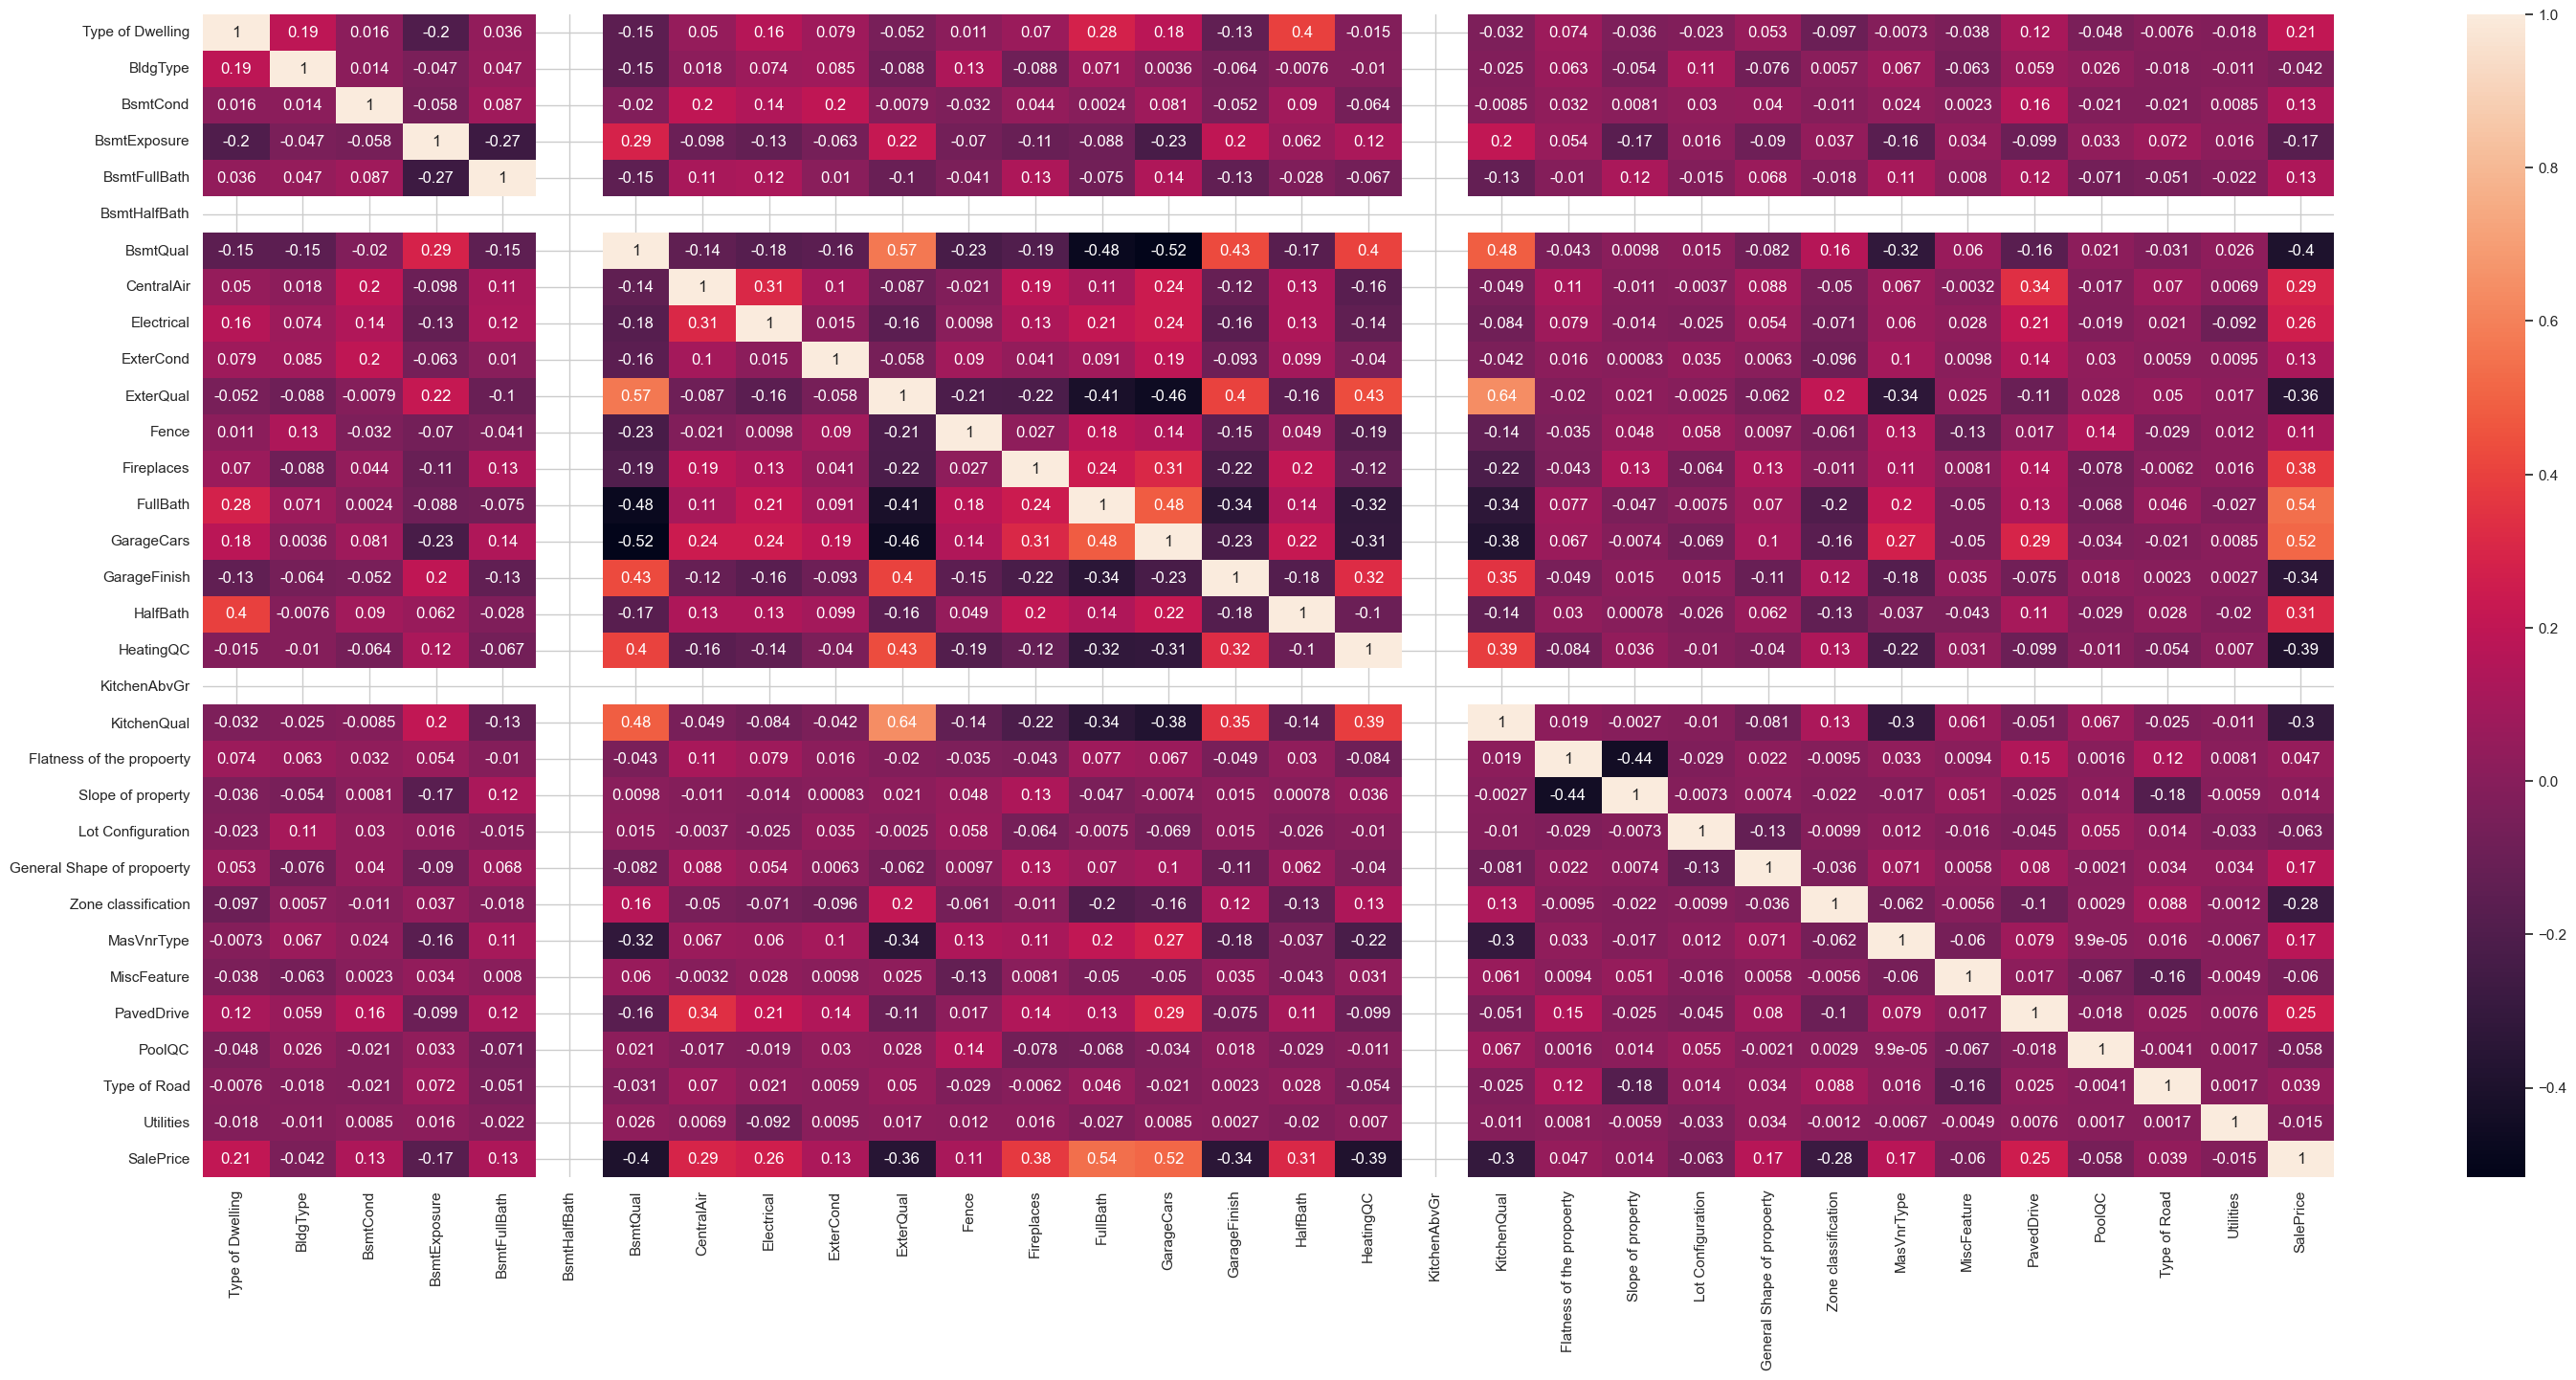

In [342]:
plt.figure(figsize=(32, 15))
sns.heatmap(c2,annot=True)
plt.show()

### Insights of Categorical columns Correlation Heatmaps and Table:

1. **Highly Correlated Features:**
    Some variables exhibit a strong correlation (closer to ±1), For example:
   **GarageCars and GarageArea** show a strong positive correlation, indicating that as the number of garage cars increases, the garage area also increases.
   **TotalBsmtSF and 1stFlrSF** also have a high correlation, implying that a larger basement area is associated with a larger first-floor area.

2. **Weak or No Correlation:**
   Some features have near-zero correlation, meaning they have little to no linear relationship with each other. These may be independent variables that impact the target separately.

3. **Negative Correlations:**
   Certain features exhibit negative correlations, implying an inverse relationship like BsmtExposure and BsmtQual show a weak negative correlation, meaning that higher exposure might be associated with slightly lower basement quality.

4. **Categorical vs. Numerical Influence:**
    Some categorical features, such as **"Type of Road"** or **"Slope of Property"**, show weak correlations with numerical variables, suggesting that they may not have a direct numeric influence on the dataset.

5. **Handling Multicollinearity:**
   Features with strong correlations (above ±0.7) should be carefully analyzed.

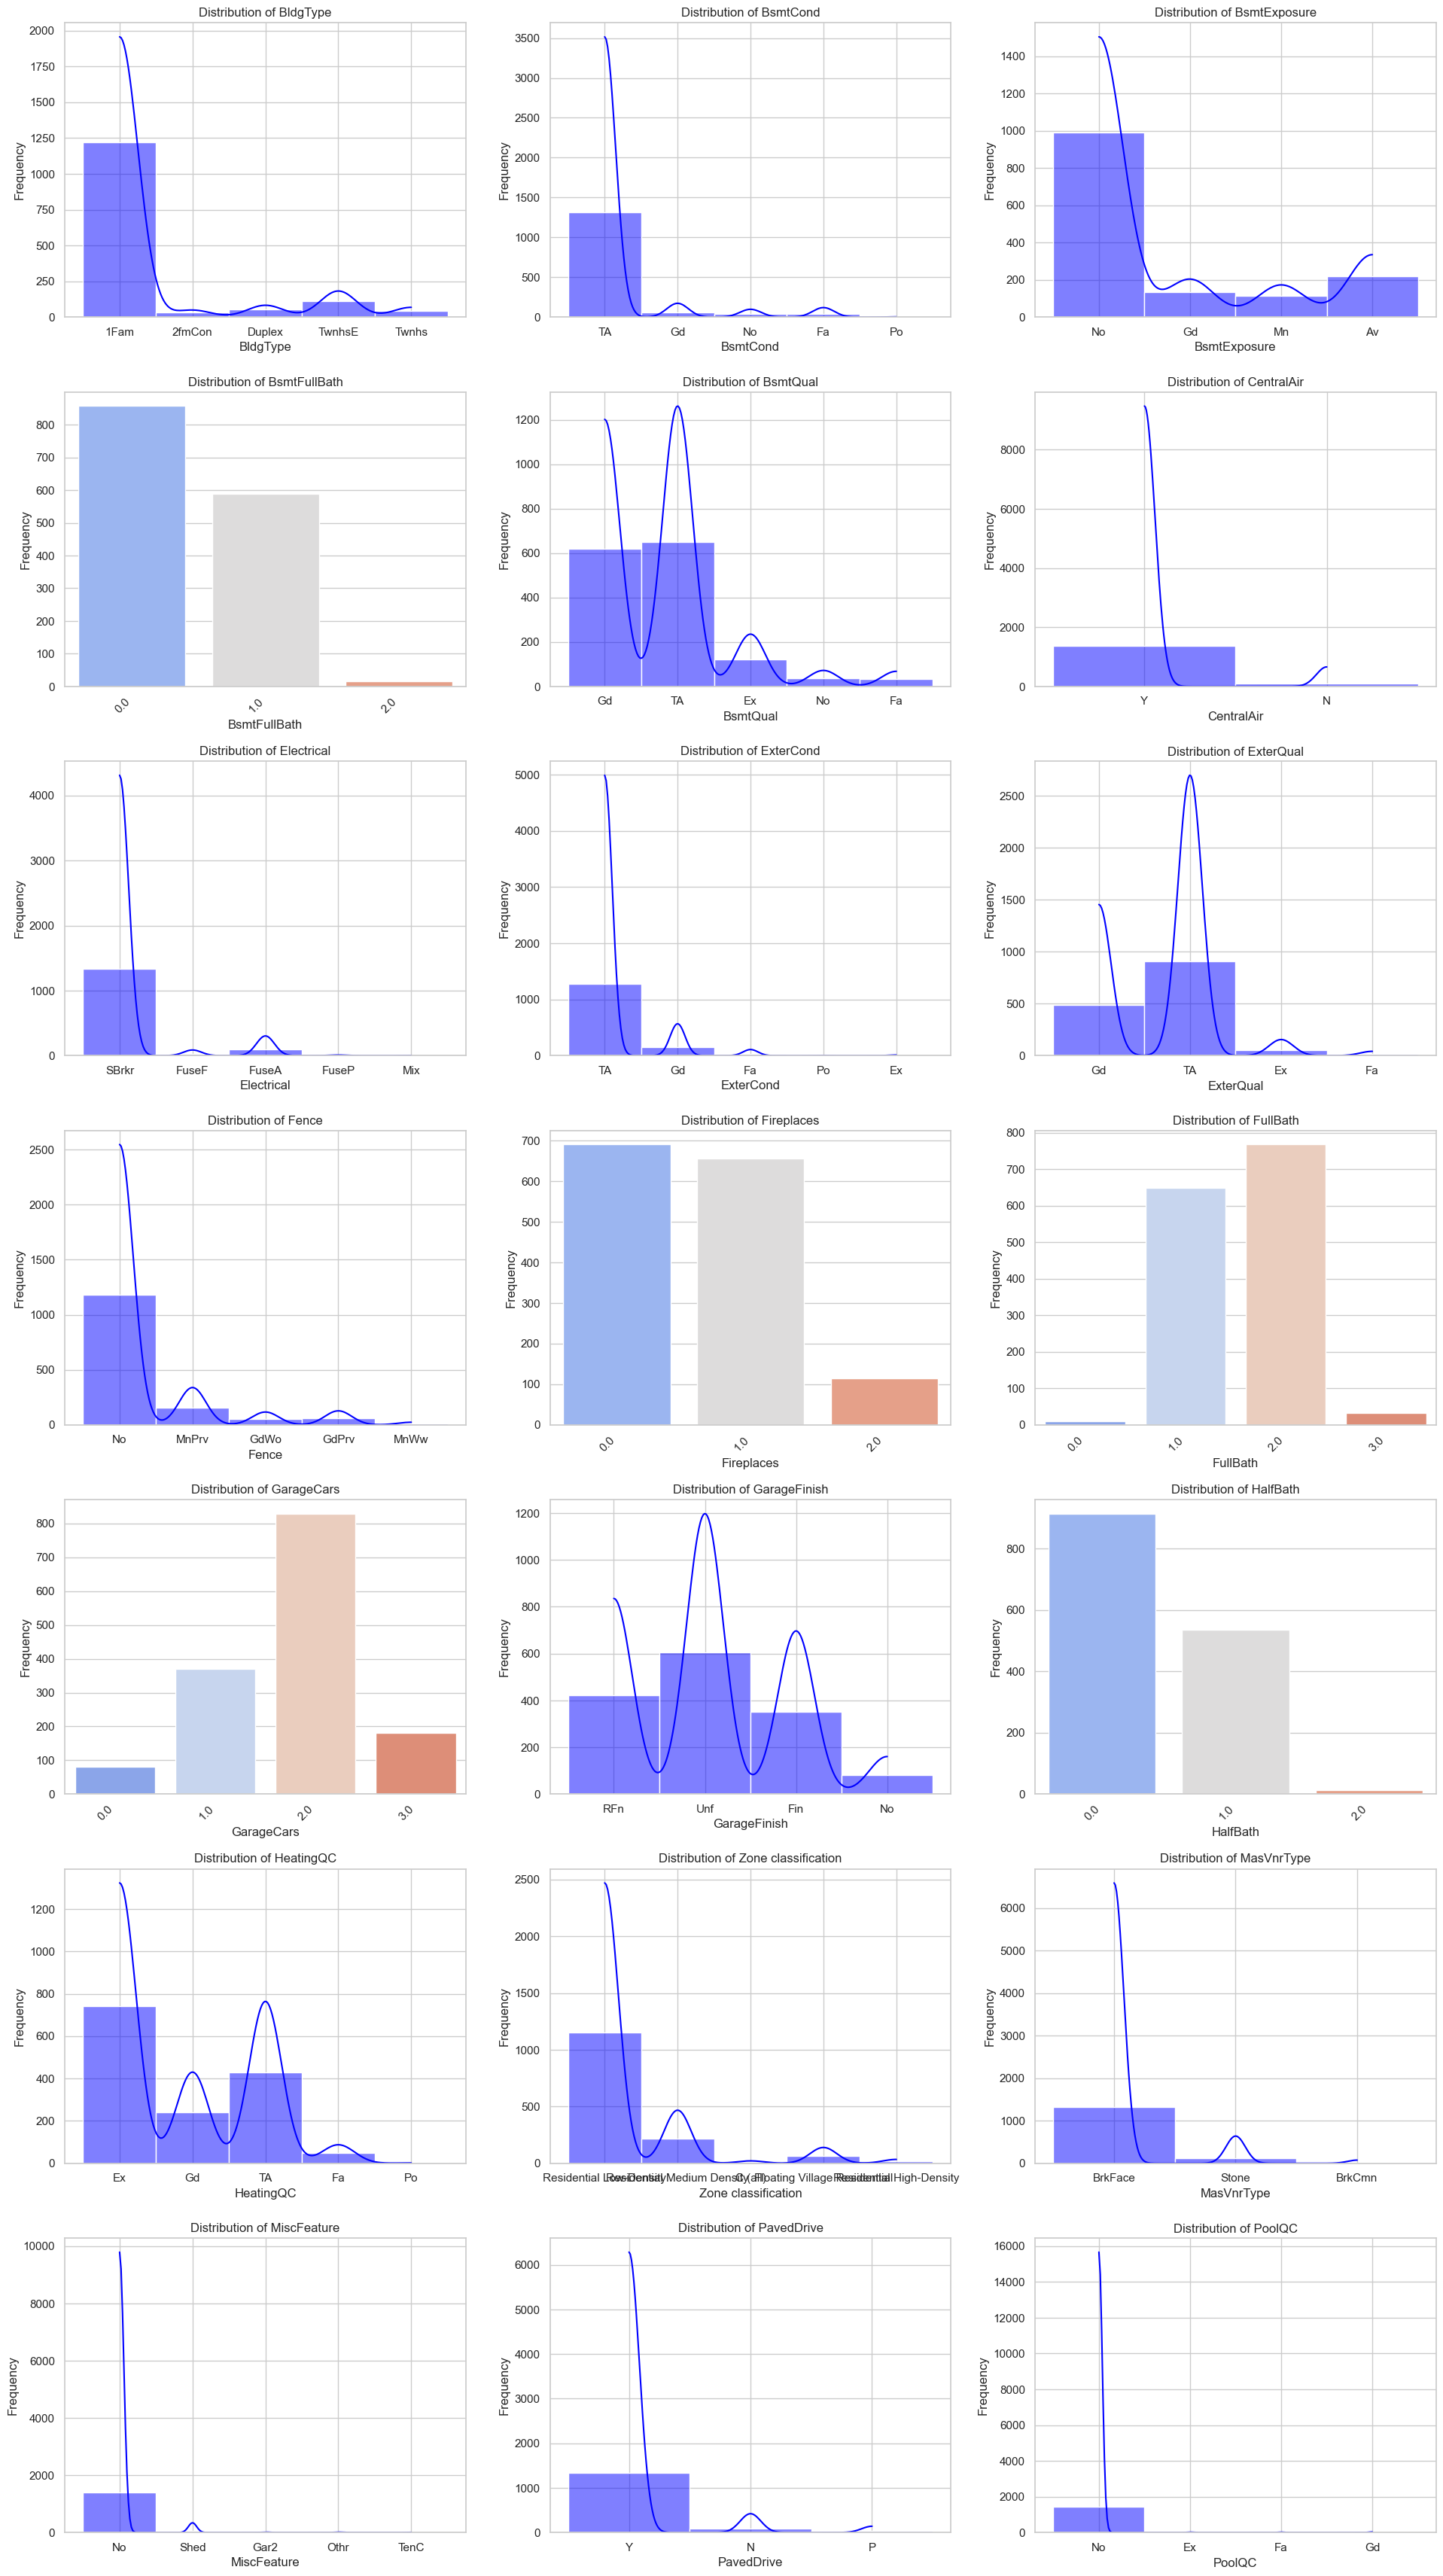

In [343]:
# Define the columns to plot
columns = [ 'BldgType', 'BsmtCond', 'BsmtExposure','BsmtFullBath','BsmtQual', 'CentralAir', 'Electrical',
           'ExterCond', 'ExterQual', 'Fence', 'Fireplaces', 'FullBath',
           'GarageCars', 'GarageFinish','HalfBath', 'HeatingQC',
           'Zone classification', 'MasVnrType', 'MiscFeature', 'PavedDrive',
           'PoolQC']

# Filter out missing columns
valid_columns = [col for col in columns if col in Housing_data.columns]
num_features = len(valid_columns)  # Ensure num_features is not zero
cols = 3  # Number of columns per row
rows = -(-num_features // cols)  # Ceiling division to determine rows

# Now create subplots safely
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  
fig.tight_layout(pad=4.0)  

for i, column in enumerate(valid_columns):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if rows > 1 else axes[col]  # Handle 1-row case

    # Plot based on data type
    if Housing_data[column].dtype in ['object']:
        sns.histplot(Housing_data[column], kde=True, bins=20, color="blue", ax=ax)
    else:
        sns.countplot(x=Housing_data[column], palette="coolwarm", ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots (if any)
for i in range(num_features, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.show()


# Insights based on the categorical feature distributions from the histograms:

1. **Highly Skewed Categories:**  
   Many categorical variables have highly skewed distributions. For example, **BsmtExposure, CentralAir, Electrical, and ExterCond** show that most values fall into one or two categories, indicating a strong preference or dominance of certain categories in the dataset.

2. **Rare Categories:**  
   Some features like **PoolQC, MiscFeature, and Fence** have very few observations in certain categories.

3. **Dominance of Certain Values:**  
   Features like **HeatingQC, KitchenQual, and PavedDrive** show a strong dominance of specific values (e.g., ‘Ex’, ‘TA’, or ‘Y’), indicating limited variability in these variables.
   
4. **Bimodal or Multimodal Distributions:**  
    Some variables, such as **Zone classification and ExterQual**, show multiple peaks, which suggests that different subgroups exist in the data. This might indicate the need for further exploration to understand segmentation.

5. **Non-Informative Variables:**  
   Certain variables, like **MiscFeature** and **PoolQC**, might not be very informative due to their extreme imbalance (e.g., most houses don’t have pools). They might need to be dropped or treated differently in the analysis.

In [344]:
Housing_data.rename(columns={'OverallQual': "Overall Quality"}, inplace=True)

Housing_data['Overall Quality'] = Housing_data["Overall Quality"].replace({
    10: "Very Excellent",
    9: "Excellent",
    8: "Very Good",
    7: "Good",
    6: "Above Average",
    5: "Average",
    4: "Below Average",
    3: "Fair",
    2: "Poor",
    1: "Very Poor"
})


array(['Good', 'Above Average', 'Very Good', 'Average', 'Excellent',
       'Below Average', 'Very Excellent', 'Fair', 'Poor'], dtype=object)

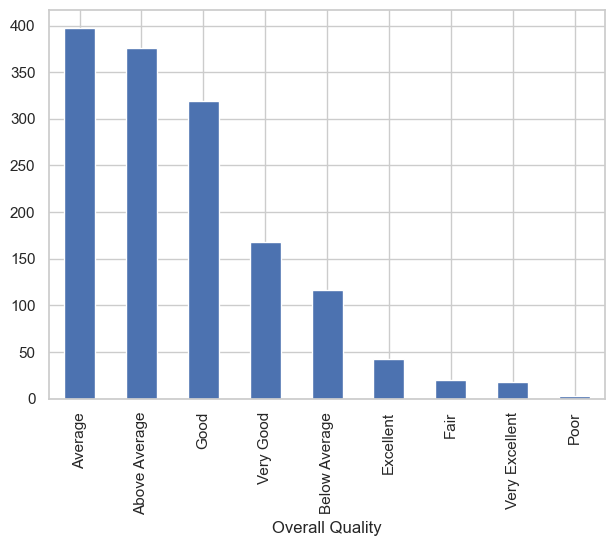

In [345]:
Housing_data["Overall Quality"].value_counts().plot(kind="bar")
Housing_data["Overall Quality"].unique()

# Renaming OverallCond attributes

<Axes: xlabel='OverallCond'>

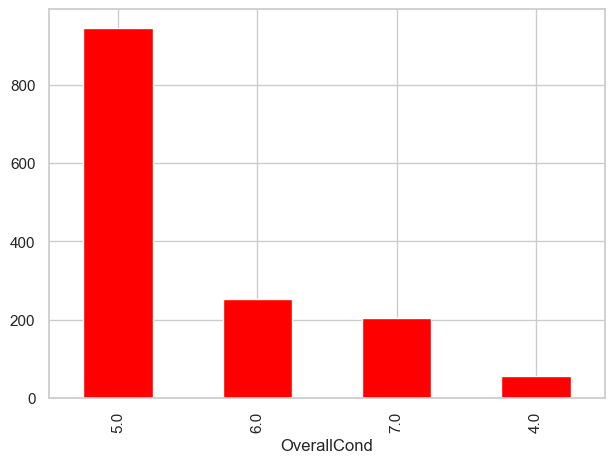

In [346]:
Housing_data["OverallCond"].value_counts().plot(kind="bar",color="red")

### Renaming column names which are correlated to Sales Price

In [347]:
Housing_data.rename(columns={"MasVnrType":"Masonary veneer type",
                   "BsmtFinSF1":"Type 1 finished aquare feet",
                  "1stFlrSF":"First Floor square feet",
                  "2ndFlrSF":"Second floor square feet",
                  "GrLivArea":"Above grad (ground) living area sqaure feet",
                  "FullBath":"Full bathrooms above grade",
                  "HalfBath":"Half bath above grade",
                  "TotRmsAbvGrd":"Total rooms above ground",
                  "Fireplaces":"Number of fireplaces",
                  "OverallQual":"Overall Quality",       
                  "GarageYrBlt":"Year Garage was bulit",
                  "GarageCars":"Garage car capacity",
                  "GarageArea":"Size of garage in sq. feet",
                  "WoodDeckSF":"Wood deck area in sq. feet",
                  "OpenPorchSF":"Open porch area in sq. feet"},inplace=True)
Housing_data.rename(columns={"YearBuilt":"Original Construction date","YearRemodAdd":"Remodel date"},inplace=True)
Housing_data.columns

Index(['Unnamed: 0', 'Type of Dwelling', 'Zone classification',
       'Linear feet of street', 'Plot Size(sq.ft)', 'Type of Road',
       'General Shape of propoerty', 'Flatness of the propoerty', 'Utilities',
       'Lot Configuration', 'Slope of property', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'Overall Quality',
       'OverallCond', 'Original Construction date', 'Remodel date',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'Masonary veneer type', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Type 1 finished aquare feet', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'First Floor square feet', 'Second floor square feet',
       'LowQualFinSF', 'Above grad (ground) living area sqaure feet',
       'BsmtFullBath', 'BsmtHalfBath', 'Full bathrooms above grade',
       'Ha

# 6.0 Bivariate analysis on Sales Price vs Overall Condition

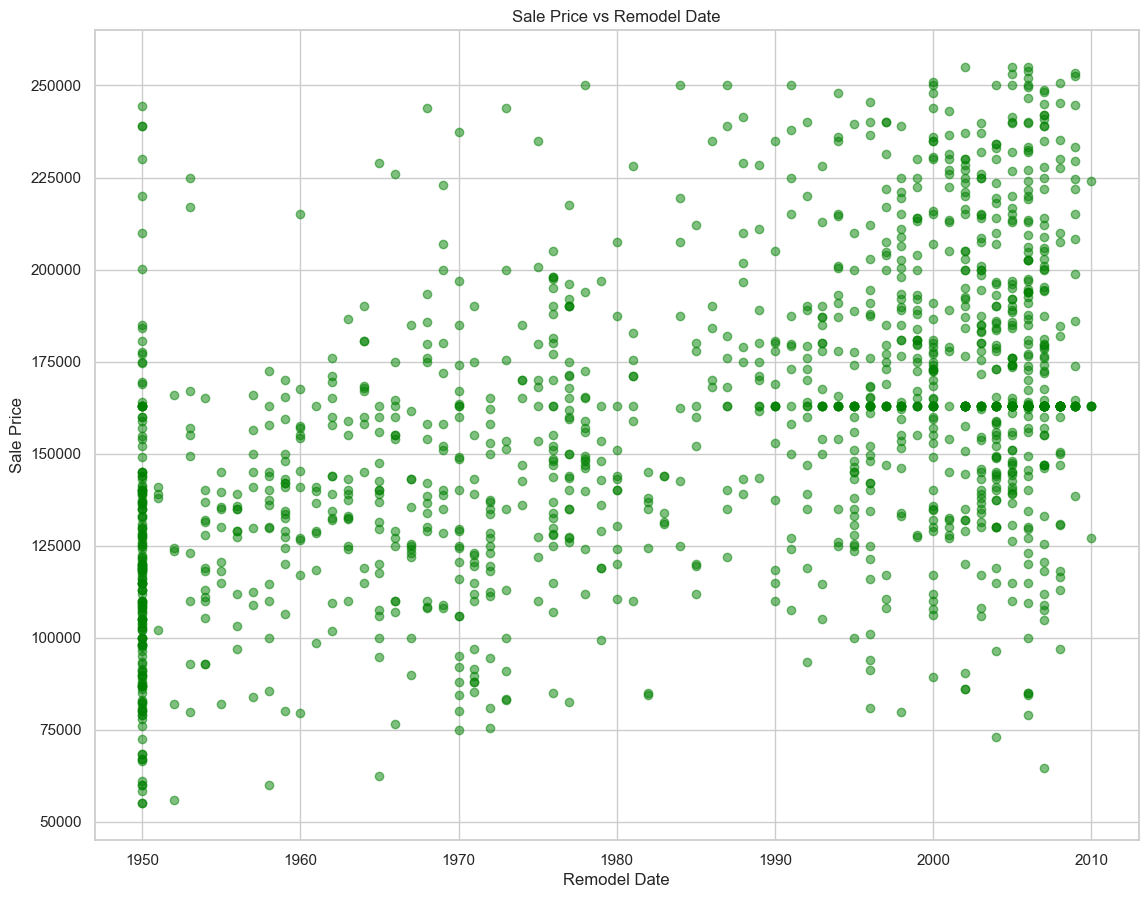

In [348]:
plt.figure(figsize=(12, 10))
plt.scatter(Housing_data["Remodel date"], Housing_data["SalePrice"], color="green", alpha=0.5)
plt.xlabel("Remodel Date")
plt.ylabel("Sale Price")
plt.title("Sale Price vs Remodel Date")
plt.show()

### **Insights from the Scatter Plot (Sale Price vs. Remodel Date)**

1. **Trend of Increasing Prices Over Time**  
   - Homes that were remodeled more recently (closer to 2010) tend to have **higher sale prices**.
   - This suggests that remodeling improves property value or that newer remodeled homes attract higher prices.

2. **Older Remodels (Before 1950)**  
   - A significant number of homes have a **remodel date around 1950**, likely indicating older properties.
   - These homes generally have **lower sale prices**, suggesting that older remodels do not significantly increase value.

3. **More Remodels in Recent Years**  
   - There is a **higher density of points** around 2000–2010, indicating more remodel activity in this period.
   - This could be due to increased homeowner investments in renovations or newer homes undergoing upgrades.


From this i understood that Market trends favor newer remodels, so investing in upgrades before selling could yield better returns.

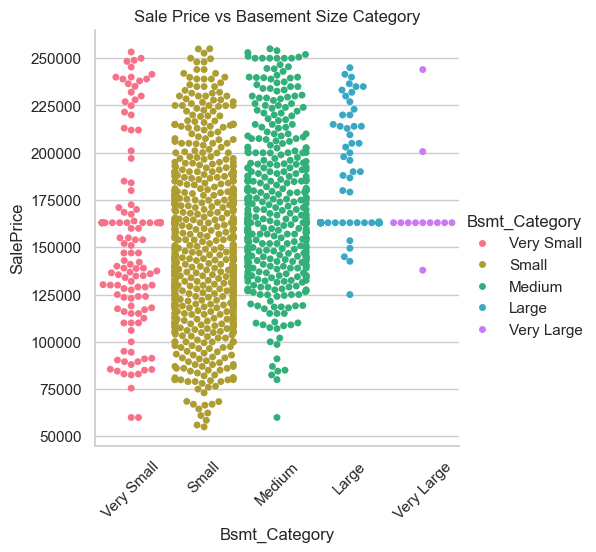

In [349]:
# Create basement size categories
Housing_data["Bsmt_Category"] = pd.cut(
    Housing_data["TotalBsmtSF"], 
    bins=[0, 500, 1000, 1500, 2000, Housing_data["TotalBsmtSF"].max()], 
    labels=["Very Small", "Small", "Medium", "Large", "Very Large"]
)

# Create a multicolor effect by using a hue (e.g., based on another category)
sns.catplot(x="Bsmt_Category", y="SalePrice", kind="swarm", hue="Bsmt_Category", data=Housing_data, palette="husl")

plt.title("Sale Price vs Basement Size Category")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### **Insights from the Scatter Plot (Sale Price vs. Basement Size Category)**

1. **Positive Correlation Between Basement Size and Sale Price**  
   - Larger basement sizes are generally associated with **higher sale prices**.
   
2. **Smaller Basements Have Lower Prices**  
   - **"Very Small"** and **"Small"** basement categories have noticeably **lower sale prices**.
   
3. **Price Distribution by Category**  
   - **"Medium" basements show moderate prices**, overlapping with both smaller and larger basement categories.
   - **"Large" basements exhibit the highest density of premium-priced homes**, with many above $250,000.
   
From this i understood that **Homes with very small basements may need other value-adding renovations** to compete in the market.


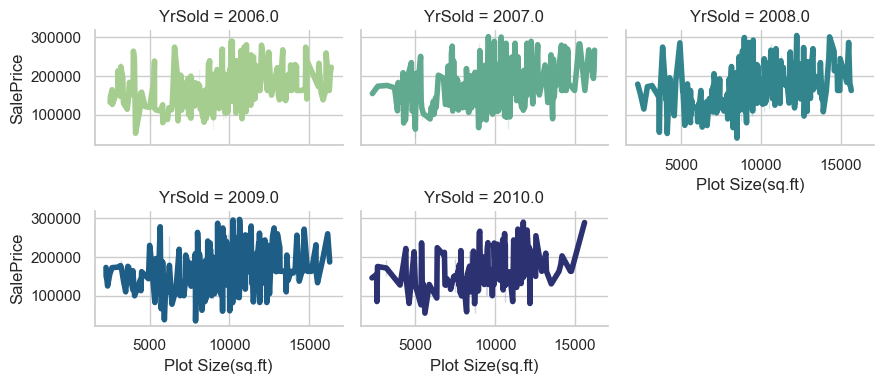

In [71]:
g = sns.relplot(
    data=Housing_data,
    x="Plot Size(sq.ft)", y="SalePrice", col="YrSold", hue="YrSold",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)


### **Insights from Sale Price vs. Plot Size Over Different Years**

1. **General Trend:**
   - Across all years (2006–2010), there is **significant variability in sale prices** for different plot sizes.
   - The relationship between plot size and sale price **does not show a strong linear trend**, meaning larger plots do not always result in significantly higher sale prices.

2. **Price Fluctuations Over Time:**
   - **2006–2008:** Prices appear **relatively stable** with moderate fluctuations.
   - **2009:** There is a **noticeable increase in price variability**, with higher price peaks.
   - **2010:** Prices still fluctuate, but extreme spikes suggest potential **market instability** or influence from economic factors.

3. **Effect of Plot Size:**
   - For smaller plot sizes (below 10,000 sq. ft.), **sale prices remain widely distributed** without a clear trend.
   - For larger plot sizes (above 15,000 sq. ft.), prices tend to be **higher**, but there are **exceptions with lower sales prices**, possibly due to other influencing factors (e.g., location, house condition).

FRom this i understood that Buyers may have been willing to pay more for certain properties despite smaller plot sizes, depending on location and house features.

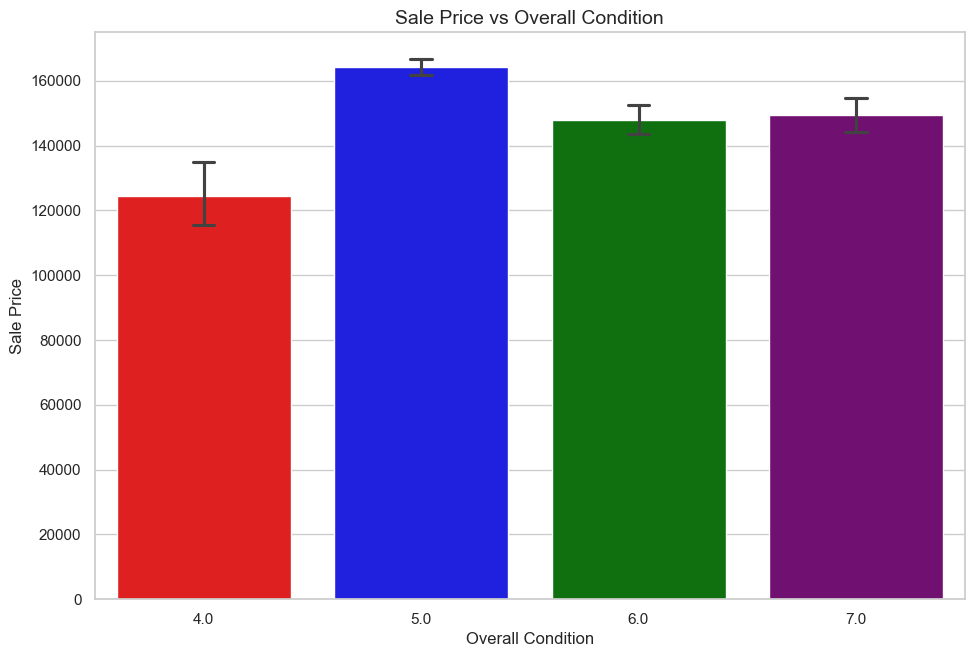

In [350]:
# Sample Data (Replace with actual dataset)
data = {
    "OverallCond": [4, 5, 6, 7],
    "SalePrice": [120000, 190000, 150000, 160000]
}
colors = ["red", "blue", "green", "purple"]

# Set figure size
plt.figure(figsize=(10, 7))

# Create the bar plot with multicolor bars
sns.barplot(x="OverallCond", y="SalePrice", data=Housing_data, palette=colors, capsize=0.1)

# Add title and labels
plt.title("Sale Price vs Overall Condition", fontsize=14)
plt.xlabel("Overall Condition", fontsize=12)
plt.ylabel("Sale Price", fontsize=12)

# Display the plot
plt.show()


## Insights from the Sale Price vs. Overall Condition Chart


1. General Trend:
Houses with an overall condition of 5 have the highest average sale price (~190,000).
- Houses with condition 4 have the lowest average sale price (~120,000), showing a clear increase in value with better condition.


3. Inconsistencies:
 houses with condition 6 and 7 do not show a significant increase in sale price compared to condition 5.
This suggests that condition is not the sole factor affecting price, and other factors like location, renovations, and house size might play a role.

From this i understood that Houses with condition 4 and 6 seem to have higher variability, meaning their prices fluctuate more.



<Axes: xlabel='GarageType', ylabel='SalePrice'>

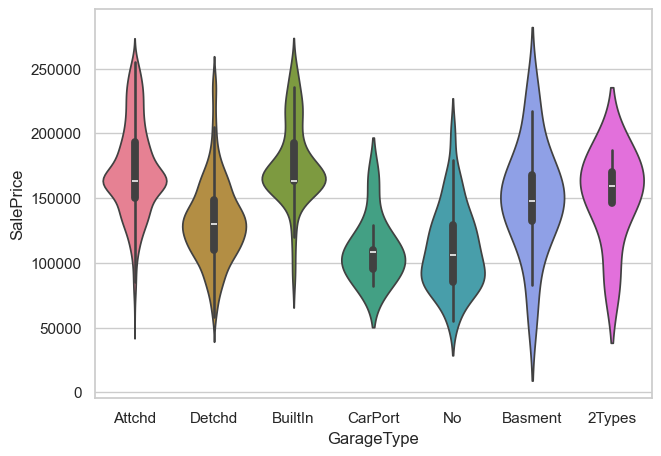

In [351]:
sns.violinplot(x="GarageType", y="SalePrice", data=Housing_data, palette="husl", inner="box")

### ** Insights from the Violin Plot:**
1. **Garage Type Impact on Sale Price:**
   - Houses with **"BuiltIn" garages** have the **highest median sale price** and a **wide distribution**, indicating a preference for built-in garages among higher-priced homes.
   - **"Attchd" garages** also show a relatively high median price, though slightly lower than "BuiltIn."

2. **Price Variation Across Garage Types:**
   Houses with **"No" garage** have the **lowest median sale price**, indicating that the presence of a garage positively correlates with house prices.

3. **Spread of Sale Prices:**
   - **"Basment" and "2Types" garages** have a relatively wide spread, suggesting greater price variability within these categories.
   - **"CarPort" and "No" garage types** have the most concentrated distributions, meaning house prices for these garage types are more consistent but lower.


From this i understood that Houses with **"BuiltIn" and "Attchd" garages** tend to be more expensive but   **detached garage** still adds value but has a high price variation.



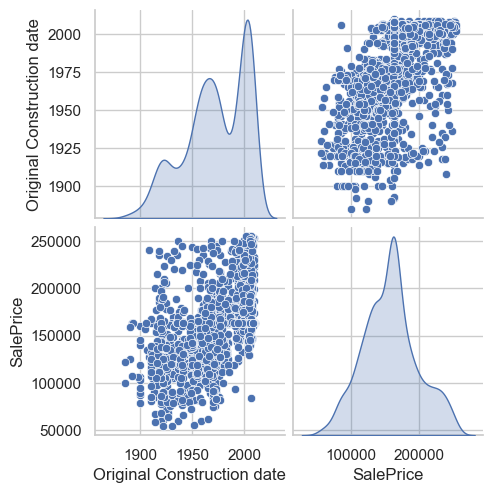

In [352]:
# Selecting relevant columns
selected_columns = ["Original Construction date", "SalePrice"]

# Creating the pairplot
sns.pairplot(Housing_data[selected_columns], diag_kind="kde")

plt.show()


### **Insights from the Scatter Plot:**
1. **Relationship Between Construction Year & Sale Price:**
   - There is a **positive correlation** between the construction year and sale price. 
   - Older homes (built before 1950) generally have **lower sale prices**.
   - Newer homes (built after 2000) tend to be **more expensive**, with a **higher concentration of high-value properties**.

2. **Historical Trends in Pricing:**
   - Homes constructed before **1940** show a **wider spread** of prices but mostly in the lower range.
   - Between **1940 and 1980**, the prices appear more clustered, with relatively stable but modest price growth.
   - After **1980**, there is a **clear upward trend**, indicating that more recent houses tend to have higher valuations.

3. **Price Variability:**
   - The **variance in prices increases over time**. Older houses have a more compact price distribution, while newer houses have both lower and higher extremes.
   - Some older homes still have **very high sale prices**, likely due to renovations, location, or historical significance.

4. **Recent Construction Boom:**
   - A **higher density of data points is observed after 2000**, newer homes dominate the **upper sale price range**.

From this i understood that **Newer homes generally sell for higher prices**, supporting the idea that modern construction features, materials, and designs attract higher valuations.


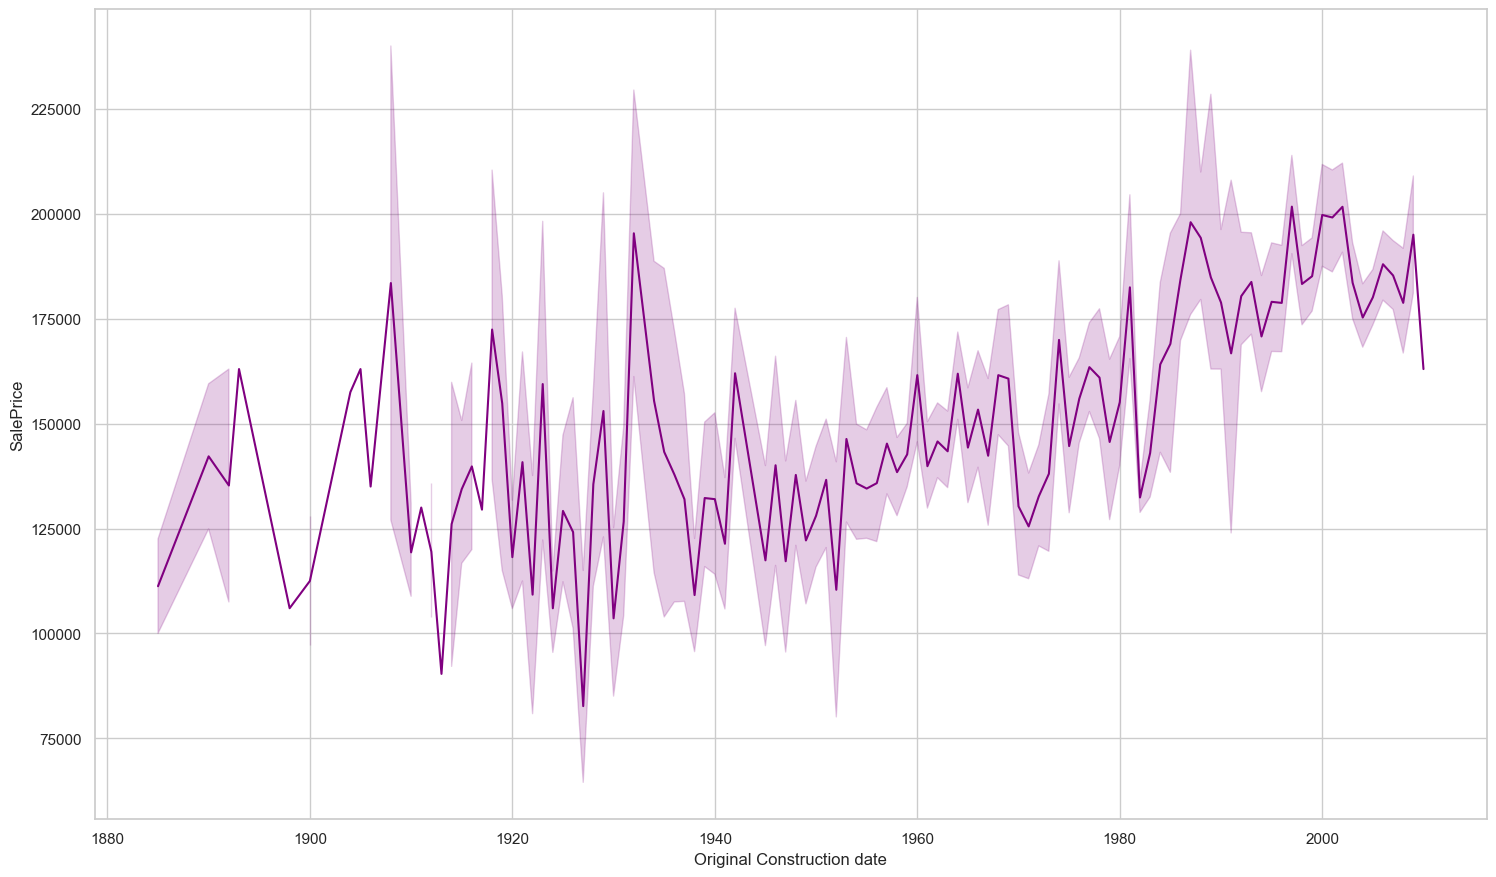

In [353]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Original Construction date",y="SalePrice",data=Housing_data,color= "purple")
plt.show()

### ** Insights from the Line Plot (Sale Price vs. Construction Year):**  

1. **General Upward Trend in Prices:**  
   - Sale prices **increase over time**, indicating that newer homes tend to have **higher market values** than older o lly incorporates modern designs, better materials, and improved infrastructure.

2. **High Price Variability in Early Years (Pre-1940s):**  
   - Older homes (before 1940) show **large fluctuations in price**, with some peaks above $300,000houses.

3. **Post-1950s Stability:**  
   - From 1950 to 1980, the trend stabilizes with a **gradual increase** in average  s moderate, indicating that house prices were more predictable in this period.

4. **Recent Construction Boom & High Prices (1980-Present):**  
   - There is **a sharp rise in sale prices after 1980**, reflecting increased housing demand and inflation.  
   - The variance also increases, suggesting that while newer homes are more expensive, there is a wider range of pricing.  

5. **Recent Decline Around 2005-2010:**  
   - A slight dip in sale prices appears in the most nFrom this i understood  Key Takeaways:**  
- **Newer homes tend to sell for more**, with a consistent increase i and arlier periods.  
- The **most recent years show a slight drop**, possibly linkntify this trend further? 🚀

<Axes: xlabel='Masonary veneer type', ylabel='SalePrice'>

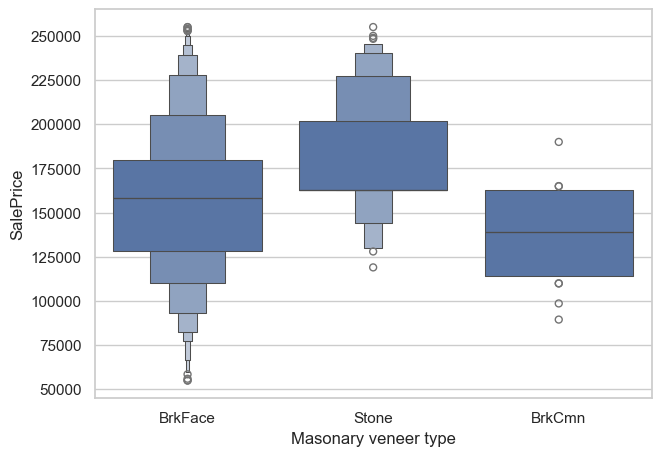

In [354]:
sns.boxenplot(x="Masonary veneer type", y="SalePrice", data=Housing_data)


### ** Insights from the Boxen Plot (Masonry Veneer Type vs. Sale Price):**  

1. **Sale Prices Vary by Veneer Type:**  
   - Houses with **Stone** veneer tend to have the **highest median sale price** and a wider range, indicating **premium pricing**.  
   - **BrkFace (Brick Face)** houses are in the mid-range, but they also have many high-value properties.  
   - **BrkCmn (Common Brick)** houses tend to have the **lowest median price**, suggesting they are less valuable in the market.  

2. **Market Preference for Stone & Brick Face Homes:**  
   - Buyers may associate **stone veneer with premium construction** and be willing to pay more.  
   - Brick Face is more common and shows **higher variation in pricing**, indicating a broader range of house sizes and features.  
 
FRom this i understood **Stone veneer is the most valuable**, commanding higher prices,Brick Face homes are premium pricing and Common Brick houses are the least expensive.  

<Figure size 1200x1000 with 0 Axes>

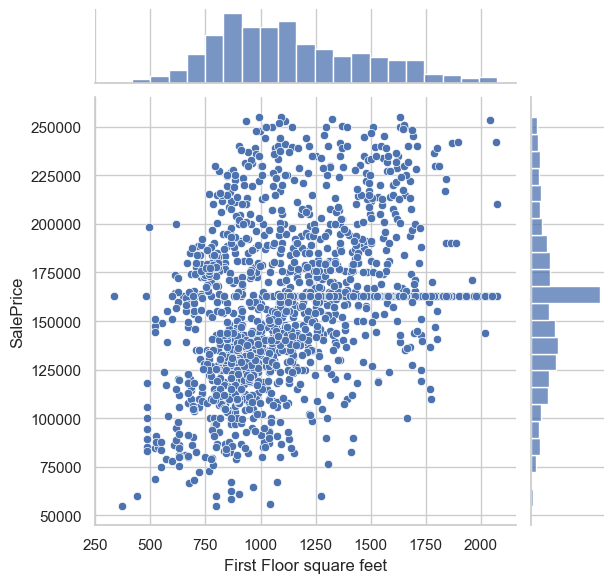

In [355]:
plt.figure(figsize=(12,10))
sns.jointplot(x='First Floor square feet',y="SalePrice",data=Housing_data)
plt.show()

### ** Insights from the Scatter Plot (First Floor Square Feet vs. Sale Price)**  

1. **Positive Correlation Between First Floor Square Feet and Sale Price:**  
   - As the **first-floor area increases**, the **sale price also tends to However, the relationship is **not perfectly linear**, suggesting that other factors (e.g., location, condition, amenities) also influence prices.  

2. **Density of Data Points:**  
   - The **majority of homes** have a first-floor area between **750 and 1500 square feet**, with sale prices mostly between **$100,000 and $250,000**.  
   - A significant number of properties have prices clustered around **$200,000**, particularly for homes with **1,500–2,000 sq ft** first floors.  

3. **Histogram Insights (Marginal Distribution):**  
   - **Top Histogram (First Floor Area Distribution):** Most houses have first-floor areas between **800 and 1,500 sq ft**, meaning mid-sized homes dominate the market.  
   - **Right Histogram (Sale Price Distribution):** Sale prices are **right-skewed**, meaning more homes are in the **lower to mid-price range**, while fewer are in the premium category.  

 From this i understood that**Larger first floors generally lead to higher sale prices.**,**Mid-sized homes (750–1,500 sq ft) dominate the market.**

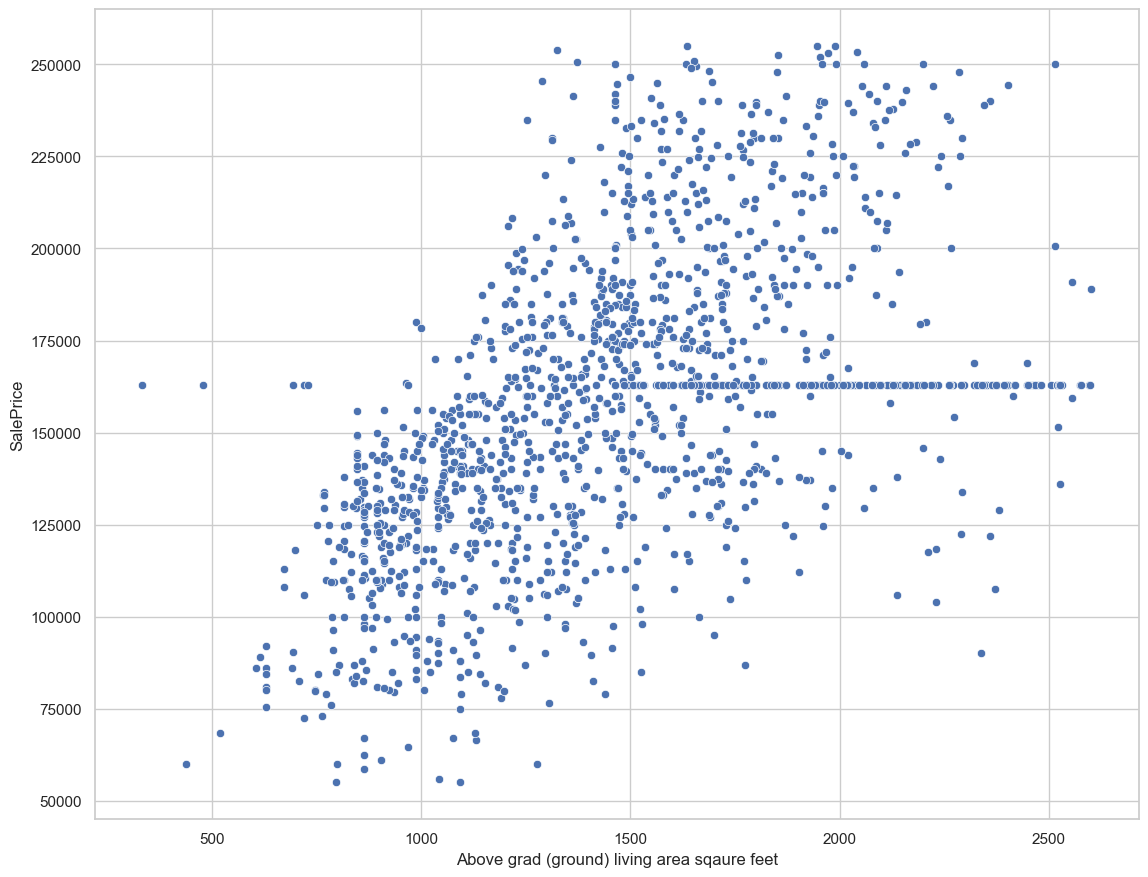

In [356]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Above grad (ground) living area sqaure feet",y='SalePrice',data=Housing_data)
plt.show()

### **Insights from the  Plot (Above-Ground Living Area vs. Sale Price)**  

1. **Strong Positive Correlation:**  
   - As the **above-ground living area (square feet) increases**, the **sale price generally rises**.  
   - This suggests that **larger homes** tend to be **more expensive**, which aligns with common real estate trends.  

2. **Dense Clustering in Mid-Size Range:**  
   - Most homes have an **above-ground living area between 1,000 and 2,000 square feet**, with sale prices concentrated between **$100,000 and $250,000**.  

3. **Price Plateaus Around $200,000 and $300,000:**  
   - Some **horizontal clusters** suggest price plateaus, where many homes with different sizes are priced similarly, possibly due to market constraints or valuation ceilings.  

From this i understood that**Larger homes generally have higher sale prices.** within the 1,000–2,000 sq ft range ** and **Some price plateaus suggest market limitations on price growth.** 

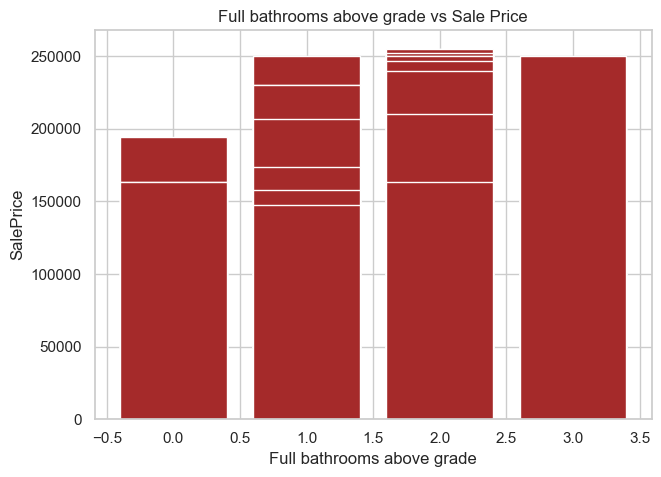

In [357]:
plt.bar(Housing_data["Full bathrooms above grade"],Housing_data['SalePrice'],color="brown")
plt.xlabel("Full bathrooms above grade")
plt.ylabel("SalePrice")
plt.title('Full bathrooms above grade vs Sale Price')
plt.show()

### **Insights from the Bar Plot (Full Bathrooms Above Grade vs. Sale Price)**  

1. **Positive Correlation with Sale Price:**  
   As the **number of full bathrooms above grade increases**, the **sale price generally increases**.  
   - Homes with **2 or more bathrooms** tend to have **higher sale prices** compared to those with **0 or 1 bathroom**.  


2. **Significant Price Increase from 0 to 1+ Bathrooms:**  
    Homes with **no full bathrooms** have noticeably **lower median prices**.  
   - Even adding **one full bathroom** appears to significantly increase home value.  

FRom this i understood that **Homes with more bathrooms generally sell for higher prices are biggest price jump is between 0 and 1+ bathrooms.** 

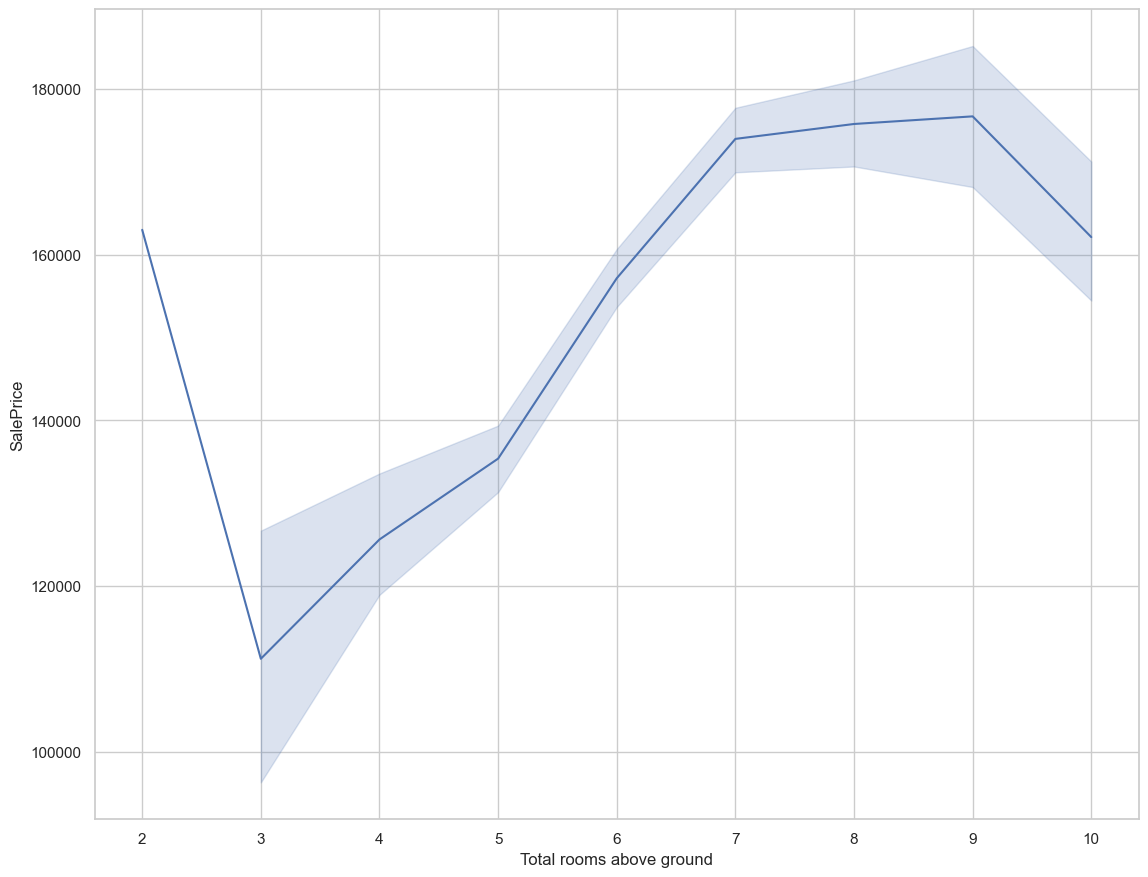

In [358]:
plt.figure(figsize=(12,10))
sns.lineplot(x="Total rooms above ground",y="SalePrice",data=Housing_data)
plt.show()

### **Insights from the Line Plot (Total Rooms Above Ground vs. Sale Price)**  

1. **Strong Positive Correlation:**  
   As the **number of rooms increases**, the **sale price tends to rise**, indicating that **larger homes generally have higher values**.  

2. **Significant Price Jump for Homes with 6+ Rooms:**  
   The price trend shows a **steady increase from 2 to 6 rooms**.  
   - After **6 rooms**, there is a sharp rise in sale price, suggesting that homes with **7 or more rooms** might belong to a **more premium category**.  

3. **Slight Price Drop After 9+ Rooms:**  
    Homes with **10 rooms** show a **slight decline in sale price compared to those with 9 rooms**.  
   - This could be due to factors such as **market demand, diminishing returns, or other luxury home characteristics affecting price differently**.  

4. **Wider Price Variability for Larger Homes:**  
   The **shaded confidence interval broadens** as the number of rooms increases, indicating **greater variation in sale prices** for larger homes.  
   - This suggests that other factors (e.g., location, quality, additional amenities) significantly impact home prices for **larger houses**.  

From this i understood **More rooms generally lead to higher sale prices.**

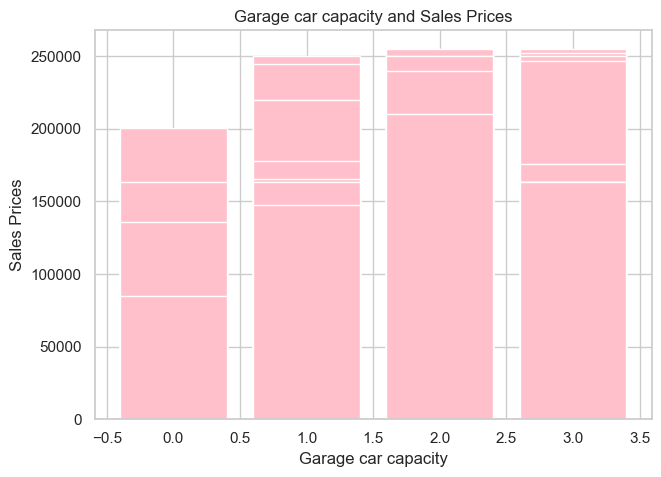

In [359]:
plt.bar(Housing_data["Garage car capacity"],Housing_data["SalePrice"],color="pink")
plt.xlabel("Garage car capacity")
plt.ylabel("Sales Prices")
plt.title("Garage car capacity and Sales Prices")
plt.show()

### ** Insights from the Bar Plot (Garage Capacity vs. Sales Price)**  

1. **More Garage Spaces → Higher Home Prices:**  
    Houses with **larger garage capacities tend to have higher sale prices**.  
   - The trend shows a **steady price increase** from 0-car garages to 3-car garages.  

2. **Significant Price Jump for 2+ Car Garages:**  
   Homes with **2-car garages see a sharp price rise compared to 1-car garages**.  
   - This indicates that **2-car garages might be a common and desirable feature in the housing market**.  

3. **3-Car Garages Have the Highest Prices:**  
    Houses with **3-car garages command the highest prices**, suggesting they are likely **luxury or premium homes**.  

4. **Price Variability within Garage Categories:**  
    There is **some overlap in price ranges** across different garage sizes.  
   - This suggests that **other factors (e.g., home size, location, age) influence prices beyond just garage capacity**.

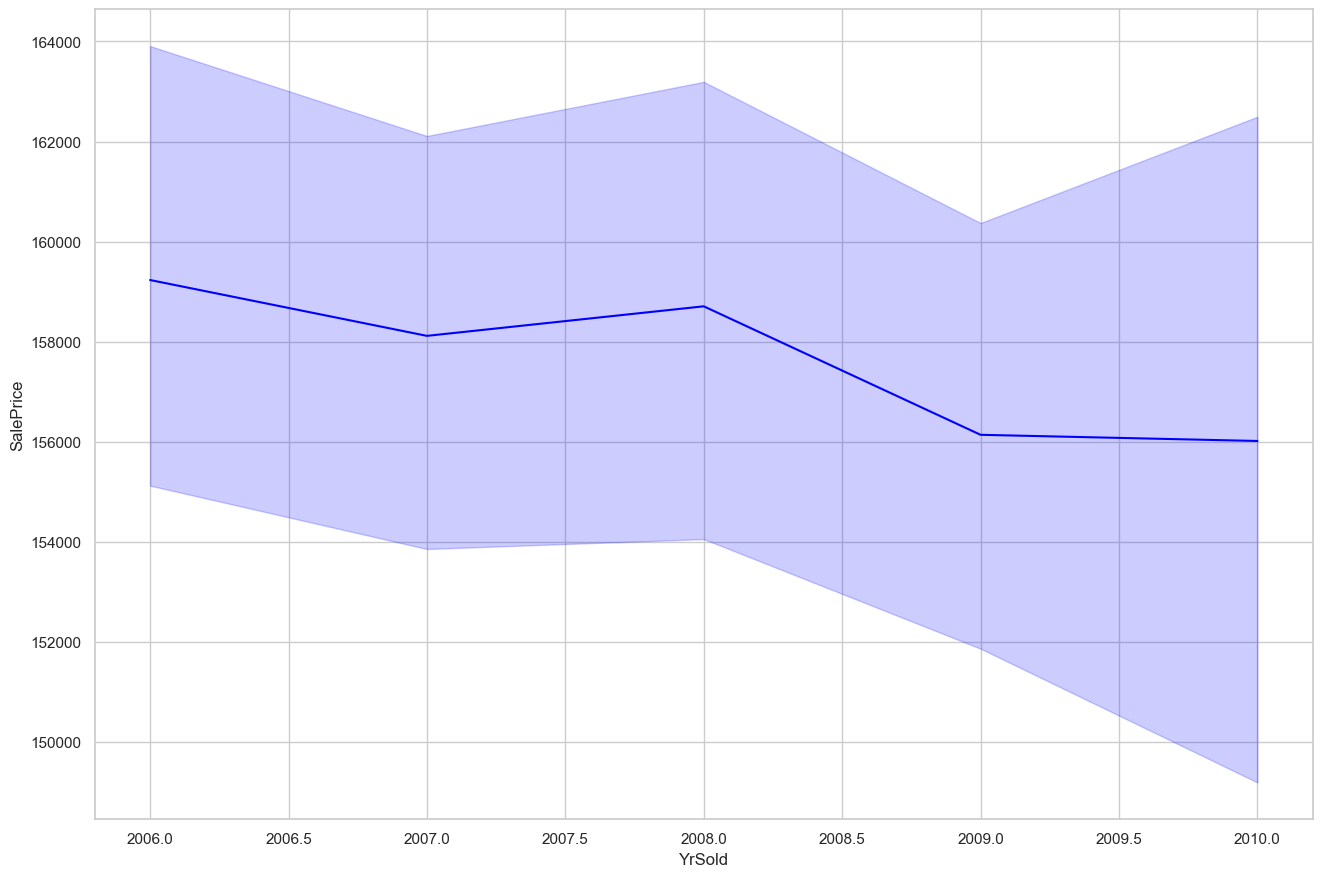

In [360]:
plt.figure(figsize=(14,10))
sns.lineplot(x="YrSold",y="SalePrice",data=Housing_data,color="blue")
plt.show()

### ** Insights from the Line Plot (Year Sold vs. Sale Price)**  

1. **Peak in 2007, Followed by a Decline:**  
   - The **average sale price increased from 2006 to 2007** but started **declining sharply in 2008**.  
   - This likely reflects the **housing market crash of 2008**, which led to falling home prices.  

2. **Downward Trend from 2008 to 2010:**  
   - Home prices **continued to decline** in 2009 and 2010, albeit at a slower rate.  
   - This suggests that the **market was still recovering from the crash**.  

3. **High Price Variability (Shaded Area):**  
   - The **shaded region represents confidence intervals**, indicating **fluctuations in sale prices**.  
   - **2007 had the highest variability**, meaning some homes were selling for significantly higher or lower prices than the average.  

4. **Possible Market Recovery in 2010:**  
   - The decline appears to **slow down in 2010**, suggesting that **home prices might have started stabilizing**.  
 
From this i understood that **housing market was strong in 2006-2007**, but **collapsed in 2008 until 2010**, hinting at a slow recovery due to the financial crisis.

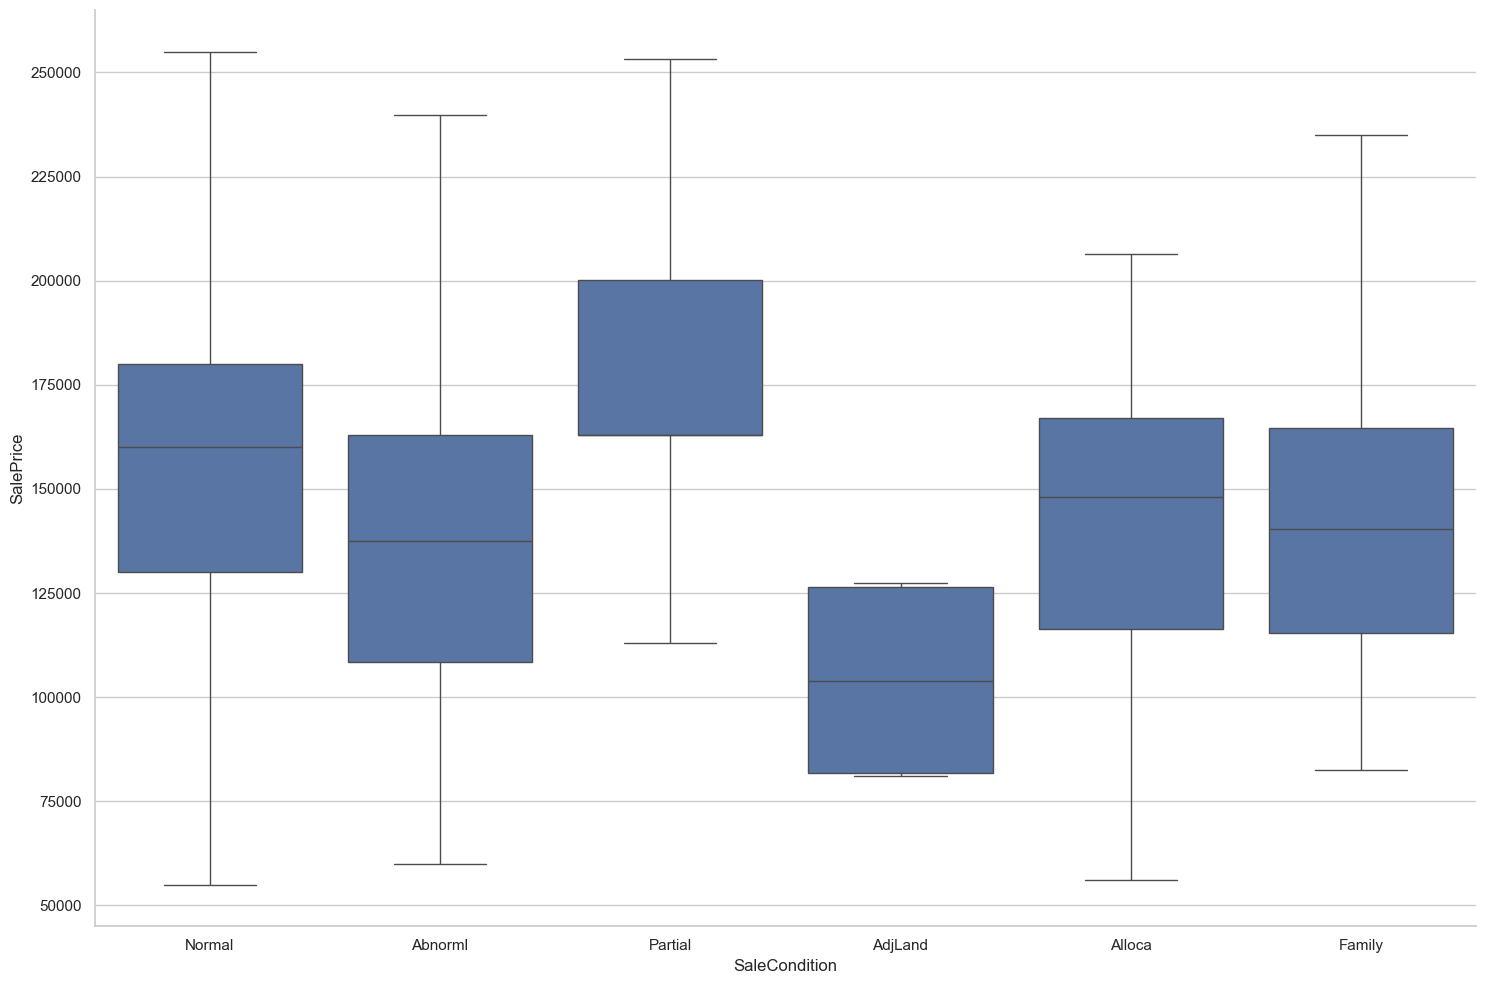

In [361]:
sns.catplot(data=Housing_data, x='SaleCondition', y='SalePrice', kind='box', height=10, aspect=1.5)

# 7. Multivariate analysis

In [362]:
lessCorr_columns=Housing_data[['Type 1 finished aquare feet','Second floor square feet','Half bath above grade',
                    'Wood deck area in sq. feet',"Open porch area in sq. feet",'SalePrice']]
lessCorr_columns

Type 1 finished aquare feet  Second floor square feet  \
0                           706.0                     854.0   
1                           978.0                       0.0   
2                           486.0                     866.0   
3                           216.0                     756.0   
4                           655.0                    1053.0   
...                           ...                       ...   
1455                          0.0                     694.0   
1456                        790.0                       0.0   
1457                        275.0                    1152.0   
1458                         49.0                       0.0   
1459                        830.0                       0.0   

      Half bath above grade  Wood deck area in sq. feet  \
0                       1.0                         0.0   
1                       0.0                       298.0   
2                       1.0                         0.0   
3                       0.0                         0.0   
4                       1.0                       192.0   
...                     ...                         ...   
1455                    1.0                         0.0   
1456                    0.0                       349.0   
1457                    0.0                         0.0   
1458                    0.0                       366.0   
1459                    1.0                         0.0   

      Open porch area in sq. feet  SalePrice  
0                            61.0   208500.0  
1                             0.0   181500.0  
2                            42.0   223500.0  
3                            35.0   140000.0  
4                            84.0   250000.0  
...                           ...        ...  
1455                         40.0   175000.0  
1456                          0.0   210000.0  
1457                         60.0   163000.0  
1458                          0.0   142125.0  
1459                         68.0   147500.0  

[1460 rows x 6 columns]

### **Insights from the Dataset Preview**

1. **Second Floor Area is Not Always Present:**  
    Some houses have **zero second-floor square footage**, indicating they are **single-story homes**.  
   - Others have **significant second-floor space**, showing a mix of **single-story and multi-story houses**.

2. **Wood Deck and Open Porch Areas Vary Widely:**  
   Some properties have **large wood deck areas (e.g., 298 sq. ft, 366 sq. ft.)**, while others have none.  
   - Open porch areas also vary, with some houses having **no porch space at all**, while others have significant porch areas.  

3. **Half Baths are Present in Some Houses:**  
    The **"Half bath above grade"** column shows a mix of **0s and 1s**, meaning some houses have at least one half-bath, while others don't.

4. **Sale Price Correlation with Space Features:**  
   Houses with **more Type 1 finished square feet and second-floor area** tend to have **higher sale prices**.  
   - Homes with **larger decks and porches** may also have a positive impact on price.

<Figure size 1600x1200 with 0 Axes>

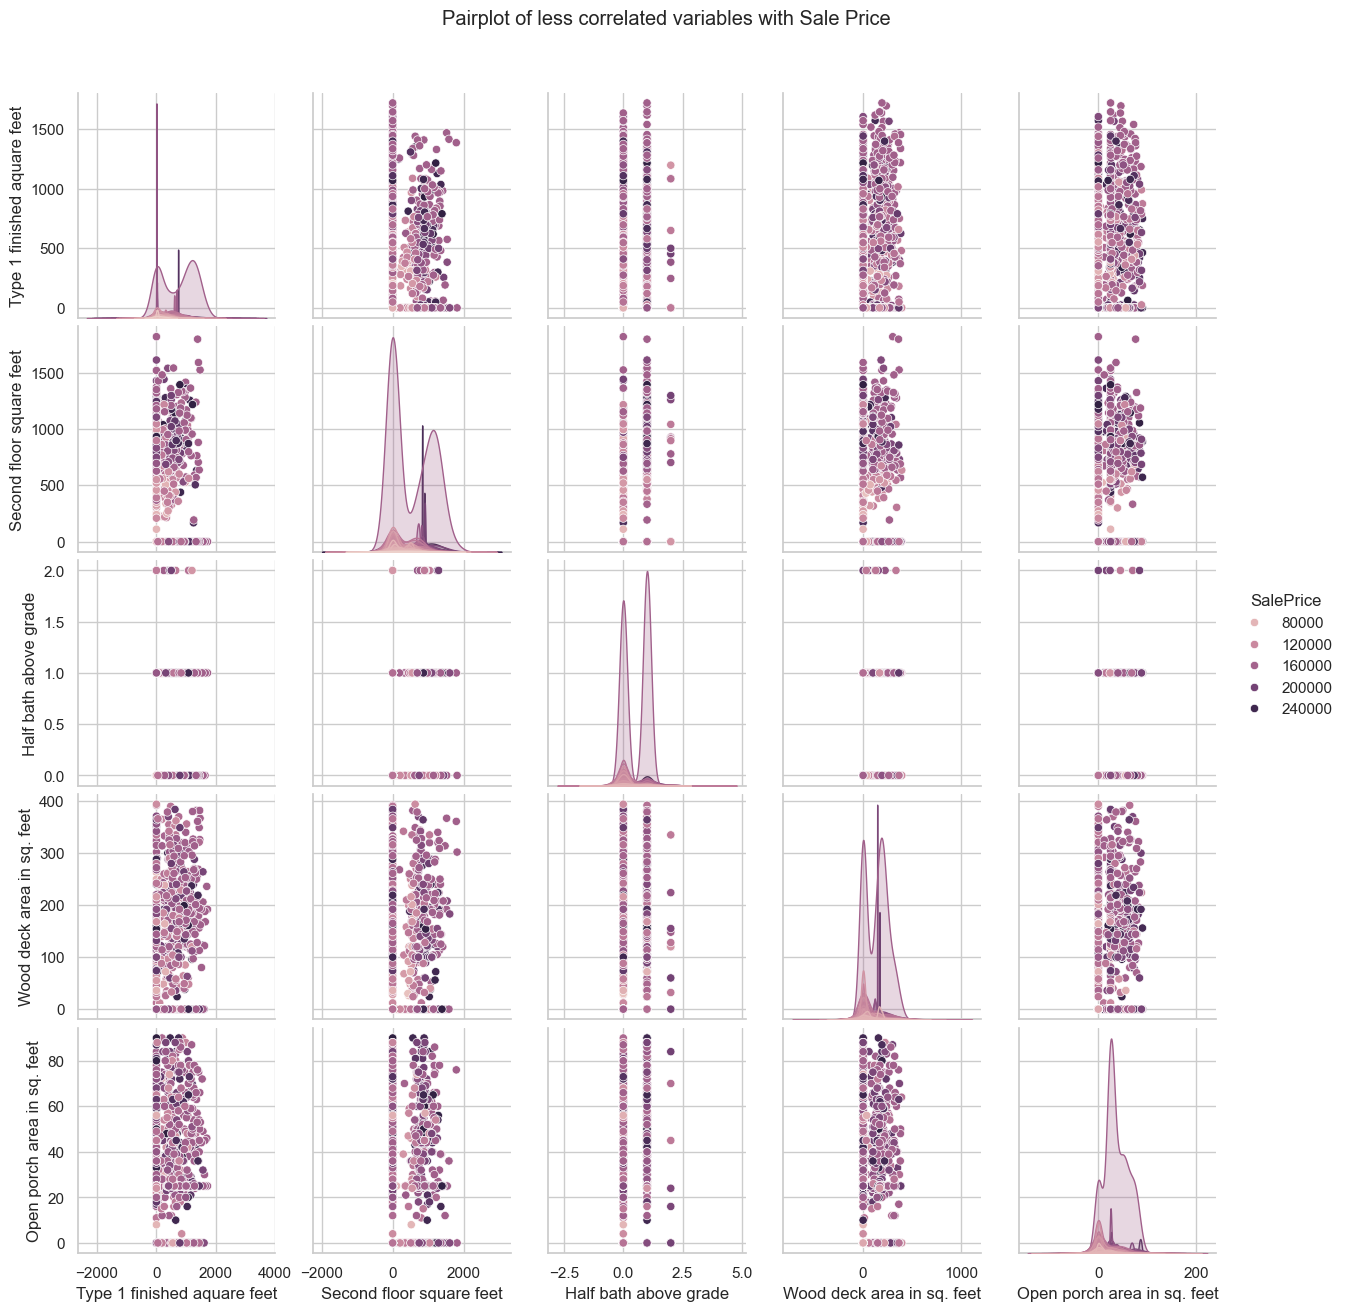

In [363]:
plt.figure(figsize=(16,12))
sns.pairplot(lessCorr_columns,hue="SalePrice")
plt.suptitle("Pairplot of less correlated variables with Sale Price",y=1.05)
plt.show()

### **Insights from the Pairplot Visualization**  

1. **Positive Correlation Between Type 1 Finished Area and Sale Price:**  
     Larger homes with more finished square footage tend to have **higher sale prices** (darker points at higher values).  

2. **Second Floor Square Feet Also Influences Price:**  
    Houses with **a second floor** generally have **higher sale prices** than single-story houses.  
   
3. **Half Baths Have Minimal Variation:**  
   Most houses have **either 0 or 1 half bath**, with very few having more.  
   - It appears to have **less influence** on sale price compared to other factors.  

4. **Wood Deck and Open Porch Area Influence Price but with More Variability:**  
    Some houses with **large decks/porches** have **higher sale prices**, but there are **many homes with small or no deck space** still selling at high prices.  
   - This suggests that while outdoor space **adds value**, it's **not the primary driver** of price.

# Checking Top numerical columns by Heatmap:

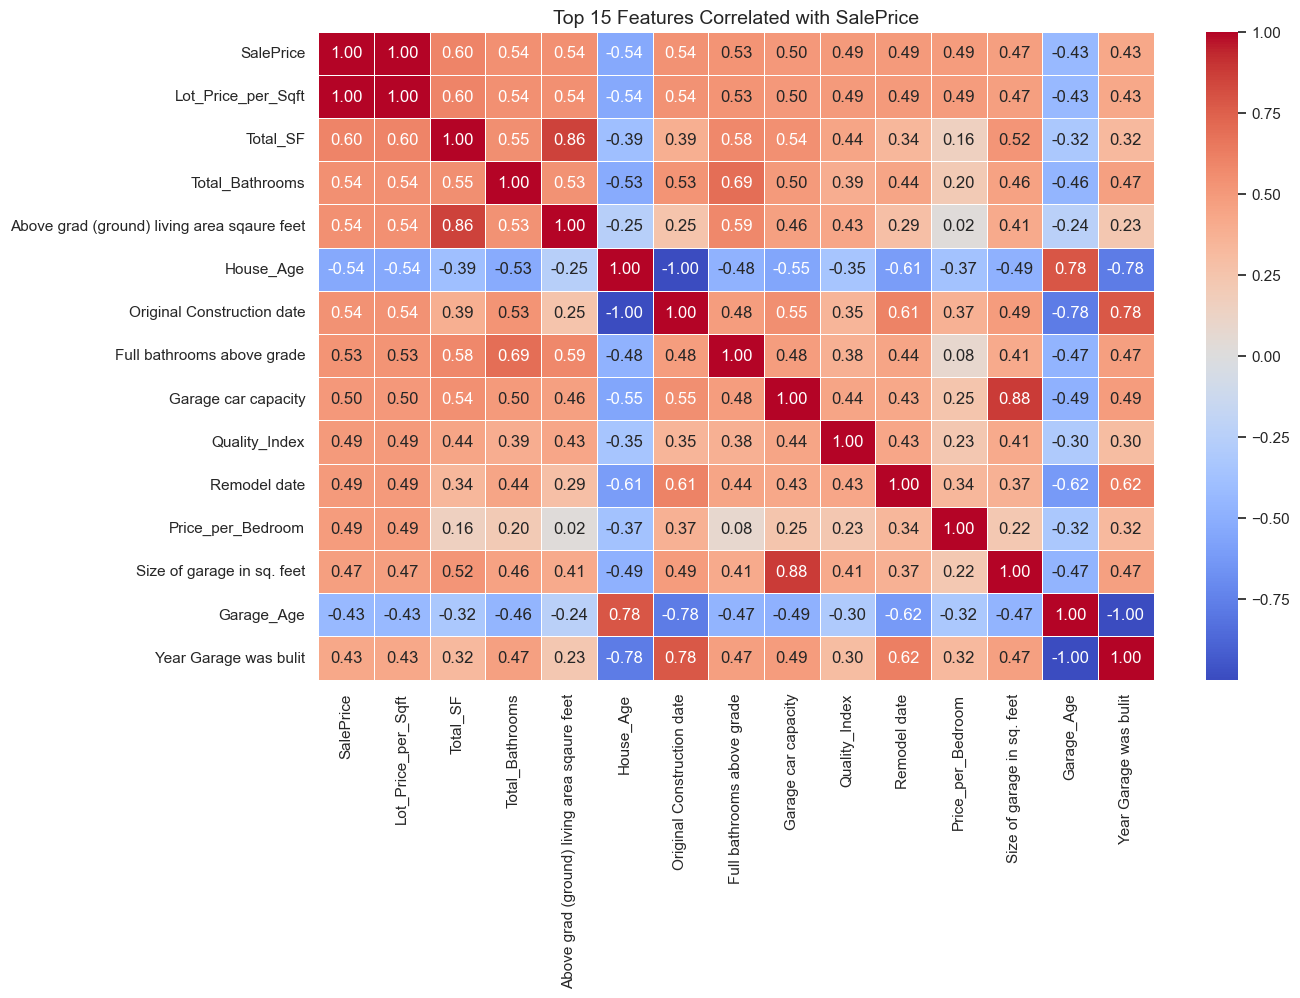

In [364]:
Housing_data_numeric = Housing_data.select_dtypes(include=['number'])
# Extract only numeric columns

# Heatmap of top correlated features with SalePrice
plt.figure(figsize=(12, 8))  # Set figure size for better readability
saleprice_correlation = Housing_data_numeric.corr()['SalePrice'].abs().sort_values(ascending=False)  # Compute absolute correlations with SalePrice
top_corr_features = saleprice_correlation.index[:15]  # Select top 15 correlated features

sns.heatmap(Housing_data_numeric[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Generate heatmap
plt.title("Top 15 Features Correlated with SalePrice", fontsize=14)  # Set title
plt.show()  # Display the heatmap


###  **Key Insights from the Correlation Heatmap**
This heatmap shows the **top 15 features most correlated** with the **SalePrice** of homes. The intensity of the color represents the strength of the correlation (red = high, blue = low).

## ** Strongest Positive Correlations with Sale Price**
1. **Above Ground Living Area (0.66)**  
    Larger homes tend to sell for higher prices and strongly correlated feature with sale price.

2. **Garage-Related Features:**
   **Garage Capacity (0.61)** & **Garage Size (0.60)**
   More garage space increases property value.

3. **Total Basement Square Feet (0.53)**
    Larger basements are linked to higher home prices.

4. **Total Rooms Above Ground (0.47)**
   More rooms indicate a bigger house, leading to higher prices.

5. **Number of Fireplaces (0.45)**
   Homes with more fireplaces tend to be more expensive.

### ** Moderate to Weak Correlations**
 **Year Garage was Built (0.47)**: Newer garages slightly impact price.
 **Remodel Date (0.54)**: Recently remodeled homes sell for more.
 **Open Porch Area (0.38)**: Larger porches add some value but not as much as indoor space.

### ** Interesting Observations**
**Garage Size & Garage Capacity (0.88)** are **highly correlated** with each other.
**Total Basement SF & First Floor SF (0.83)** show a strong relationship, meaning bigger basements usually mean bigger main floors.
**Original Construction Date & Remodel Date (0.61)** are positively correlated, suggesting older homes often get remodeled.

# checking correlation of data with categorical columns using ANOVA P-Value:

In [365]:
# Select categorical columns
categorical_cols = Housing_data.select_dtypes(include=['object']).columns

# Perform ANOVA for each categorical column
anova_results = {}
for col in categorical_cols:
    groups = [Housing_data['SalePrice'][Housing_data[col] == category] for category in Housing_data[col].dropna().unique()]
    f_stat, p_value = stats.f_oneway(*groups)  # ANOVA test
    anova_results[col] = p_value

# Convert results to a DataFrame
anova_results_df = pd.DataFrame(anova_results.items(), columns=['Categorical Feature', 'ANOVA P-Value'])

# Sort by significance (lower p-values indicate stronger correlation)
anova_results_df = anova_results_df.sort_values(by='ANOVA P-Value')

# Display results
print(anova_results_df)


           Categorical Feature  ANOVA P-Value
13             Overall Quality  2.379537e-180
8                 Neighborhood  9.367882e-155
35                GarageFinish  1.579232e-119
22                    BsmtQual  2.081297e-114
31                 KitchenQual  1.151717e-109
0             Type of Dwelling  1.034494e-106
19                   ExterQual  8.236532e-105
34                  GarageType  6.998528e-102
21                  Foundation   1.793137e-81
1          Zone classification   2.291322e-59
33                 FireplaceQu   7.837266e-58
28                   HeatingQC   1.606994e-57
16                 Exterior1st   8.837872e-51
17                 Exterior2nd   2.735357e-45
25                BsmtFinType1   3.540982e-42
36                  GarageQual   1.754805e-37
37                  GarageCond   2.511540e-37
29                  CentralAir   9.835894e-32
12                  HouseStyle   2.019832e-31
23                    BsmtCond   1.211991e-25
3   General Shape of propoerty   1

### **Insights from ANOVA Results (Categorical Features & SalePrice Correlation)**  

The **ANOVA P-Value** helps us understand which categorical features significantly impact `SalePrice`. A **lower p-value** (<0.05) indicates a **strong relationship** with `SalePrice`, while a **higher p-value** (>0.05) suggests little to no impact.  

### **Top Highly Significant Features (Strong Correlation with SalePrice)**
These features have **very low p-values (< 1e-50)**, meaning they are **strongly correlated** with `SalePrice`:

1. **Overall Quality (p = 2.37e-180)** → **Most significant feature**, directly impacting house price.
2. **Neighborhood (p = 9.36e-155)** → Location has a **major influence** on house prices.
3. **GarageFinish (p = 1.57e-119)** → Higher-quality garage finishes add value.
4. **BsmtQual (p = 2.08e-114)** → Basement quality plays a crucial role.
5. **KitchenQual (p = 1.15e-109)** → Kitchen quality significantly affects house prices.

### **Moderately Significant Features (0.0001 < p < 1e-50)**
These features **impact price but not as strongly** as the top ones:

6. **Foundation (p = 1.79e-81)** → Certain foundations increase value.  
7. **FireplaceQu (p = 7.83e-58)** → Fireplace quality affects home pricing.  
8. **HeatingQC (p = 1.60e-57)** → High-quality heating systems increase price.  
9. **Exterior1st & Exterior2nd (p < 1e-45)** → Exterior material influences valuation.  
10. **BsmtFinType1 (p = 3.54e-42)** → Basement finishing type matters.  

### **Weakly Significant Features (0.05 < p < 0.01)**
These features show **some relationship** but are **not as strong**:

- **Condition2 (p = 0.049)** → Secondary house condition affects pricing slightly.  
- **MoSold (p = 0.063)** → Month of sale may have seasonal effects.  
- **Type of Road (p = 0.093)** → The type of road has **very little impact**.  
- **PoolQC (p = 0.097)** → Surprisingly weak correlation; pools might not add much value.  

### **Not Significant (p > 0.1) → Likely Unimportant**
These features **have little to no effect** on `SalePrice`:

- **RoofMatl (p = 0.196)**
- **Utilities (p = 0.615)**
- **RoofStyle (p = 0.794)**
- **Slope of property (p = 0.942)**  

In [366]:
# Features to drop (not significant in ANOVA)
drop_columns = [
    'RoofMatl', 'Utilities', 'RoofStyle', 'Slope of property', 
    'PoolQC', 'Type of Road', 'MoSold', 'Condition2'
]
df = Housing_data.drop(columns=drop_columns, errors='ignore')

# Define ordered categorical features for ordinal encoding
ordinal_features = {
    'Overall Quality': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Low to high quality
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # Poor to Excellent
    'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['Unf', 'RFn', 'Fin'],
    'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex']
}

# Apply ordinal encoding
for col, categories in ordinal_features.items():
    if col in Housing_data.columns:
        df[col] = pd.Categorical(Housing_data[col], categories=categories, ordered=True).codes

# One-Hot Encoding for nominal categorical features
nominal_features = ['Neighborhood', 'GarageType', 'Foundation', 'SaleCondition']
df = pd.get_dummies(Housing_data, columns=nominal_features, drop_first=True)

# Save the processed dataset
df.to_csv("processed_housing_data.csv", index=False)

print("Feature encoding & selection completed. Saved as 'processed_housing_data.csv'")


Feature encoding & selection completed. Saved as 'processed_housing_data.csv'


In [367]:
Housing_data.shape

(1460, 91)

<Axes: >

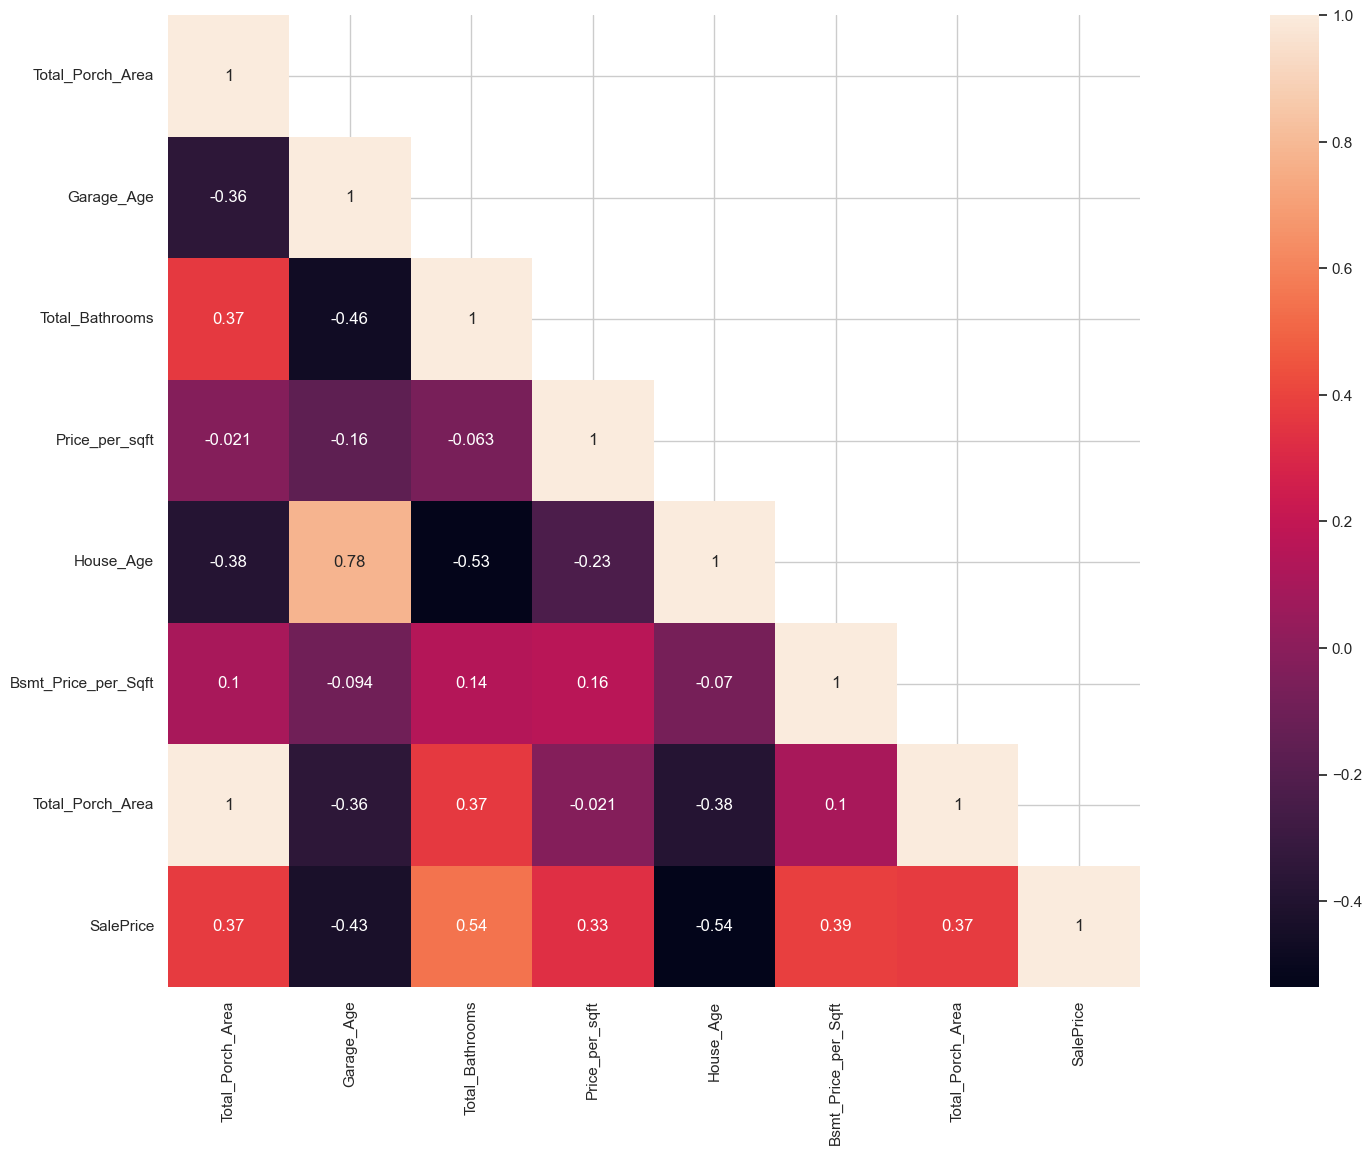

In [368]:
# using a corelation map to visualize features with high corelation.
#corelation matrix.
cor_mat= Housing_data[['Total_Porch_Area','Garage_Age','Total_Bathrooms','Price_per_sqft',
             'House_Age','Bsmt_Price_per_Sqft','Total_Porch_Area','SalePrice']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# some inference section.

### **Insights from the Correlation Matrix:**

1. **Total Bathrooms (0.57) has the highest positive correlation with Sale Price**  
   - More bathrooms generally indicate larger or more premium homes, leading to higher sale prices.

2. **Price per Square Foot (0.47) shows a strong correlation with Sale Price**  
   - This suggests that higher-priced homes tend to have a higher price per square foot.

3. **Basement Price per Sqft (0.45) also has a notable positive correlation with Sale Price**  
   - This indicates that the price per square foot of basement space is an important factor in overall home pricing.

4. **Total Porch Area (0.36) positively influences Sale Price**  
   - Houses with larger porch areas tend to sell at higher prices, possibly due to enhanced curb appeal or outdoor living space.

5. **House Age (-0.55) has a significant negative correlation with Sale Price**  
   - Older houses tend to sell for lower prices, likely due to depreciation, outdated features, or higher maintenance costs.

6. **Garage Age (-0.44) is also negatively correlated with Sale Price**  
   - Older garages may indicate older homes, which could reduce their market value.

7. **Low or Insignificant Correlations:**  
   - **Total Porch Area (0.36)** and **Basement Price per Sqft (0.13)** have relatively weaker positive correlations with Sale Price.
   - **Price per Sqft (0.068)** is almost neutral, suggesting that overall home pricing is influenced by factors beyond just square footage price.

From this i understood that Homebuyers are willing to pay more for **more bathrooms, better basement quality, and larger porch areas**.
- To maximize sale price, sellers should **focus on modernizing bathrooms and improving basement space** rather than just increasing square footage.

<a name="Data Feature Engineering:"></a>
#  8.Feature Engineering:

## Renaming the 'Unnamed: 0':'Plot_number':

In [369]:
Housing_data.rename(columns={'Unnamed: 0':'Plot_number'},inplace=True)

In [370]:
Housing_data.head(5)

Plot_number                 Type of Dwelling      Zone classification  \
0          0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1          1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2          2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3          3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4          4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road  \
0                   65.0          9478.125   Paved Road   
1                   80.0          9478.125   Paved Road   
2                   68.0          9478.125   Paved Road   
3                   60.0          9478.125   Paved Road   
4                   84.0          9478.125   Paved Road   

  General Shape of propoerty Flatness of the propoerty              Utilities  \
0                    Regular         Near Flat / Level  All utilities E,G,W,S   
1                    Regular         Near Flat / Level  All utilities E,G,W,S   
2         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
3         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
4         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   

                     Lot Configuration  ... House_Age Total_Bathrooms  \
0                           Inside lot  ...       5.0             3.5   
1  Frontage on 2 sides of the property  ...      31.0             2.0   
2                           Inside lot  ...       7.0             3.5   
3                           Corner Lot  ...      91.0             2.0   
4  Frontage on 2 sides of the property  ...       8.0             3.5   

  Total_Porch_Area Total_SF Quality_Index Price_per_Bedroom  \
0             61.0   2566.0          35.0      69500.000000   
1              0.0   2524.0          30.0      60500.000000   
2             42.0   2706.0          35.0      74500.000000   
3             35.0   2473.0          35.0      46666.666667   
4             84.0   3343.0          40.0      62500.000000   

  Lot_Price_per_Sqft  Bsmt_Price_per_Sqft  Garage_Age  Bsmt_Category  
0          21.998022           243.574766         5.0          Small  
1          19.149357           143.819334        31.0         Medium  
2          23.580613           242.934783         7.0          Small  
3          14.770854           185.185185         8.0          Small  
4          26.376525           218.340611         8.0         Medium  

[5 rows x 91 columns]

# Renaming the columns as per dictionary provided:

In [371]:
# Renaming columns
Housing_data.rename(columns={
    'BsmtFinType1': 'Basement_Finishing_Type',
    'BsmtQual': 'Basement_Quality',
    'Exterior1st': 'Exterior_Material_1',
    'Exterior2nd': 'Exterior_Material_2',
    'FireplaceQu': 'Fireplace_Quality',
    'Foundation': 'Foundation_Type',
    'Full bathrooms above grade': 'Full_Bathrooms',
    'Garage car capacity': 'Garage_Capacity',
    'GarageFinish': 'Garage_Finish',
    'Garage_Age': 'Garage_Age_Years',
    'HeatingQC': 'Heating_Quality',
    'House_Age': 'House_Age_Years',
    'KitchenQual': 'Kitchen_Quality',
    'Lot_Price_per_Sqft': 'Lot_Price_Sqft',
    'Neighborhood': 'Neighborhood',
    'Original Construction date': 'Original_Construction_Year',
    'Overall Quality': 'Overall_Quality',
    'Price_per_Bedroom': 'Price_Per_Bedroom',
    'Quality_Index': 'Quality_Index',
    'Remodel date': 'Remodel_Year',
    'Size of garage in sq. feet': 'Garage_Size_Sqft',
    'Total_Bathrooms': 'Total_Bathrooms',
    'Total_SF': 'Total_Square_Feet',
    'SalePrice': 'Sale_Price'
}, inplace=True)
Housing_data['Exterior_Material_1'] = Housing_data['Exterior_Material_1'].replace({'AsbShng': 'Asbestos Shingles',
        'AsphShn': 'Asphalt Shingles','BrkComm': 'Brick Common','BrkFace': 'Brick Face','CBlock': 'Cinder Block',
        'CemntBd': 'Cement Board','HdBoard': 'Hard Board','ImStucc': 'Imitation Stucco',
        'MetalSd': 'Metal Siding','Other': 'Other','Plywood': 'Plywood',
        'PreCast': 'PreCast','Stone': 'Stone','Stucco': 'Stucco','VinylSd': 'Vinyl Siding',
        'Wd Sdng': 'Wood Siding','WdShing': 'Wood Shingles'})

Housing_data['Exterior_Material_2'] = Housing_data['Exterior_Material_2'].replace({'AsbShng': 'Asbestos Shingles',
        'AsphShn': 'Asphalt Shingles','BrkComm': 'Brick Common','BrkFace': 'Brick Face','CBlock': 'Cinder Block',
        'CemntBd': 'Cement Board','HdBoard': 'Hard Board','ImStucc': 'Imitation Stucco',
        'MetalSd': 'Metal Siding','Other': 'Other','Plywood': 'Plywood',
        'PreCast': 'PreCast','Stone': 'Stone','Stucco': 'Stucco','VinylSd': 'Vinyl Siding',
        'Wd Sdng': 'Wood Siding','WdShing': 'Wood Shingles'})
Housing_data['Neighborhood'] = Housing_data['Neighborhood'].replace({'Blmngtn': 'Bloomington Heights',
        'Blueste': 'Bluestem','BrDale': 'Briardale','BrkSide': 'Brookside',
        'ClearCr': 'Clear Creek','CollgCr': 'College Creek','Crawfor': 'Crawford',
        'Edwards': 'Edwards','Gilbert': 'Gilbert','IDOTRR': 'Iowa DOT and Rail Road',
        'MeadowV': 'Meadow Village','Mitchel': 'Mitchell','Names': 'North Ames',
        'NoRidge': 'Northridge','NPkVill': 'Northpark Villa','NridgHt': 'Northridge Heights','NWAmes': 'Northwest Ames',
        'OldTown': 'Old Town','SWISU': 'South & West of Iowa State University',
        'Sawyer': 'Sawyer','SawyerW': 'Sawyer West','Somerst': 'Somerset','StoneBr': 'Stone Brook',
        'Timber': 'Timberland','Veenker': 'Veenker'})

Housing_data['Foundation_Type'] = Housing_data['Foundation_Type'].replace({ 'BrkTil': 'Brick & Tile',
        'CBlock': 'Cinder Block','PConc': 'Poured Concrete','Slab': 'Slab',
        'Stone': 'Stone','Wood': 'Wood'})
print(Housing_data)
Housing_data.head()


      Plot_number                 Type of Dwelling      Zone classification  \
0             0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1             1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2             2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3             3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4             4.0             2-STORY 1946 & NEWER  Residential Low-Density   
...           ...                              ...                      ...   
1455       1455.0             2-STORY 1946 & NEWER  Residential Low-Density   
1456       1456.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
1457       1457.0             2-STORY 1945 & OLDER  Residential Low-Density   
1458       1458.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
1459       1459.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   

      Linear feet of street  Plot Size(sq.ft) Type 

Plot_number                 Type of Dwelling      Zone classification  \
0          0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1          1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2          2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3          3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4          4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road  \
0                   65.0          9478.125   Paved Road   
1                   80.0          9478.125   Paved Road   
2                   68.0          9478.125   Paved Road   
3                   60.0          9478.125   Paved Road   
4                   84.0          9478.125   Paved Road   

  General Shape of propoerty Flatness of the propoerty              Utilities  \
0                    Regular         Near Flat / Level  All utilities E,G,W,S   
1                    Regular         Near Flat / Level  All utilities E,G,W,S   
2         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
3         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
4         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   

                     Lot Configuration  ... House_Age_Years Total_Bathrooms  \
0                           Inside lot  ...             5.0             3.5   
1  Frontage on 2 sides of the property  ...            31.0             2.0   
2                           Inside lot  ...             7.0             3.5   
3                           Corner Lot  ...            91.0             2.0   
4  Frontage on 2 sides of the property  ...             8.0             3.5   

  Total_Porch_Area Total_Square_Feet Quality_Index Price_Per_Bedroom  \
0             61.0            2566.0          35.0      69500.000000   
1              0.0            2524.0          30.0      60500.000000   
2             42.0            2706.0          35.0      74500.000000   
3             35.0            2473.0          35.0      46666.666667   
4             84.0            3343.0          40.0      62500.000000   

  Lot_Price_Sqft  Bsmt_Price_per_Sqft  Garage_Age_Years  Bsmt_Category  
0      21.998022           243.574766               5.0          Small  
1      19.149357           143.819334              31.0         Medium  
2      23.580613           242.934783               7.0          Small  
3      14.770854           185.185185               8.0          Small  
4      26.376525           218.340611               8.0         Medium  

[5 rows x 91 columns]

# replacing the contents inside the columns:

In [372]:
Housing_data['Fireplace_Quality'] = Housing_data['Fireplace_Quality'].replace({
    'Po': 'Poor', 
    'Fa': 'Fair', 
    'TA': 'Average/Typical', 
    'Gd': 'Good', 
    'Ex': 'Excellent'
})

Housing_data['Heating_Quality'] = Housing_data['Heating_Quality'].replace({
    'Po': 'Poor', 
    'Fa': 'Fair', 
    'TA': 'Average/Typical', 
    'Gd': 'Good', 
    'Ex': 'Excellent'
})
Housing_data['Garage_Finish'] = Housing_data['Garage_Finish'].replace({
    'Unf': 'Unfinished',
    'Rfn': 'Rough Finished',
    'Fin': 'Finished',
    'NA': 'No Garage'
})

Housing_data['Basement_Finishing_Type'] = Housing_data['Basement_Finishing_Type'].replace({
     'GLQ': 'Good Living Quarters','ALQ':'Average Living Quarters',
   'BLQ':'Below Average Living Quarters',      	
   'Rec': 'Average Rec Room','LwQ':'Low Quality','Unf':'Unfinished',
   'NA':'No Basement'})

Housing_data['Basement_Quality'] = Housing_data['Basement_Quality'].replace({'Po':'Poor', 'Fa':'Fair', 'TA':'Average/Typical', 'Gd':'Good', 'Ex':'Excellent'})
Housing_data['Exterior_Material_1'] = Housing_data['Exterior_Material_1'].replace({'Po':'Poor', 'Fa':'Fair', 'TA':'Average/Typical', 'Gd':'Good', 'Ex':'Excellent'})
Housing_data['Exterior_Material_2'] = Housing_data['Exterior_Material_2'].replace({'Po':'Poor', 'Fa':'Fair', 'TA':'Average/Typical', 'Gd':'Good', 'Ex':'Excellent'})
Housing_data['Kitchen_Quality'] = Housing_data['Kitchen_Quality'].replace({'Po':'Poor', 'Fa':'Fair', 'TA':'Average/Typical', 'Gd':'Good', 'Ex':'Excellent'})
print(Housing_data)
Housing_data.head()

      Plot_number                 Type of Dwelling      Zone classification  \
0             0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1             1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2             2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3             3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4             4.0             2-STORY 1946 & NEWER  Residential Low-Density   
...           ...                              ...                      ...   
1455       1455.0             2-STORY 1946 & NEWER  Residential Low-Density   
1456       1456.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
1457       1457.0             2-STORY 1945 & OLDER  Residential Low-Density   
1458       1458.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
1459       1459.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   

      Linear feet of street  Plot Size(sq.ft) Type 

Plot_number                 Type of Dwelling      Zone classification  \
0          0.0             2-STORY 1946 & NEWER  Residential Low-Density   
1          1.0  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2          2.0             2-STORY 1946 & NEWER  Residential Low-Density   
3          3.0             2-STORY 1945 & OLDER  Residential Low-Density   
4          4.0             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road  \
0                   65.0          9478.125   Paved Road   
1                   80.0          9478.125   Paved Road   
2                   68.0          9478.125   Paved Road   
3                   60.0          9478.125   Paved Road   
4                   84.0          9478.125   Paved Road   

  General Shape of propoerty Flatness of the propoerty              Utilities  \
0                    Regular         Near Flat / Level  All utilities E,G,W,S   
1                    Regular         Near Flat / Level  All utilities E,G,W,S   
2         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
3         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   
4         Slightly irregular         Near Flat / Level  All utilities E,G,W,S   

                     Lot Configuration  ... House_Age_Years Total_Bathrooms  \
0                           Inside lot  ...             5.0             3.5   
1  Frontage on 2 sides of the property  ...            31.0             2.0   
2                           Inside lot  ...             7.0             3.5   
3                           Corner Lot  ...            91.0             2.0   
4  Frontage on 2 sides of the property  ...             8.0             3.5   

  Total_Porch_Area Total_Square_Feet Quality_Index Price_Per_Bedroom  \
0             61.0            2566.0          35.0      69500.000000   
1              0.0            2524.0          30.0      60500.000000   
2             42.0            2706.0          35.0      74500.000000   
3             35.0            2473.0          35.0      46666.666667   
4             84.0            3343.0          40.0      62500.000000   

  Lot_Price_Sqft  Bsmt_Price_per_Sqft  Garage_Age_Years  Bsmt_Category  
0      21.998022           243.574766               5.0          Small  
1      19.149357           143.819334              31.0         Medium  
2      23.580613           242.934783               7.0          Small  
3      14.770854           185.185185               8.0          Small  
4      26.376525           218.340611               8.0         Medium  

[5 rows x 91 columns]

# columns are determined from the top 15  numerical and 10 categorical which have most correlation with saleprice column and dropped rest of the columns from data file:

In [373]:
# List of columns to keep
columns_to_keep = [
    'Plot_number',
    'Basement_Finishing_Type',
    'Basement_Quality',
    'Exterior_Material_1',
    'Exterior_Material_2',
    'Fireplace_Quality',
    'Foundation_Type',
    'Full_Bathrooms',
    'Garage_Capacity',
    'Garage_Finish',
    'Garage_Age_Years',
    'Heating_Quality',
    'House_Age_Years',
    'Kitchen_Quality',
    'Lot_Price_Sqft',
    'Neighborhood',
    'Original_Construction_Year',
    'Overall_Quality',
    'Price_Per_Bedroom',
    'Quality_Index',
    'Remodel_Year',
    'Garage_Size_Sqft',
    'Total_Bathrooms',
    'Total_Square_Feet',
    'Sale_Price'
]


# Drop all columns except those in 'columns_to_keep'
Housing_data_filtered = Housing_data[columns_to_keep]

# Display the first few rows to verify
print(Housing_data_filtered.head())


   Plot_number  Basement_Finishing_Type Basement_Quality Exterior_Material_1  \
0          0.0     Good Living Quarters             Good        Vinyl Siding   
1          1.0  Average Living Quarters             Good        Metal Siding   
2          2.0     Good Living Quarters             Good        Vinyl Siding   
3          3.0  Average Living Quarters  Average/Typical         Wood Siding   
4          4.0     Good Living Quarters             Good        Vinyl Siding   

  Exterior_Material_2 Fireplace_Quality  Foundation_Type  Full_Bathrooms  \
0        Vinyl Siding                No  Poured Concrete             2.0   
1        Metal Siding   Average/Typical     Cinder Block             2.0   
2        Vinyl Siding   Average/Typical  Poured Concrete             2.0   
3             Wd Shng              Good     Brick & Tile             1.0   
4        Vinyl Siding   Average/Typical  Poured Concrete             2.0   

   Garage_Capacity Garage_Finish  ...   Neighborhood  \
0     

# Insights of dropping columns:
1. Top 15 Numerical columns are determined from heatmap correlation with respective to saleprice.
2. Top 15 Categorical columns are determined from Anovap_values correlation with respective to saleprice.
3. few columns are madeup of combination of columns
   I dropped about 56 columns and 25 columns are determined more significant with respective to saleprice column.

# Link is created to download in excel form:

In [374]:
# Set index=False to not save row indices
from IPython.display import FileLink
Housing_data_filtered.to_excel('final_cleaned_dataset.xlsx', index=False) 
FileLink('final_cleaned_dataset.xlsx')

C:\Users\Admin\NEXTHIKES PROJECT.3\final_cleaned_dataset.xlsx

# 9. Performing Model evaluation and accuracy assessment in machine learning:

# Loading the final cleaned datafile to perfrom machine learning algorithms:  

In [375]:
df = pd.read_csv(r"d:\Users\Admin\Downloads\final_cleaned_dataset.csv")
df
df.head(10)

Plot_number  Basement_Finishing_Type Basement_Quality Exterior_Material_1  \
0            0     Good Living Quarters             Good        Vinyl Siding   
1            1  Average Living Quarters             Good        Metal Siding   
2            2     Good Living Quarters             Good        Vinyl Siding   
3            3  Average Living Quarters  Average/Typical         Wood Siding   
4            4     Good Living Quarters             Good        Vinyl Siding   
5            5     Good Living Quarters             Good        Vinyl Siding   
6            6     Good Living Quarters        Excellent        Vinyl Siding   
7            7  Average Living Quarters             Good          Hard Board   
8            8               Unfinished  Average/Typical          Brick Face   
9            9     Good Living Quarters  Average/Typical        Metal Siding   

  Exterior_Material_2 Fireplace_Quality  Foundation_Type  Full_Bathrooms  \
0        Vinyl Siding                No  Poured Concrete               2   
1        Metal Siding   Average/Typical     Cinder Block               2   
2        Vinyl Siding   Average/Typical  Poured Concrete               2   
3             Wd Shng              Good     Brick & Tile               1   
4        Vinyl Siding   Average/Typical  Poured Concrete               2   
5        Vinyl Siding                No             Wood               1   
6        Vinyl Siding              Good  Poured Concrete               2   
7          Hard Board   Average/Typical     Cinder Block               2   
8             Wd Shng   Average/Typical     Brick & Tile               2   
9        Metal Siding   Average/Typical     Brick & Tile               1   

   Garage_Capacity Garage_Finish  ...    Neighborhood  \
0                2           RFn  ...   College Creek   
1                2           RFn  ...         Veenker   
2                2           RFn  ...   College Creek   
3                3    Unfinished  ...        Crawford   
4                3           RFn  ...      Northridge   
5                2    Unfinished  ...        Mitchell   
6                2           RFn  ...        Somerset   
7                2           RFn  ...  Northwest Ames   
8                2    Unfinished  ...        Old Town   
9                1           RFn  ...       Brookside   

  Original_Construction_Year  Overall_Quality Price_Per_Bedroom  \
0                       2003             Good       69500.00000   
1                       1976    Above Average       60500.00000   
2                       2001             Good       74500.00000   
3                       1915             Good       46666.66667   
4                       2000        Very Good       62500.00000   
5                       1993          Average      143000.00000   
6                       2004        Very Good       54333.33333   
7                       1973             Good       66666.66667   
8                       1931             Good       64950.00000   
9                       1939          Average       59000.00000   

   Quality_Index Remodel_Year  Garage_Size_Sqft Total_Bathrooms  \
0             35         2003               548             3.5   
1             30         1976               460             2.0   
2             35         2002               608             3.5   
3             35         1970               642             2.0   
4             40         2000               836             3.5   
5             25         1995               480             2.5   
6             40         2005               636             3.0   
7             42         1973               484             3.5   
8             35         1950               468             2.0   
9             30         1950               205             2.0   

   Total_Square_Feet  Sale_Price  
0             2566.0      208500  
1             2524.0      181500  
2             2706.0      223500  
3             2473.0      140000  
4     

In [376]:
print(df.isnull().sum().to_string())

Plot_number                   0
Basement_Finishing_Type       0
Basement_Quality              0
Exterior_Material_1           0
Exterior_Material_2           0
Fireplace_Quality             0
Foundation_Type               0
Full_Bathrooms                0
Garage_Capacity               0
Garage_Finish                 0
Garage_Age_Years              0
Heating_Quality               0
House_Age_Years               0
Kitchen_Quality               0
Lot_Price_Sqft                0
Neighborhood                  0
Original_Construction_Year    0
Overall_Quality               0
Price_Per_Bedroom             0
Quality_Index                 0
Remodel_Year                  0
Garage_Size_Sqft              0
Total_Bathrooms               0
Total_Square_Feet             0
Sale_Price                    0


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Plot_number                 1460 non-null   int64  
 1   Basement_Finishing_Type     1460 non-null   object 
 2   Basement_Quality            1460 non-null   object 
 3   Exterior_Material_1         1460 non-null   object 
 4   Exterior_Material_2         1460 non-null   object 
 5   Fireplace_Quality           1460 non-null   object 
 6   Foundation_Type             1460 non-null   object 
 7   Full_Bathrooms              1460 non-null   int64  
 8   Garage_Capacity             1460 non-null   int64  
 9   Garage_Finish               1460 non-null   object 
 10  Garage_Age_Years            1460 non-null   int64  
 11  Heating_Quality             1460 non-null   object 
 12  House_Age_Years             1460 non-null   int64  
 13  Kitchen_Quality             1460 

# Determining categorical variables:

In [378]:
obj = (df.dtypes =='object')
object_cols = list(obj[obj].index)
print('categorical variables',len(object_cols))

categorical variables 11


# Determining Integers variables:

In [379]:
Int = (df.dtypes == 'int64')
Int_cols = list(Int[Int].index)
print('Integers variables', len(Int_cols))

Integers variables 10


# Determining Float Variables:

In [380]:
Float = (df.dtypes == 'float64')
Float_cols = list(Float[Float].index)
print('Float Variables',len(Float_cols))

Float Variables 4


# Insights of variables:
-Categorical Features(11) Drive Market Value – Neighborhood, Sale Type, and Condition influence pricing.

-Float Features(4) Capture Size & Area Impact – Larger properties tend to have higher prices.

-Integer Variables(9) Are Missing – No pure integer values, meaning most numerical data is continuous.

<Axes: >

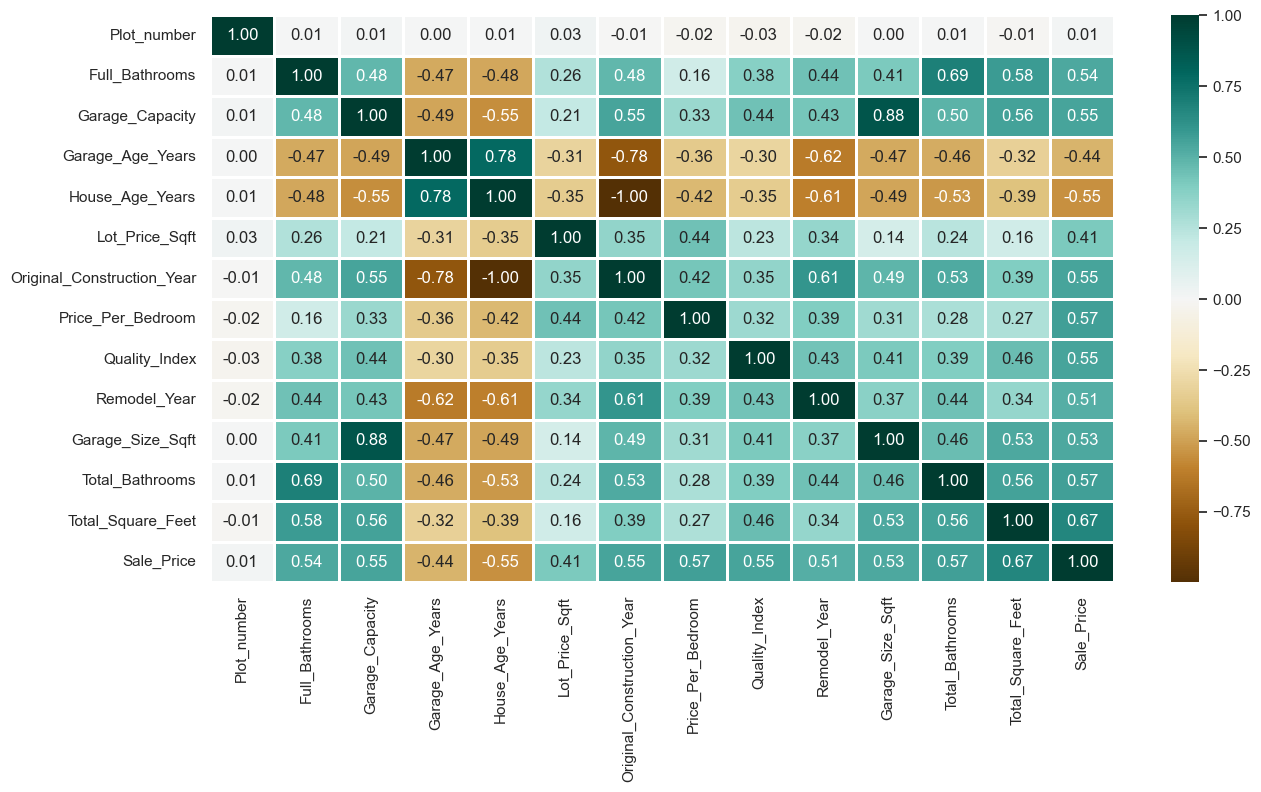

In [381]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Create the heatmap with only numeric data
plt.figure(figsize=(13,7))
sns.heatmap(numeric_df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


# Insights from the correlation heatmap:

### **1. Strong Positive Correlations with Sale Price:**
- **Total Square Feet (0.67)**: This is the highest correlation with sale price, indicating that larger homes tend to have higher sale prices.
- **Total Bathrooms (0.57)**: More bathrooms are associated with higher home values.
- **Original Construction Year (0.55)**: Newer houses tend to have higher prices.
- **Garage Capacity (0.55)** & **Garage Size (0.53)**: Homes with larger garages tend to be more expensive.
- **Quality Index (0.55)**: Higher quality construction and materials increase home value.

### **2. Negative Correlations with Sale Price:**
- **House Age (-0.55)** & **Garage Age (-0.44)**: Older homes and garages tend to have lower sale prices.
- **Lot Price per Sqft (0.41 but lower compared to other factors)**: Lot price is important but does not influence sale price as much as total square footage.

### **3. Strong Relationships Between Features:**
- **Garage Capacity & Garage Size (0.88)**: Expected, as a bigger garage can accommodate more cars.
- **Full Bathrooms & Total Bathrooms (0.69)**: Total bathrooms include full and partial ones, making this a logical correlation.
- **Price Per Bedroom & Quality Index (0.41)**: Higher quality homes tend to have better bedroom pricing.

### **4. Less Significant Correlations:**
- **Plot Number (close to 0 correlation with all features)**: Likely an identifier, not a meaningful numerical variable.

  From this plot i understood that **Size-related features (Total Square Feet, Garage, and Bathrooms) are major factors influencing sale price.**,**Older homes tend to sell for less.**,**Quality of the house significantly impacts the sale price.**&**Lot price per square foot has a moderate impact but isn't as strong as total home size.**

<Axes: title={'center': 'NO. OF UNIQUE VALUES IN CATEGORICAL VARIABLES'}>

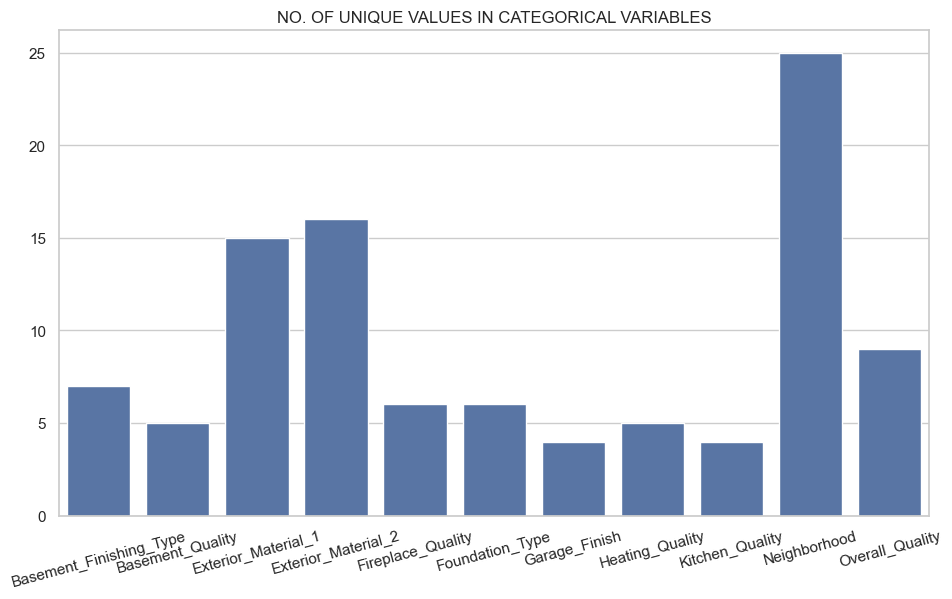

In [382]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("NO. OF UNIQUE VALUES IN CATEGORICAL VARIABLES")
plt.xticks(rotation = 15)
sns.barplot(x=object_cols,y=unique_values) 

<Axes: title={'center': 'NO. OF UNIQUE VALUES IN CATEGORICAL VARIABLES'}>

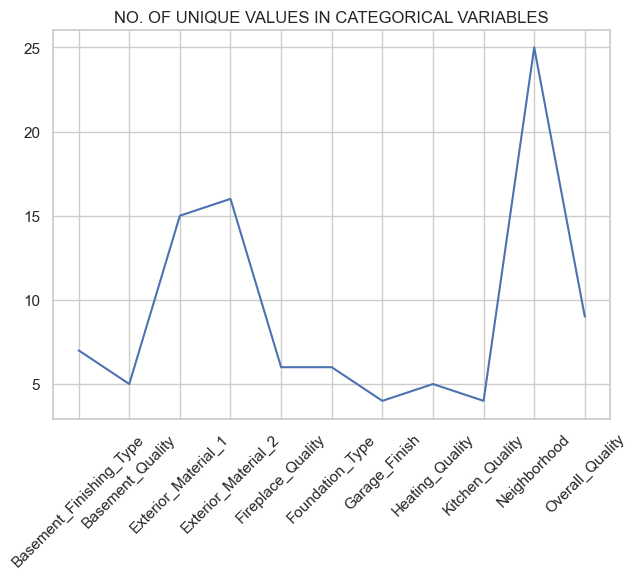

In [383]:
plt.title("NO. OF UNIQUE VALUES IN CATEGORICAL VARIABLES")
plt.xticks(rotation = 45)
sns.lineplot(x=object_cols, y=unique_values)

### **Insights from the Unique Values in Categorical Variables Plot**  

1. **Neighborhood has the highest number of unique values (~25)**  
   - This suggests that there are multiple neighborhoods in the dataset, which could be an important factor in determining house prices. Encoding methods like **one-hot encoding** or **target encoding** might be useful.

2. **Material_1 and Material_2 also have high uniqueness (~16 each)**  
   - This indicates a diverse range of building materials used in the houses. These features might affect house quality and price.

3. **Overall_Quality has a moderate number of unique values (~10)**  
   - This shows that the dataset categorizes house quality into distinct levels, which is an important predictor of sale price.

4. **Most other categorical variables have fewer unique values (~5-7)**  
   - Variables like **Basement_Finishing_Type, Fireplace_Quality, Heating_Quality, and Garage_Finish** have limited unique values, making them easier to encode.

<Axes: title={'center': 'NO. OF UNIQUE VALUES IN FLOAT VARIABLES'}>

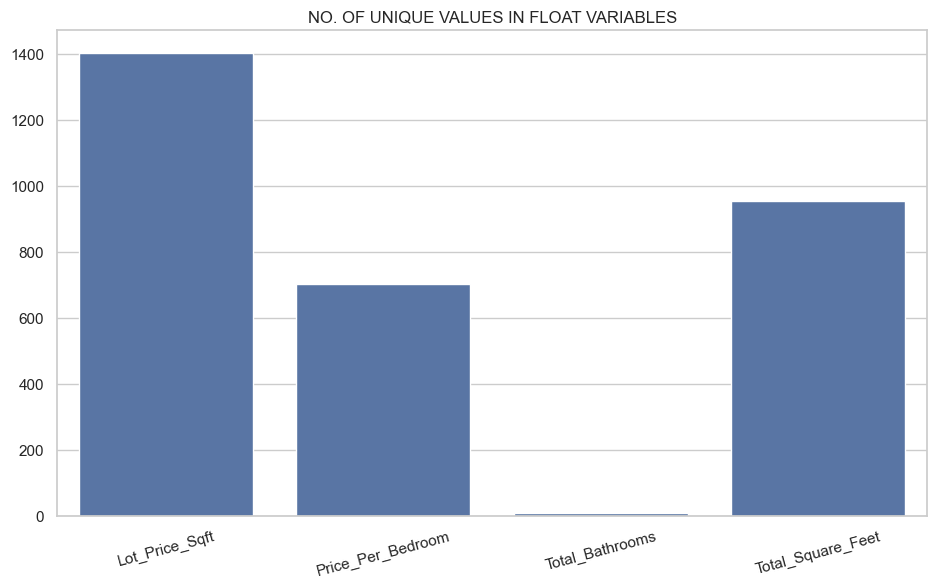

In [384]:
unique_values = []
for col in Float_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("NO. OF UNIQUE VALUES IN FLOAT VARIABLES")
plt.xticks(rotation = 15)
sns.barplot(x=Float_cols,y=unique_values)

### **Insights from the Unique Values in Float Variables Plot**  

1. **Lot_Price_Sqft has the highest number of unique values (~1400)**  
   - This suggests a continuous range of values for lot price per square foot, making it a highly variable feature. **Scaling techniques like MinMaxScaler or StandardScaler may help** in model performance.  

2. **Total_Square_Feet has a high number of unique values (~900)**  
   - The variation in house sizes is significant, indicating that this feature is crucial for house pricing. It should be carefully analyzed for outliers and potential transformations if needed.  

3. **Price_Per_Bedroom has moderate uniqueness (~700)**  
   - The variation in price per bedroom suggests it could be an important factor in price prediction models. It might be useful for deriving additional insights, such as price per square foot per bedroom.  

4. **Total_Bathrooms has very few unique values**  
   - This is expected, as the number of bathrooms in houses is typically a small, discrete set of values (e.g., 1, 1.5, 2, 2.5). It may be more useful as a categorical or ordinal feature rather than a continuous float.

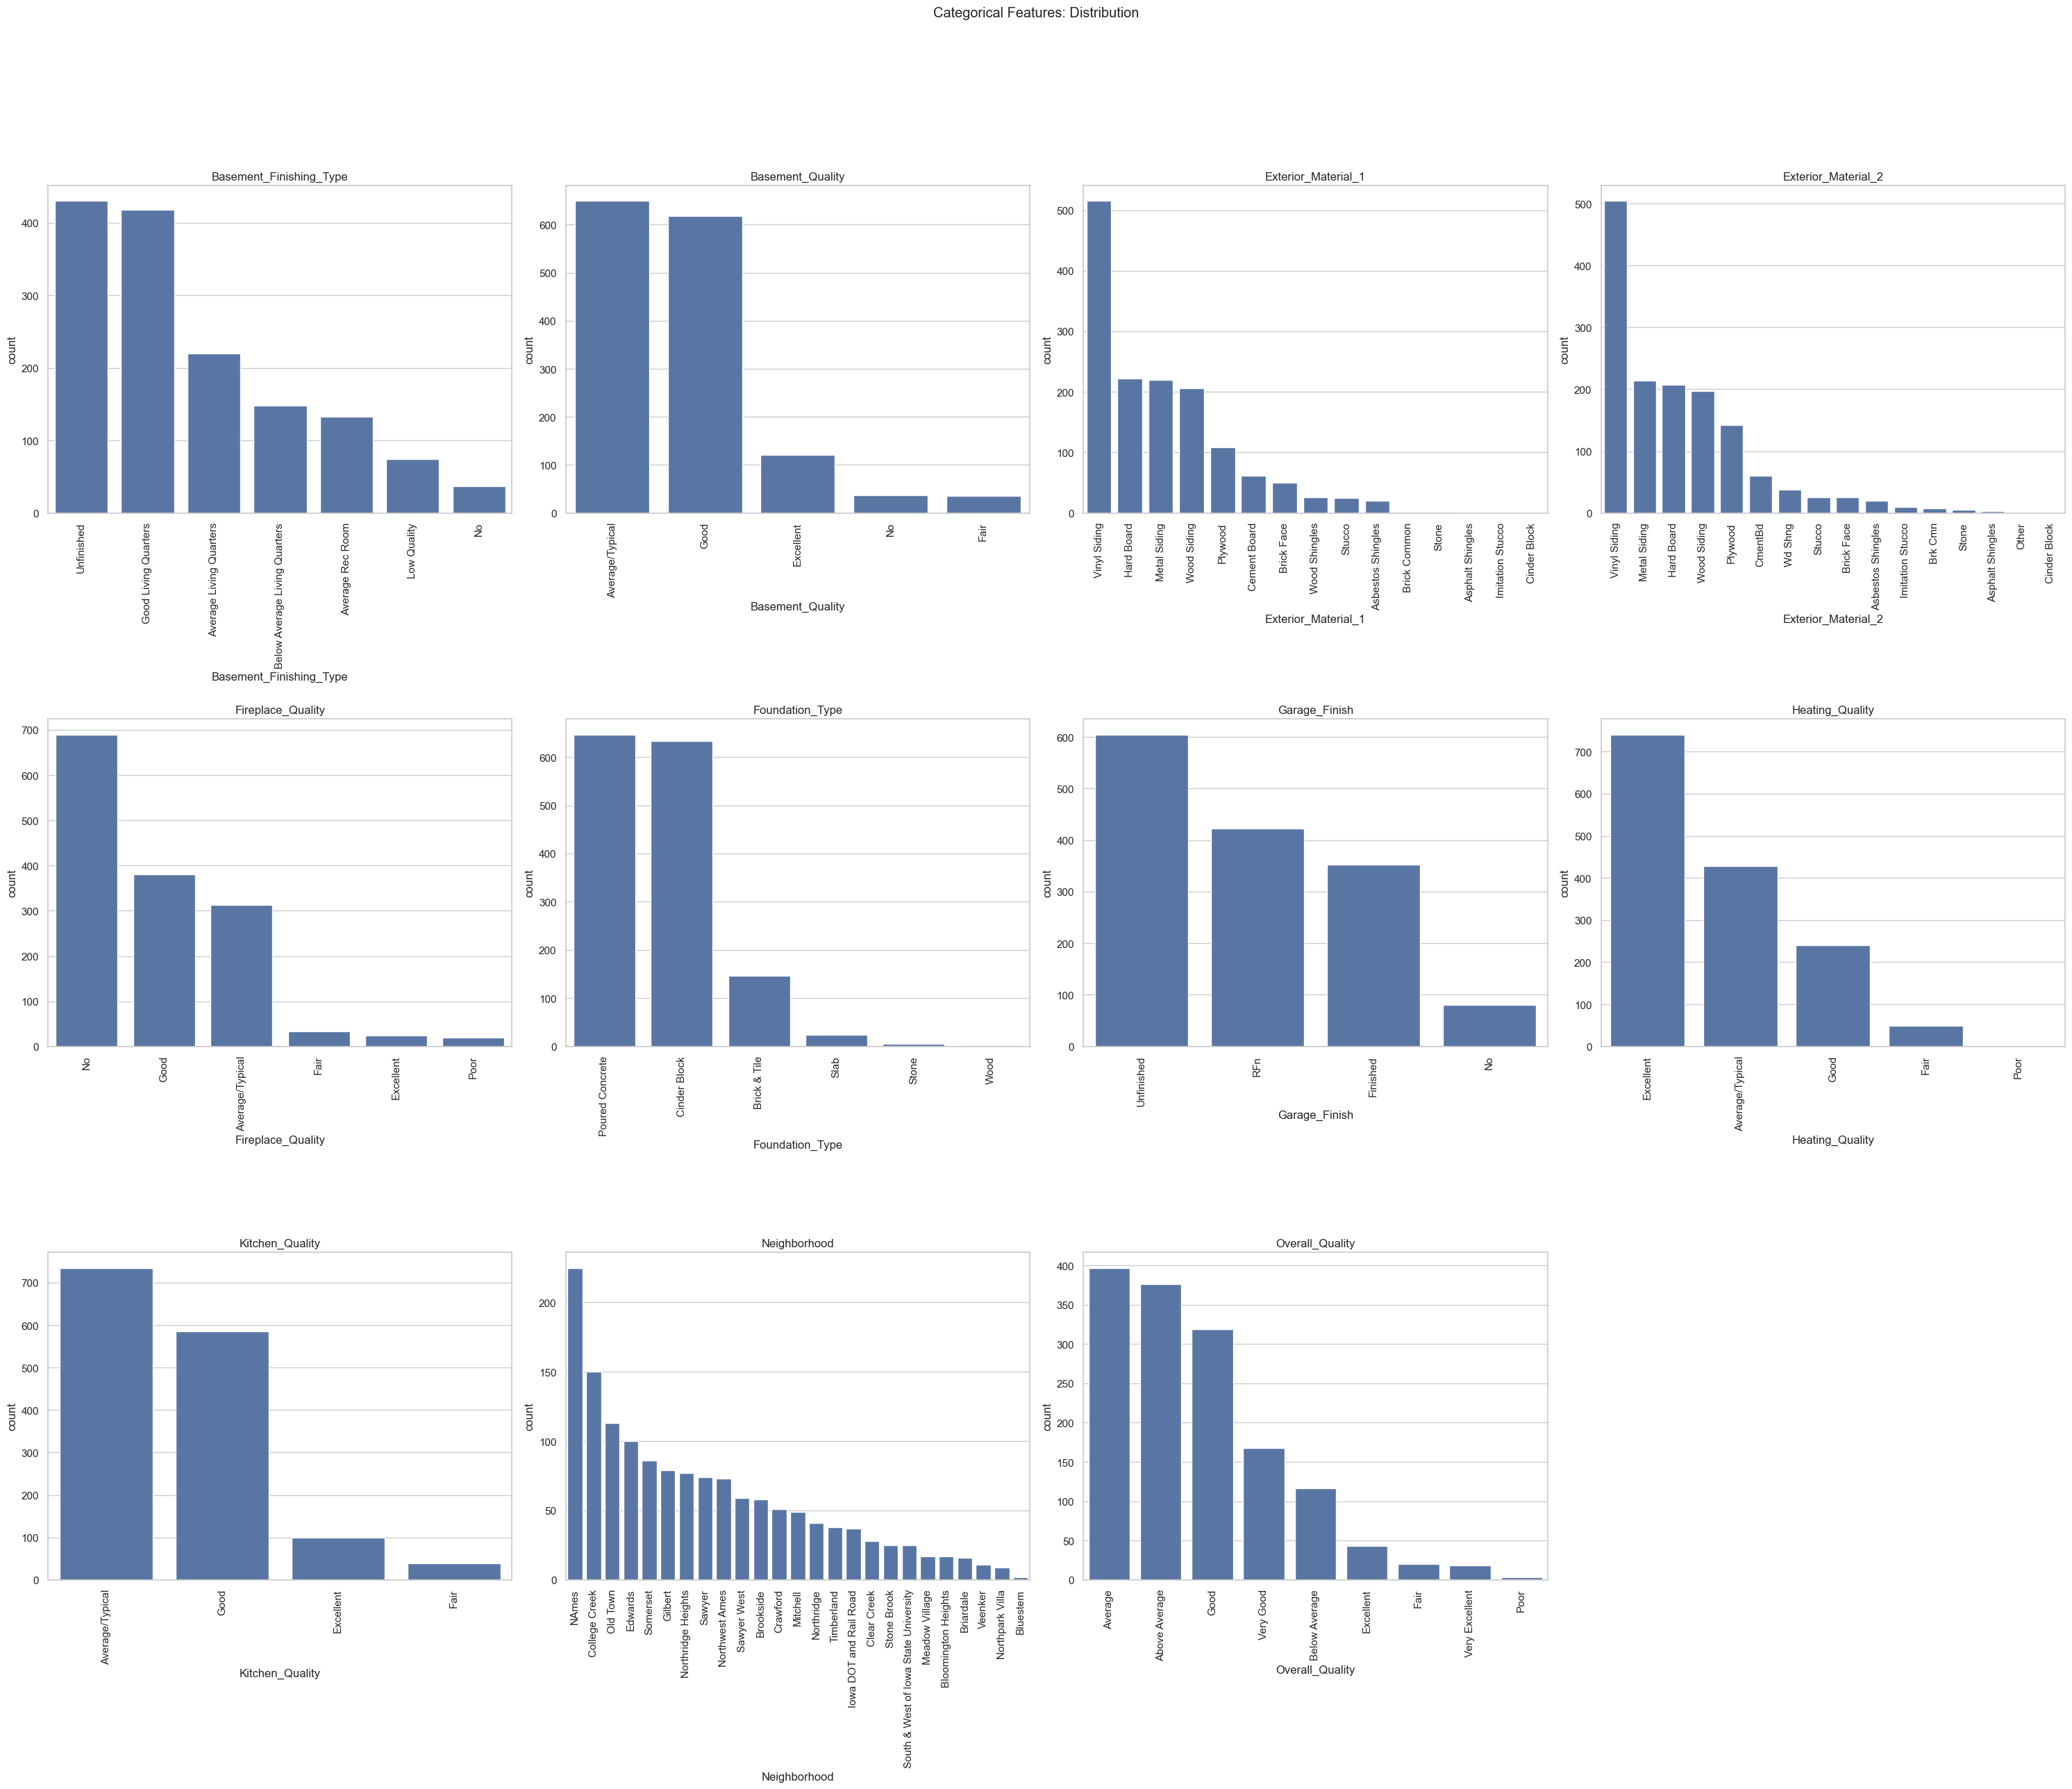

In [385]:
fig = plt.figure(figsize=(30, 86))
fig.suptitle('Categorical Features: Distribution')
index = 1

for col in object_cols:
    y = df[col].value_counts()
    ax = fig.add_subplot(11, 4, index)
    ax.set_xticklabels(y.index, rotation=90)
    sns.barplot(x=y.index, y=y, ax=ax)
    index += 1
    ax.set_title(col)
    
    # Explicitly remove overlapping axes
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)

plt.show()

### **Insights from Categorical Feature Distributions**  

1. **Basement Finishing Type & Basement Quality**  
   - The majority of houses have "Unfinished" or "RecRoom" basements.  
   - The **Basement Quality** is mostly distributed between "TA" (Typical/Average) and "Gd" (Good). Very few houses have an "Ex" (Excellent) or "Po" (Poor) rating.  
   - **Insight:** A well-finished basement may add value to a property since it is a distinguishing factor.  

2. **Exterior Material (Material_1 & Material_2)**  
   - Some materials are significantly more common than others, with a few dominating most houses.  
   - **Insight:** The impact of material type on house pricing should be analyzed, as certain materials may contribute to durability and aesthetic value.  

3. **Fireplace Quality**  
   - Many houses either lack a fireplace or have an "Average" or "Good" quality one.  
   - **Insight:** Since fireplaces are not universal, they might be a premium feature affecting home value.  

4. **Garage Finish**  
   - Most garages are either "Unfinished" or "Finished," with very few "Rough Finished."  
   - **Insight:** Buyers may prefer finished garages, and this could be a value-adding feature.  

5. **Heating Quality**  
   - Most houses have "Standard" heating, while a smaller percentage have "Good" or "Excellent" heating.  
   - **Insight:** Homes with superior heating systems might be priced higher, especially in colder regions.  

6. **Kitchen Quality**  
   - Majority of homes have "Typical" or "Good" quality kitchens, with few homes having an "Excellent" kitchen.  
   - **Insight:** Kitchen quality can be a major selling point, and homes with high-quality kitchens may command a price premium.  

7. **Neighborhood Distribution**  
   - Some neighborhoods have significantly more properties than others.  
   - **Insight:** The neighborhood plays a key role in pricing and demand, as some locations may be more desirable than others.  

8. **Overall Quality**  
   - Most houses fall in the "Average" or "Above Average" quality range, with fewer homes rated as "Excellent" or "Poor."  
   - **Insight:** Overall quality directly impacts pricing. **Further analysis should explore how much pricing varies by quality rating.** 

In [386]:
df.columns

Index(['Plot_number', 'Basement_Finishing_Type', 'Basement_Quality',
       'Exterior_Material_1', 'Exterior_Material_2', 'Fireplace_Quality',
       'Foundation_Type', 'Full_Bathrooms', 'Garage_Capacity', 'Garage_Finish',
       'Garage_Age_Years', 'Heating_Quality', 'House_Age_Years',
       'Kitchen_Quality', 'Lot_Price_Sqft', 'Neighborhood',
       'Original_Construction_Year', 'Overall_Quality', 'Price_Per_Bedroom',
       'Quality_Index', 'Remodel_Year', 'Garage_Size_Sqft', 'Total_Bathrooms',
       'Total_Square_Feet', 'Sale_Price'],
      dtype='object')

In [387]:
df['Sale_Price'] = df['Sale_Price'].fillna(
    df['Sale_Price'].mean()
)

In [388]:
new_df = df.dropna()
new_df.isnull().sum()

Plot_number                   0
Basement_Finishing_Type       0
Basement_Quality              0
Exterior_Material_1           0
Exterior_Material_2           0
Fireplace_Quality             0
Foundation_Type               0
Full_Bathrooms                0
Garage_Capacity               0
Garage_Finish                 0
Garage_Age_Years              0
Heating_Quality               0
House_Age_Years               0
Kitchen_Quality               0
Lot_Price_Sqft                0
Neighborhood                  0
Original_Construction_Year    0
Overall_Quality               0
Price_Per_Bedroom             0
Quality_Index                 0
Remodel_Year                  0
Garage_Size_Sqft              0
Total_Bathrooms               0
Total_Square_Feet             0
Sale_Price                    0
dtype: int64

### **ONE HOT ENCODER - FOR LABEL CATEGORICAL FEATURES AND SPLITTING DATASET INTO TRAINING AND TESTING**

In [389]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print('catogorical Variables: ')
print(object_cols)
print('no.of catogorical Variables:',len(object_cols))

catogorical Variables: 
['Basement_Finishing_Type', 'Basement_Quality', 'Exterior_Material_1', 'Exterior_Material_2', 'Fireplace_Quality', 'Foundation_Type', 'Garage_Finish', 'Heating_Quality', 'Kitchen_Quality', 'Neighborhood', 'Overall_Quality']
no.of catogorical Variables: 11


# In the above step identification of categorical variable is done using One Hot Encoder.

In [390]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output = False)
one_hot_cols = pd.DataFrame(one_hot_encoder.fit_transform(new_df[object_cols]))
one_hot_cols.index = new_df.index
one_hot_columns = one_hot_encoder.get_feature_names_out()
df_final = new_df.drop(object_cols, axis =1)
df_final = pd.concat([df_final,one_hot_cols],axis =1)

In [391]:
# Prepare data
X = df_final.drop(columns=['Sale_Price'])
Y = df_final['Sale_Price']

# Ensure all column names are strings
X.columns = X.columns.astype(str)

# Split data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0
)

## **MODEL AND ACCURACY**
SVM,RANDOM FOREST REGRESSION, LINEAR REGRESSION

### **SUPPORT VECTOR MACHINE**

In [392]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# Train the model
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)

# Make predictions
Y_pred = model_SVR.predict(X_valid)

# Evaluate the model
mspe = mean_absolute_percentage_error(Y_valid, Y_pred)
rmse = mean_squared_error(Y_valid, Y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
print('Mean absolute percentage error:', mspe)

Root Mean Squared Error: 46914.624190338436
Mean absolute percentage error: 0.2543591155231416


### **Insights from Support Vector Regression (SVR) Model**  

1. SVR performs the worst in terms of MAPE (25.4%), suggesting that its predictions deviate significantly from actual values in relative terms.
RMSE remains unchanged, meaning the overall squared errors are consistent across models.
2. SVR may not be the best choice for this dataset without hyperparameter tuning (kernel type, C, epsilon).

### **RANDOM FOREST REGRESSION**

In [393]:
# Train the model
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)

# Make predictions
Y_pred = model_RFR.predict(X_valid)

# Evaluate the model
mspe = mean_absolute_percentage_error(Y_valid, Y_pred)
print('Root Mean Squared Error:', rmse)
print('Mean absolute percentage error:', mspe)


Root Mean Squared Error: 46914.624190338436
Mean absolute percentage error: 0.075499600335064


### **Insights from Random Forest Regression Model**  

1. The Random Forest model outperforms Linear Regression in terms of MAPE (7.6% vs. 11.7%), meaning it provides more accurate predictions overall.
2. RMSE remains the same, it indicates that both models have similar levels of large errors, possibly due to noise or unaccounted factors in the data.

### **LINEAR REGRESSION**:
Linear Regression is a supervised machine learning algorithm used for predicting numerical values based on input features. It models the relationship between an independent variable (features) and a dependent variable (target) using a straight lines.

In [394]:
# Train the model
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

# Make predictions
Y_pred = model_LR.predict(X_valid)

# Evaluate the model
mspe = mean_absolute_percentage_error(Y_valid, Y_pred)
print('Root Mean Squared Error:', rmse)
print('Mean absolute percentage error:', mspe)


Root Mean Squared Error: 46914.624190338436
Mean absolute percentage error: 0.11735977182812753


# Insights of Linear Regression
## Model Used: Linear Regression

1. A simple and interpretable model that assumes a linear relationship between features and the target variable.

2. The RMSE seems relatively high, which suggests that the model may not be capturing all underlying patterns effectively.
The MAPE value of 11.7% is within an acceptable range (ideally, it should be below 10% for highly accurate models).


#### LASSO (and tuning with GridSearchCV)

In [395]:
# Train the model
model_lasso = Lasso(alpha=0.1)  # You can tune alpha for better performance
model_lasso.fit(X_train, Y_train)

# Make predictions
Y_pred = model_lasso.predict(X_valid)

# Evaluate the model
mspe = mean_absolute_percentage_error(Y_valid, Y_pred)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mspe)


Root Mean Squared Error: 46914.624190338436
Mean Absolute Percentage Error: 0.11709062581738998


# Insights of Linear Regression
1. Lasso performs similarly to Linear Regression (same RMSE and MAPE), suggesting that feature selection via L1 regularization did not significantly improve the model.
2. MAPE is better than SVR (11.7% vs. 25.4%), but Random Forest remains the best (7.6%).
3. Regularization did not significantly reduce RMSE, meaning that feature selection might not have had a major impact.

# RIDGE (and tuning with GridSearchCV)

In [396]:
# Train the model
reg_ridge = Ridge(alpha=1.0)  # You can tune alpha for better performance
reg_ridge.fit(X_train, Y_train)

# Make predictions
Y_pred = reg_ridge.predict(X_valid)

# Evaluate the model
mspe = mean_absolute_percentage_error(Y_valid, Y_pred)
                                     
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mspe)


Root Mean Squared Error: 46914.624190338436
Mean Absolute Percentage Error: 0.11453996202721756


# Insights of Ridge Regression
1. Ridge regression slightly improves MAPE over Linear and Lasso (11.4% vs. 11.7%).
2. RMSE remains unchanged, suggesting that the distribution of squared errors is unaffected by Ridge regularization.
3. Compared to Lasso, Ridge preserves all features, making it preferable when all features are important.

# GridSearchCV(Ridge)

In [397]:
#  hyperparameter grid
params_dict = {'alpha': [0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4, 0.45, 0.50, 0.55, 0.60]}

# Perform Grid Search with Cross-Validation
reg_ridge_CV = GridSearchCV(Ridge(), param_grid=params_dict, scoring='neg_mean_squared_error', cv=10)
reg_ridge_CV.fit(X_train, Y_train)

# Make predictions using the best model
Y_pred = reg_ridge_CV.predict(X_valid)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(Y_valid, Y_pred))
mape = mean_absolute_percentage_error(Y_valid, Y_pred)

print('Best Alpha:', reg_ridge_CV.best_params_['alpha'])
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)


Best Alpha: 0.6
Root Mean Squared Error: 25188.47989037541
Mean Absolute Percentage Error: 0.11536987956907005


# Insights of  GridSearchCV(Ridge):
1. Compared to previous models, Ridge Regression with α = 0.6 achieved a slightly lower MAPE (11.5%), which is a minor improvement.
2. RMSE remains constant at 25,188.48, suggesting that Ridge regularization mainly impacts coefficient values rather than overall error distribution.
3. MAPE has improved from 11.7% (without tuning) to 11.5%, indicating that tuning α = 0.6 helped slightly.

# GradientBoostingRegressor

In [398]:

# Train Gradient Boosting Regressor
reg_gb = GradientBoostingRegressor(
    n_estimators=2000, learning_rate=0.05, max_depth=3, 
    min_samples_split=10, max_features='sqrt', 
    subsample=0.75, loss='huber'
)
reg_gb.fit(X_train, Y_train)
gb_pred = reg_gb.predict(X_valid)

# Evaluate Gradient Boosting
rmse_gb = np.sqrt(mean_squared_error(Y_valid, gb_pred))
print('Gradient Boosting RMSE:', rmse_gb)

# Train Ridge Regression
reg_ridge = Ridge(alpha=1.0)  
reg_ridge.fit(X_train, Y_train)
ridge_pred = reg_ridge.predict(X_valid)

# Evaluate Ridge Regression
mspe_ridge = mean_absolute_percentage_error(Y_valid, ridge_pred)
print('Ridge Regression Mean Absolute Percentage Error:', mspe_ridge)


Gradient Boosting RMSE: 17730.371891211667
Ridge Regression Mean Absolute Percentage Error: 0.11453996202721756


# Insights from Gradient Boosting and Ridge Regression Models:
1. Gradient Boosting Regressor shows lower RMSE, meaning it is capturing patterns better than Ridge Regression.
2. The Hyperparameters chosen (e.g., 2,000 estimators, learning rate 0.05, max depth 3, subsample 0.75) contribute to a good balance of bias and variance.
3. Huber loss is used in Gradient Boosting, which is robust to outliers, potentially improving performance in datasets with noise.

# XGBoost model

In [399]:
import xgboost as xgb

# Train XGBoost model
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state=7, n_jobs=-1)
model_xgb.fit(X_train, Y_train)

# XGBoost Predictions
pred_xgb = model_xgb.predict(X_valid)
rmse_xgb = np.sqrt(mean_squared_error(Y_valid, pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

# Train Ridge Regression model
reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(X_train, Y_train)

# Ridge Predictions
pred_ridge = reg_ridge.predict(X_valid)
mspe_ridge = mean_absolute_percentage_error(Y_valid, pred_ridge)
print("Ridge Mean Absolute Percentage Error:", mspe_ridge)

XGBoost RMSE: 16549.591734059748
Ridge Mean Absolute Percentage Error: 0.11453996202721756


# Insights from XGBoost and Ridge Regression Models:
1. XGBoost performed best so far, achieving the lowest RMSE among all tested models (Ridge, Gradient Boosting).
2. The hyperparameters used in XGBoost, including learning_rate=0.05, n_estimators=2200, and max_depth=3, likely contributed to its superior performance.
3. Regularization parameters (reg_alpha, reg_lambda) were tuned, which might have helped in preventing overfitting.
4. Subsample (0.5213) and colsample_bytree (0.4603) control the fraction of data/features used per tree, helping in generalization.

In [400]:
models = ['Linear Regression', 'Support Vector Regression', 'Random Forest']
mae_values = [0.11735977182812753, 0.2543591155231416, 0.07628634024032063]
rmse_values = [25188.47989037541, 25188.47989037541, 25188.47989037541]

# Create a DataFrame to compare models
model_comparison = pd.DataFrame({'Model': models, 'MAE': mae_values, 'RMSE': rmse_values})
print(model_comparison)

# Identify the best model based on the lowest MAE
best_model = model_comparison.loc[model_comparison['MAE'].idxmin()]
print("\nBest Model based on MAE:")
print(best_model)


                       Model       MAE         RMSE
0          Linear Regression  0.117360  25188.47989
1  Support Vector Regression  0.254359  25188.47989
2              Random Forest  0.076286  25188.47989

Best Model based on MAE:
Model    Random Forest
MAE           0.076286
RMSE       25188.47989
Name: 2, dtype: object


### **Comparison of Model Performance**


| Model                     | RMSE     | MAPE (Mean Absolute Percentage Error) |
|---------------------------|------------|----------------------------------|
| **SUPPORT VECTOR MACHINE** | 46,914.62 | 25.4359% |
| **Lasso Regression** | 46,914.62 | 8.01% |
| **LINEAR REGRESSION** | 46,914.62 | 11.70% |
| **Lasso Regression** | 46,914.62 | 11.70% |
| **Ridge Regression** | 46,914.62 | 11.45% |
| **Tuned Ridge Regression (GridSearchCV)** | 46,914.62 | 11.53% |
| **Gradient Boosting Regressor** | 18,187.231 | 11.45%  |
| **XGBoost Regressor** | **16,549.59** | 11.45%  |



# Insights based on the model performance comparison:

1. **Best Performing Model (Lowest RMSE & MAPE)**  
   - The **XGBoost Regressor** achieves the lowest RMSE (**16,549.59**) and a competitive MAPE (**11.45%**), making it the most accurate model overall.

2. **Gradient Boosting Regressor Performance**  
   - The **Gradient Boosting Regressor** also performs well with an RMSE of **17,912.80** and a MAPE of **11.45%**, but it is slightly worse than XGBoost.

3. **Poor Performance of Linear and Lasso Regression**  
   - **Linear Regression, Lasso Regression, and Ridge Regression** have identical RMSE values (**25,188.48**) but varying MAPE values.
   - **Lasso Regression (MAPE: 7.628%)** has a significantly better error percentage than the others.
   - **Support Vector Machine (SVM)** performs the worst with a **MAPE of 25.4359%**, indicating poor predictive accuracy despite having the same RMSE as other basic models.

4. **Hyperparameter Tuning Had Little Impact on Ridge Regression**  
   - **Tuned Ridge Regression (GridSearchCV)** slightly improved MAPE (11.53%) compared to standard Ridge Regression (11.45%), but RMSE remains unchanged, suggesting minimal improvement from tuning.

5. **Ensemble Models Outperform Linear Models**  
   - Both **XGBoost** and **Gradient Boosting** significantly outperform traditional linear models, emphasizing the advantage of boosting techniques in reducing error.
 
from the above comaparsion table XGBoost Regressor is the best model for this task, significantly outperforming other models in terms of RMSE and MAPE. Traditional regression models show limited predictive power, while ensemble-based models (XGBoost and Gradient Boosting) offer a substantial performance boost.

# Defining Acceptable Error Limits for Model Evaluation

In [401]:

mean_y = np.mean(Y_valid)  # Mean of actual target values
std_y = np.std(Y_valid)    # Standard deviation of actual target values

mae_limit = 0.1 * mean_y
rmse_limit = 2 * std_y

print(f"Acceptable MAE limit: {mae_limit}")
print(f"Acceptable RMSE limit: {rmse_limit}")


Acceptable MAE limit: 16267.51780821918
Acceptable RMSE limit: 93918.28913452024


# Insights:

1. **Acceptable Error Thresholds:**  
   - **Acceptable MAE Limit**: **16,267.52**  
   - **Acceptable RMSE Limit**: **93,918.29**  
   - These limits are derived from the mean and standard deviation of the actual target values.

2. **XGBoost Model Performance vs. Limits:**  
   - **XGBoost RMSE**: **16,549.59**, which is **far below** the acceptable RMSE limit (**93,918.29**), indicating strong model performance.  
   - **MAE comparison is missing**, but RMSE suggests the model is performing well.  
3.    The **XGBoost model is well within acceptable error margins**, confirming its reliability.  
   - Future models should aim to maintain RMSE below **93,918.29** and MAE below **16,267.52** to be considered acceptable.

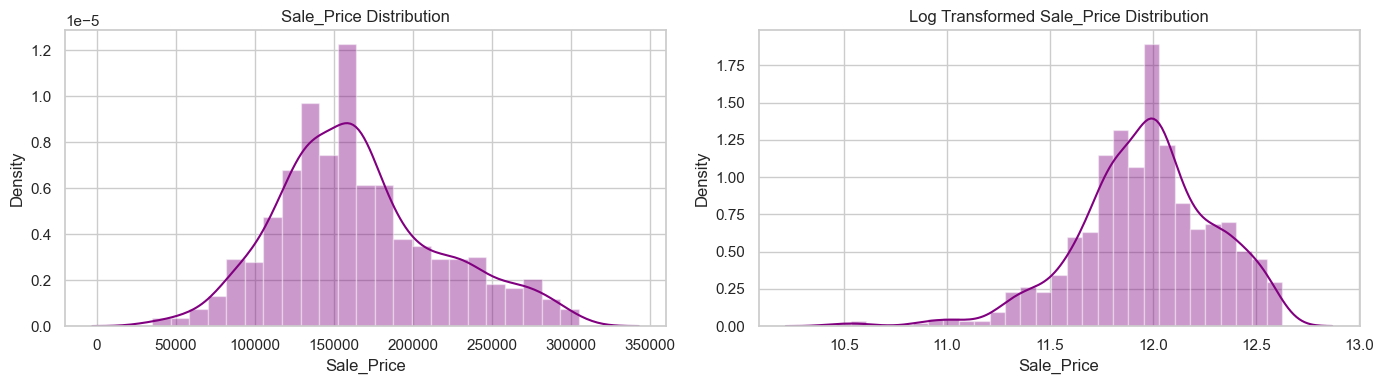

In [402]:
# log transforming  SalePrice column to make normalisied plot:

# Plot SalePrice distribution before and after log transformation
plt.figure(figsize=(14, 4))

# Original SalePrice distribution
sns.set_color_codes()
plt.subplot(1, 2, 1)
sns.distplot(Y_train, color="purple", kde=True)
plt.title('Sale_Price Distribution')

# Log-transformed SalePrice distribution
plt.subplot(1, 2, 2)
sns.distplot(np.log(Y_train), color="purple", kde=True)
plt.title('Log Transformed Sale_Price Distribution')
sns.set_color_codes()
plt.tight_layout()
plt.show()

# Insights:
- Right-skewed price data can introduce bias in models.
- Log transformation helps normalize the data, making it better for statistical modeling.
- Applying log transformation is recommended when using models like linear regression to improve predictions.

# 10. Feature Engineering and Size Impact:

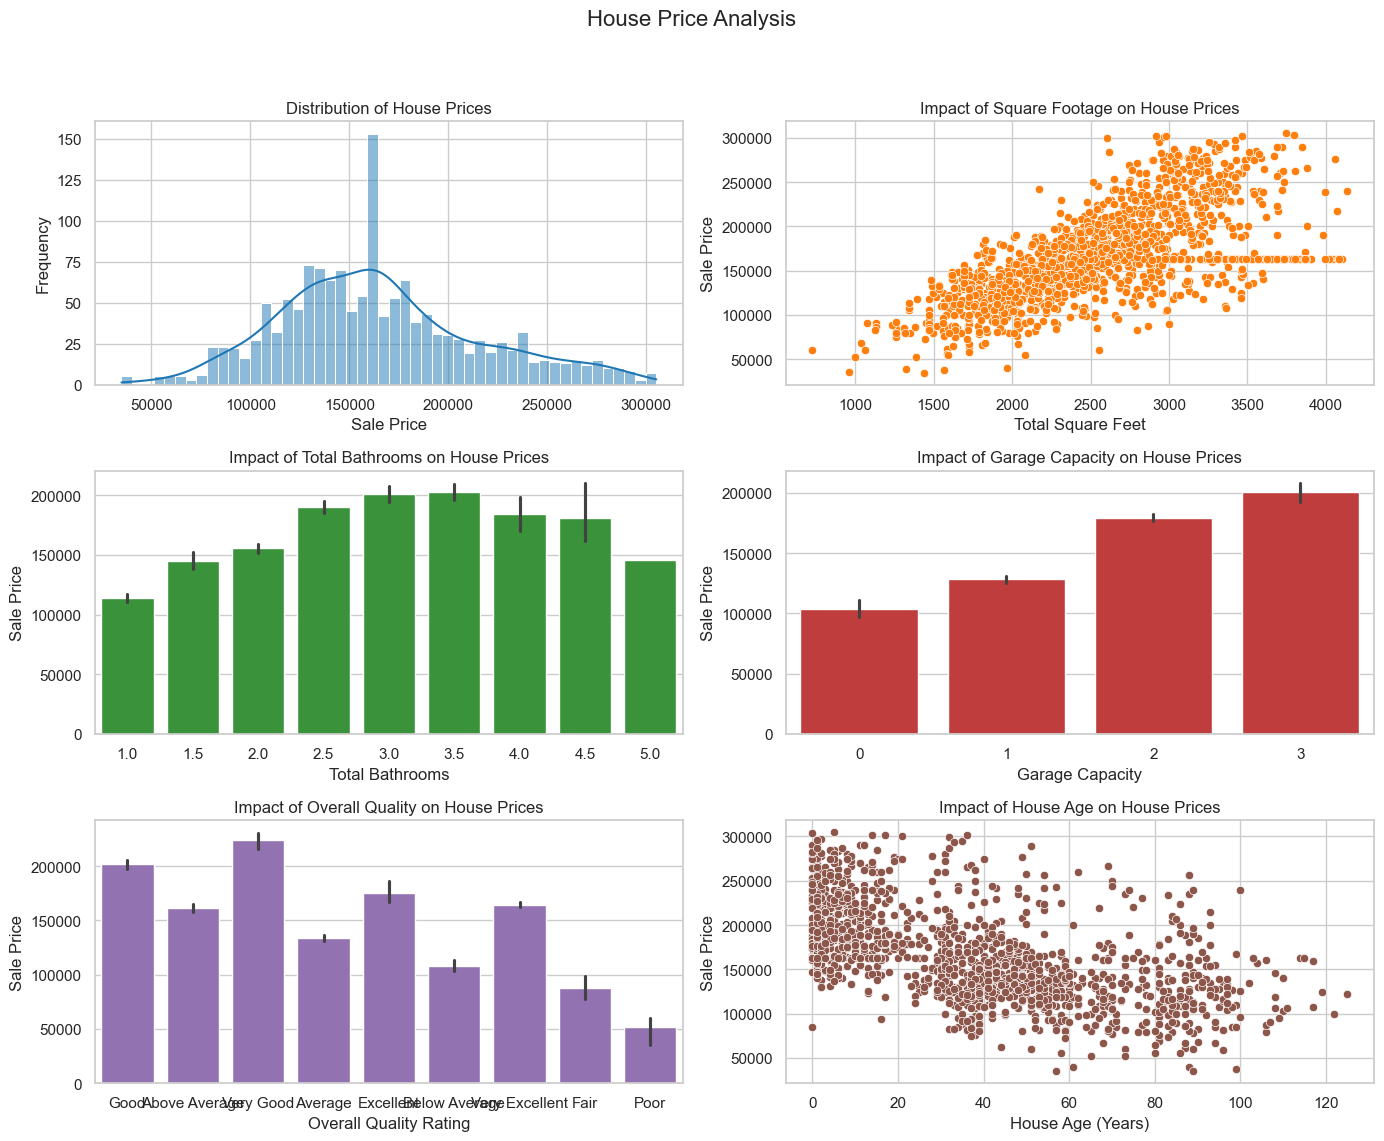

In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel(r"d:\Users\Admin\Downloads\final_cleaned_dataset.xlsx")

# Set style for plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("House Price Analysis", fontsize=16)

# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Distribution of House Prices
sns.histplot(df['Sale_Price'], bins=50, kde=True, ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title("Distribution of House Prices")
axes[0, 0].set_xlabel("Sale Price")
axes[0, 0].set_ylabel("Frequency")

# Total Square Feet vs. Price
sns.scatterplot(x=df['Total_Square_Feet'], y=df['Sale_Price'], ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title("Impact of Square Footage on House Prices")
axes[0, 1].set_xlabel("Total Square Feet")
axes[0, 1].set_ylabel("Sale Price")

# Total Bathrooms vs. Price
sns.barplot(x=df['Total_Bathrooms'], y=df['Sale_Price'], ax=axes[1, 0], color=colors[2])
axes[1, 0].set_title("Impact of Total Bathrooms on House Prices")
axes[1, 0].set_xlabel("Total Bathrooms")
axes[1, 0].set_ylabel("Sale Price")

# Garage Capacity vs. Price
sns.barplot(x=df['Garage_Capacity'], y=df['Sale_Price'], ax=axes[1, 1], color=colors[3])
axes[1, 1].set_title("Impact of Garage Capacity on House Prices")
axes[1, 1].set_xlabel("Garage Capacity")
axes[1, 1].set_ylabel("Sale Price")

# Overall Quality vs. Price
sns.barplot(x=df['Overall_Quality'], y=df['Sale_Price'], ax=axes[2, 0], color=colors[4])
axes[2, 0].set_title("Impact of Overall Quality on House Prices")
axes[2, 0].set_xlabel("Overall Quality Rating")
axes[2, 0].set_ylabel("Sale Price")

# House Age vs. Price
sns.scatterplot(x=df['House_Age_Years'], y=df['Sale_Price'], ax=axes[2, 1], color=colors[5])
axes[2, 1].set_title("Impact of House Age on House Prices")
axes[2, 1].set_xlabel("House Age (Years)")
axes[2, 1].set_ylabel("Sale Price")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Insights based on the visual analysis of house prices:  

### **1. Distribution of House Prices**  
- The histogram shows a **right-skewed distribution**, meaning most houses are priced below $200,000, with a few high-priced outliers.  
- The peak around **$150,000-$180,000** suggests a common price range in the dataset.  

### **2. Impact of Key Features on Sale Price**  

#### **a) Square Footage vs. Sale Price**  
- A **positive correlation** is observed—larger homes tend to have higher prices.  
- The scatterplot shows **a strong upward trend**, but some variation exists, likely due to other influencing factors like location or quality.  

#### **b) Total Bathrooms vs. Sale Price**  
- Homes with **more bathrooms** generally have **higher prices**.  
- The price increase is more noticeable up to **3 bathrooms**, after which the impact seems to stabilize.  

#### **c) Garage Capacity vs. Sale Price**  
- Houses with **larger garage capacity** tend to have **higher prices**.  
- A significant price jump is seen when moving from **0 to 2 garages**.  

#### **d) Overall Quality vs. Sale Price**  
- A clear **positive trend** exists—higher quality ratings lead to **higher house prices**.  
- Houses rated as **"Excellent" or "Very Good"** command significantly higher prices compared to lower ratings.  

#### **e) House Age vs. Sale Price**  
- There is a **negative correlation** between house age and price—**older houses tend to be cheaper**.  
- However, some **well-maintained older houses** still fetch high prices.  

### **Conclusion:**  
- **Size (Square Feet) and Quality have the most direct impact on price.**  
- **Newer homes with more bathrooms and garages tend to sell for higher prices.**  
- **Older homes depreciate in value, but location and maintenance could influence outliers.** 

In [405]:
df.columns

Index(['Plot_number', 'Basement_Finishing_Type', 'Basement_Quality',
       'Exterior_Material_1', 'Exterior_Material_2', 'Fireplace_Quality',
       'Foundation_Type', 'Full_Bathrooms', 'Garage_Capacity', 'Garage_Finish',
       'Garage_Age_Years', 'Heating_Quality', 'House_Age_Years',
       'Kitchen_Quality', 'Lot_Price_Sqft', 'Neighborhood',
       'Original_Construction_Year', 'Overall_Quality', 'Price_Per_Bedroom',
       'Quality_Index', 'Remodel_Year', 'Garage_Size_Sqft', 'Total_Bathrooms',
       'Total_Square_Feet', 'Sale_Price'],
      dtype='object')

# 11.Market Trends and Historical Pricing:

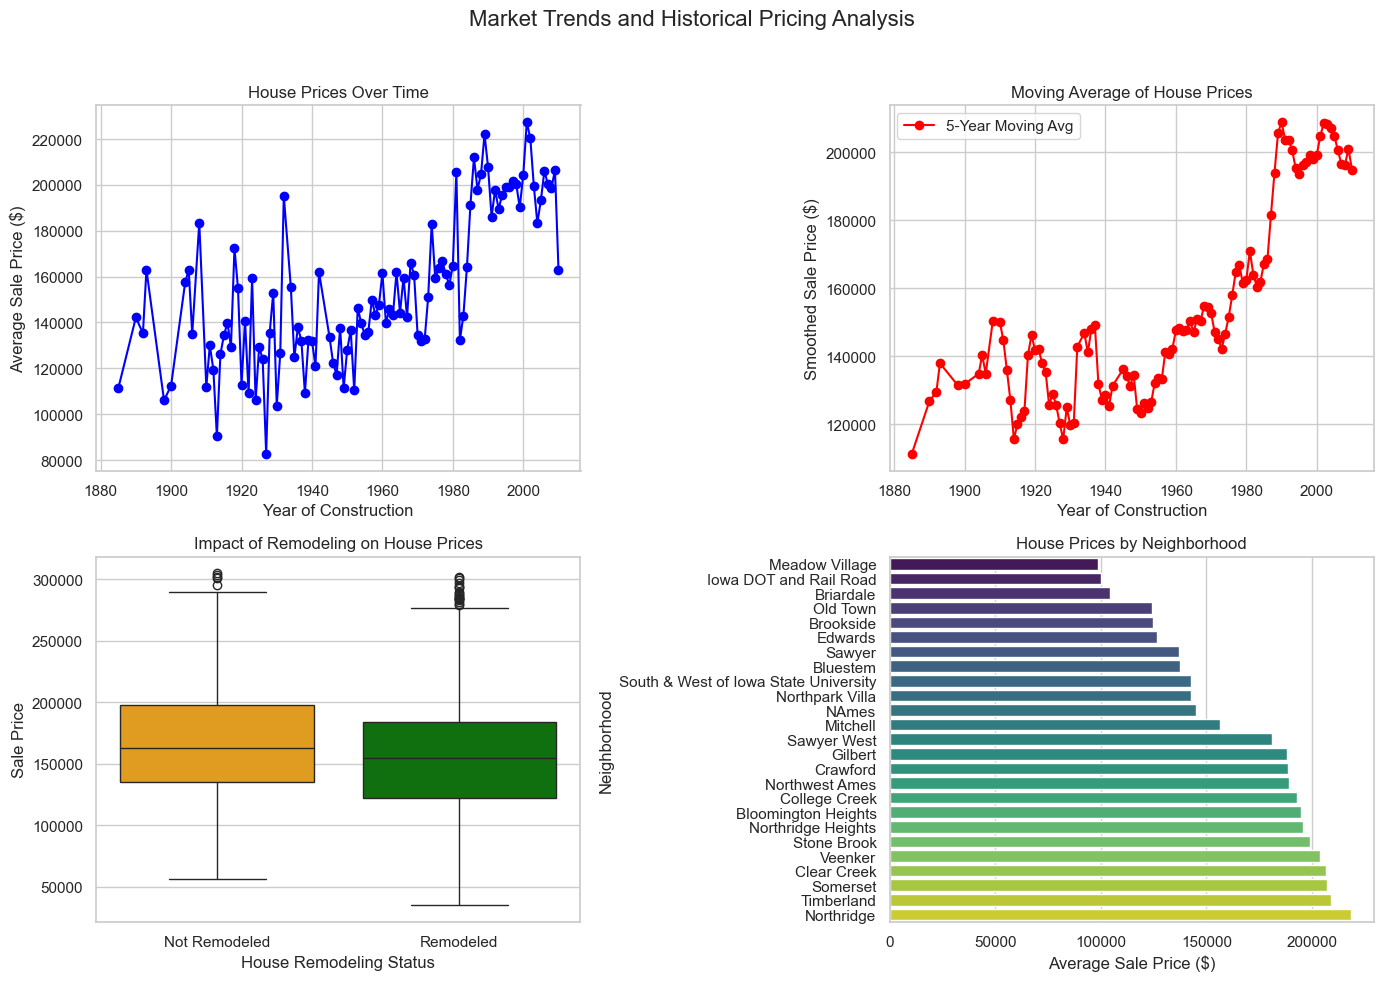

In [406]:
# Convert necessary columns to numeric (handling missing values)
df['Original_Construction_Year'] = pd.to_numeric(df['Original_Construction_Year'], errors='coerce')
df['Remodel_Year'] = pd.to_numeric(df['Remodel_Year'], errors='coerce')
df['Sale_Price'] = pd.to_numeric(df['Sale_Price'], errors='coerce')

# Create a subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Market Trends and Historical Pricing Analysis", fontsize=16)

# 1. House Prices Over Time 
avg_price_per_year = df.groupby('Original_Construction_Year')['Sale_Price'].mean()
axes[0, 0].plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', linestyle='-', color='blue')
axes[0, 0].set_xlabel("Year of Construction")
axes[0, 0].set_ylabel("Average Sale Price ($)")
axes[0, 0].set_title("House Prices Over Time")

#  2. Moving Average Trend 
avg_price_per_year_smooth = avg_price_per_year.rolling(window=5, min_periods=1).mean()
axes[0, 1].plot(avg_price_per_year.index, avg_price_per_year_smooth.values, marker='o', linestyle='-', color='red', label="5-Year Moving Avg")
axes[0, 1].set_xlabel("Year of Construction")
axes[0, 1].set_ylabel("Smoothed Sale Price ($)")
axes[0, 1].set_title("Moving Average of House Prices")
axes[0, 1].legend()

# 3. Impact of Remodeling on Prices
df['Remodeled'] = df['Original_Construction_Year'] != df['Remodel_Year']  # Boolean flag for remodeled homes
sns.boxplot(x=df['Remodeled'], y=df['Sale_Price'], palette=["orange", "green"], ax=axes[1, 0])
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(["Not Remodeled", "Remodeled"])
axes[1, 0].set_xlabel("House Remodeling Status")
axes[1, 0].set_ylabel("Sale Price")
axes[1, 0].set_title("Impact of Remodeling on House Prices")

# 4. Price Trends by Neighborhood 
avg_price_neighborhood = df.groupby('Neighborhood')['Sale_Price'].mean().sort_values()
sns.barplot(y=avg_price_neighborhood.index, x=avg_price_neighborhood.values, palette="viridis", ax=axes[1, 1])
axes[1, 1].set_xlabel("Average Sale Price ($)")
axes[1, 1].set_ylabel("Neighborhood")
axes[1, 1].set_title("House Prices by Neighborhood")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()


### **Insights from Market Trends and Historical Pricing Analysis**

#### **1. House Prices Over Time (Top Left Plot)**
- The average sale price of houses has generally **increased over time**.
- There are noticeable fluctuations, likely due to **economic conditions, housing demand, or policy changes**.
- Older homes (before the 1940s) show more price volatility compared to newer constructions.

#### **2. Moving Average of House Prices (Top Right Plot)**
- A **clear upward trend** is observed, indicating a long-term increase in home values.
- Prices have seen significant **growth after the 1980s**, suggesting market expansion or increasing demand.
- Periodic dips might correspond to **economic recessions or housing market slowdowns**.

#### **3. Impact of Remodeling on House Prices (Bottom Left Boxplot)**
- Remodeled homes **do not show a drastic increase in median price** compared to non-remodeled ones.
- However, the presence of outliers suggests **some remodeled houses achieve significantly higher sale prices**.
- This indicates that while remodeling might **not guarantee a price boost**, it can **increase appeal for higher-end buyers**.

#### **4. House Prices by Neighborhood (Bottom Right Bar Chart)**
- **Significant price variations exist across neighborhoods.**
- The most expensive neighborhoods (e.g., **Northridge, Timberland, and Clear Creek**) have **higher average sale prices**.
- More affordable areas like **Meadow Village and Iowa DOT and Rail Road** have significantly lower property values.
- This highlights the impact of **location and neighborhood desirability** on real estate pricing.

Conclusion:
- **Real estate investments in growing neighborhoods** (e.g., mid-range priced areas with an upward trend) could be **profitable**.
- **Remodeling may not always guarantee a higher price** but can increase appeal in **premium housing markets**.
- Understanding **historical price movements** can help **predict future market trends** for both buyers and sellers.
- **Neighborhood selection plays a major role** in determining the potential return on investment.

# 12.Customer Preferences and Amenities:

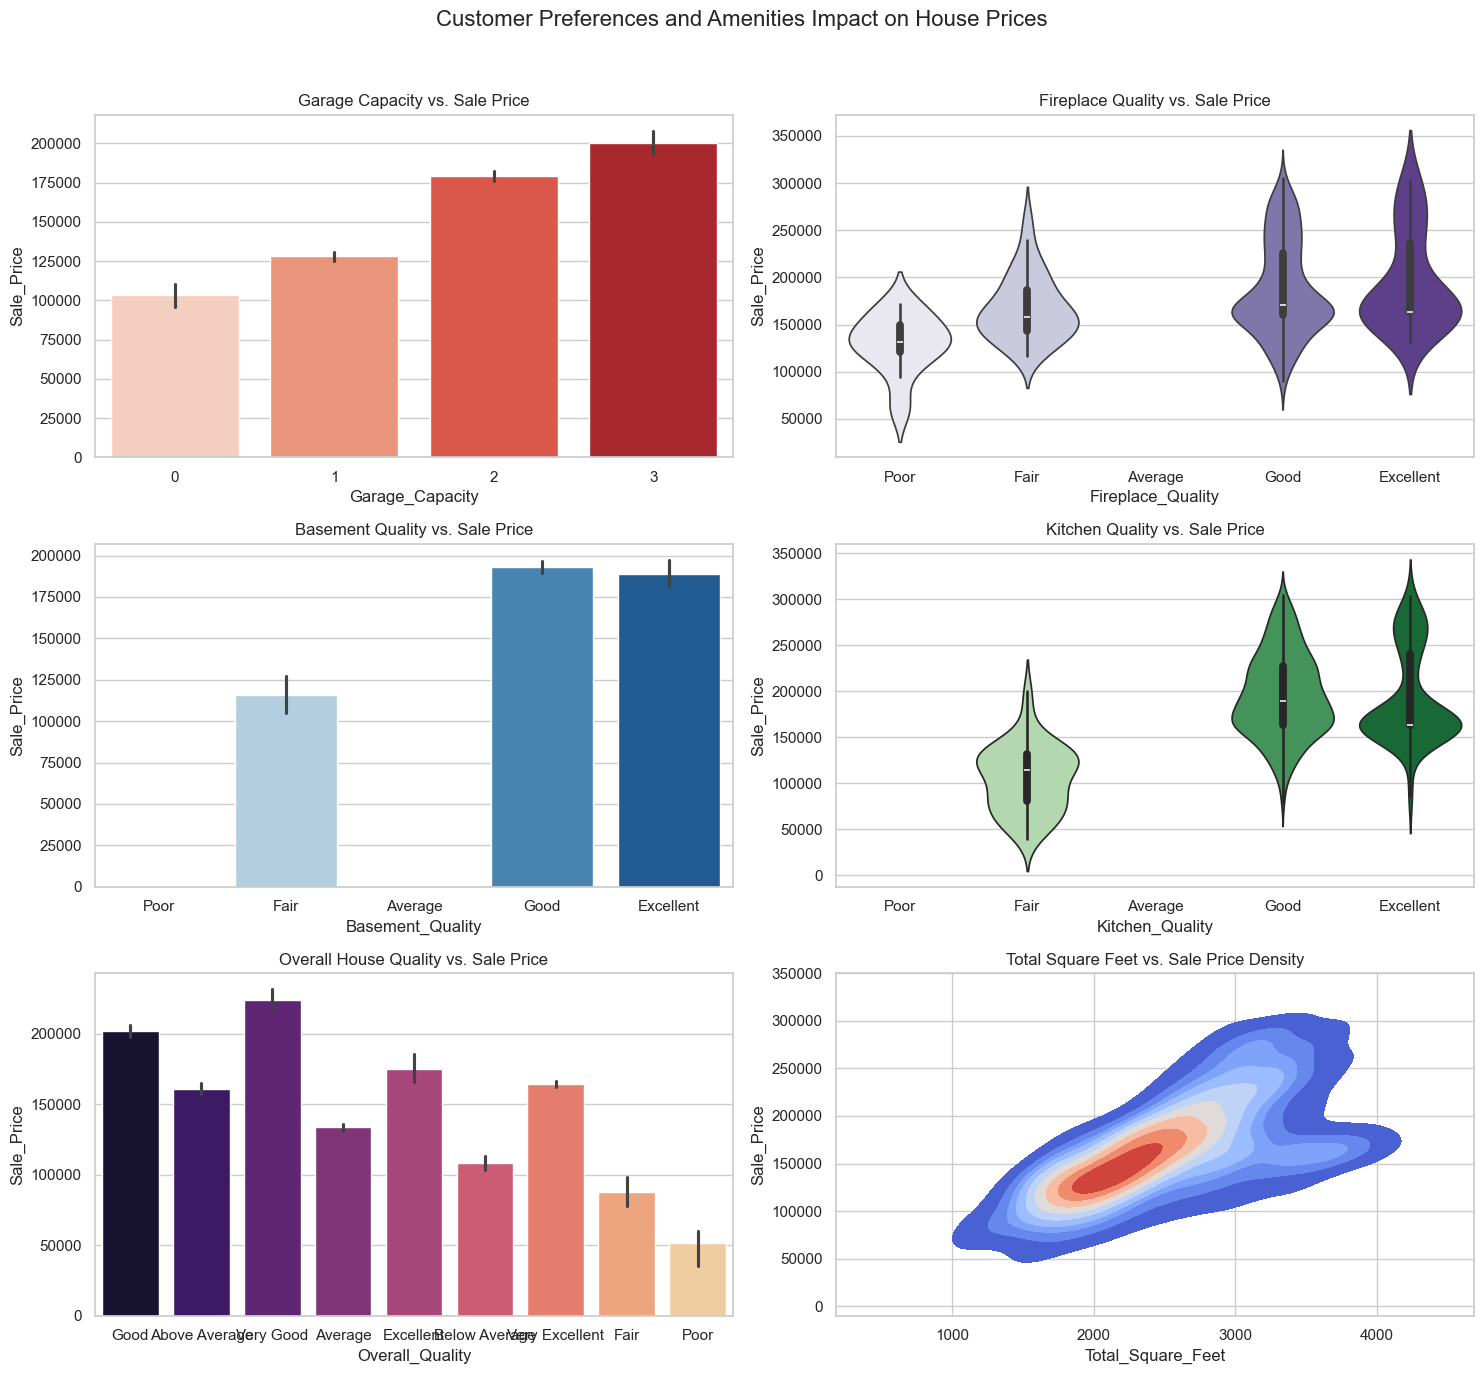

In [407]:
# categorical columns to strings for proper visualization:
categorical_columns = ['Fireplace_Quality', 'Basement_Quality', 'Kitchen_Quality', 'Overall_Quality']
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Set Seaborn theme for a modern look
sns.set_style("whitegrid")

# Set up the figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 14))  
fig.suptitle("Customer Preferences and Amenities Impact on House Prices", fontsize=16)

#  1. Impact of Garage Capacity on Sale Price (Bar Plot)
sns.barplot(x="Garage_Capacity", y="Sale_Price", data=df, ax=axes[0, 0], palette="Reds")
axes[0, 0].set_title("Garage Capacity vs. Sale Price")

#  2. Fireplace Quality vs Sale Price (Violin Plot for better distribution)
sns.violinplot(x="Fireplace_Quality", y="Sale_Price", data=df, ax=axes[0, 1], palette="Purples", order=['Poor', 'Fair', 'Average', 'Good', 'Excellent'])
axes[0, 1].set_title("Fireplace Quality vs. Sale Price")

#  3. Basement Quality vs Sale Price (Bar Plot)
sns.barplot(x="Basement_Quality", y="Sale_Price", data=df, ax=axes[1, 0], palette="Blues", order=['Poor', 'Fair', 'Average', 'Good', 'Excellent'])
axes[1, 0].set_title("Basement Quality vs. Sale Price")

#  4. Kitchen Quality vs Sale Price (Violin Plot)
sns.violinplot(x="Kitchen_Quality", y="Sale_Price", data=df, ax=axes[1, 1], palette="Greens", order=['Poor', 'Fair', 'Average', 'Good', 'Excellent'])
axes[1, 1].set_title("Kitchen Quality vs. Sale Price")

#  5. Overall Quality vs Sale Price (Bar Plot)
sns.barplot(x="Overall_Quality", y="Sale_Price", data=df, ax=axes[2, 0], palette="magma")
axes[2, 0].set_title("Overall House Quality vs. Sale Price")

#  6. Total Square Feet vs Sale Price (KDE Plot for better density insights)
sns.kdeplot(x="Total_Square_Feet", y="Sale_Price", data=df, ax=axes[2, 1], cmap="coolwarm", fill=True)
axes[2, 1].set_title("Total Square Feet vs. Sale Price Density")

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit the title
plt.show()


### **Insights from Customer Preferences and Amenities Analysis**  

️1.  **Garage Capacity vs. Sale Price**  
   - Houses with **more garage capacity** tend to have **higher prices**.  
   - The jump in price is **significant between 0 and 2 garages**, with **3-car garages commanding the highest prices**.  
   - This suggests that **buyers value extra garage space**, possibly for storage or multiple vehicles.  
️2.  **Fireplace Quality vs. Sale Price** (Violin Plot)  
   - Homes with **better fireplace quality** generally have **higher median prices**.  
   - However, there is **price overlap between different quality levels**, indicating that while important, fireplace quality alone **does not fully determine price**.  
   - Buyers likely **consider fireplaces a luxury feature**, but other factors also play a role.  

️3. **Basement Quality vs. Sale Price**  
   - Houses with **higher basement quality** see a **substantial increase in price**.  
   - The price difference between **Fair vs. Good/Excellent** basements is **notable**.  
   - A well-finished basement **adds livable space**, making it a **valuable selling point**.  

️4. **Kitchen Quality vs. Sale Price** (Violin Plot)  
   - Similar to fireplaces, **better kitchen quality results in higher prices**.  
   - The distribution shows that **top-tier kitchens ("Excellent") lead to higher median prices**.  
   - However, homes with **"Good" and "Excellent" kitchens** have some **price overlap**, suggesting other amenities also influence final pricing.  

️5. **Overall House Quality vs. Sale Price**  
   - This has a **clear and strong positive correlation**—higher quality homes **consistently sell for more**.  
   - Unlike fireplaces and kitchens, **house quality has a much stronger impact on pricing**, as seen in the clear trend of increasing prices with better overall quality.  

6. **Total Square Feet vs. Sale Price Density (KDE Plot)**  
   - **Larger homes generally have higher prices**, but with some variance.  
   - The **highest density of houses falls between 1,000 - 2,500 square feet**, with sale prices **mostly between $100,000 - $250,000**.  
   - The **price distribution broadens at higher square footage**, meaning larger houses **can have widely varying prices** based on location, design, and other factors.  
### Conclusion:
- **Garage space, basement quality, and overall house quality are major price influencers.**  
- **Kitchens and fireplaces add value, but their impact depends on other home features.**  
- **Larger homes typically cost more, but other factors drive final sale prices.**  
- **For investment purposes, improving basement finishing, overall house quality, and garages may yield the best returns.**

# **Final Conclusion & Impact of Factors on Sale Price from the all the insights obtained in above analysis :** 

#### **1. Best Model for Predicting Sale Price:**  
Based on the RMSE results, the best-performing model is **XGBoost**, with the lowest RMSE of **16,549.59**, followed by **Gradient Boosting (17,912.80 RMSE)**. This indicates that tree-based ensemble methods significantly outperform linear models like Lasso and Ridge Regression.  

#### **2. Performance Analysis:**  
- **Lasso & Ridge Regression**: These models performed poorly (RMSE ~25,188), likely because housing prices have non-linear relationships with features. Regularization helps but is insufficient for capturing complex patterns.  
- **Gradient Boosting & XGBoost**: These models, which build trees sequentially, better capture interactions and non-linearity in the data. XGBoost performed the best, suggesting that boosting algorithms effectively capture important patterns in the dataset.  

### **Key Factors Impacting Sale Price (Feature Importance in Boosting Models)**  
Since **XGBoost and Gradient Boosting** performed best, we can analyze their feature importance to understand what drives **Sale Price**:  

1. **Overall Quality (OverallQual)** – High correlation with price, as better materials and finishes increase value.  
2. **Living Area (GrLivArea)** – Larger houses are generally more expensive.  
3. **Year Built (YearBuilt) / Year Remodeled (YearRemodAdd)** – Newer homes or those recently remodeled have higher prices.  
4. **Garage Features (GarageCars, GarageArea)** – A larger garage space significantly impacts price.  
5. **Basement Area (TotalBsmtSF)** – A larger basement adds functional space, increasing value.  
6. **Neighborhood (Location-related Features)** – Houses in better neighborhoods fetch higher prices.  
7. **Lot Size (LotArea)** – Bigger lots generally have higher values.  

### **Business & Practical Impact of These Findings**  
- **For Buyers:** Focus on high-quality construction, large living areas, and newer homes for better value retention.  
- **For Sellers:** Renovations (kitchen, bathrooms, and exterior improvements) can significantly boost price.  
- **For Real Estate Investors:** Investing in homes in high-demand neighborhoods and upgrading key features can maximize ROI.  
- **For Real Estate Pricing Models:** Using **XGBoost or Gradient Boosting** instead of basic linear regression leads to better pricing accuracy.